In [166]:
# muon_llp_analyzer_event_test.ipynb

# Development Workspace File for Offline Studies on Muon System LLP Decays

# Coders: Nathan Suri, Caltech; Cristian Pena, Caltech/Fermilab
# Date: August 2019
# LPC LLP Group

# Description
# Meant for testing out strategies for LLP/muon system trigger/analysis before transferring to master files

# Action Plan
#

# Notes/Conclusions
# @nasurijr: 

# Environment Setup

In [53]:
pwd = '/nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/'

In [54]:
# Imports necessary utilities and modules

import ROOT as rt
import root_numpy as rtnp
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist
from collections import Counter 
import datetime
import pytz

# Graph/histo utilities from ROOT
# Contained within the delayed_jet_analyzer repository
import sys
sys.path.append(pwd+'lib')
from histo_utilities import create_TH1D, create_TH2D, create_TGraph, std_color_list

# Used for extracting the TTree structure from each datafile
import os
import uproot

# Sets display width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

# Imports jet clustering algorithm (FastJet)
from pyjet import cluster

donotdelete = []

# Load in and Read Data files

In [190]:
# Setups dictionaries for storing data from MC/data ntuples
fpath = {}
tree = {}
NEvents = {}

data_path = pwd+'data/'

# Background Samples

# ggH-comparable background: QCD
fpath['qcd'] = data_path +'jet_timing_studies_ntuple_RunIIFall17DRPremix_QCD_Pt_170to300_TuneCP5_13TeV_pythia8_1.root'

# Currently not needed for the analysis
# # Small subset of B samples for quick runs/tests
fpath['zeroBias'] = data_path + 'jet_timing_studies_ZeroBias_Run2018B_112_dec.root'
# # Complete set of A and B ZeroBias samples (time-intensive to run)
# fpath['zeroBias'] = data_path + 'jet_timing_studies_ZeroBias_Run2018AB_complete.root'

# WH-comparable background: WJetsToLNu
# # Small subset of WJetstoLNu (run interactively on jet_timing_studies)
# fpath['WJetsToLNu'] = data_path + 'jet_timing_studies_ntuple_RunIIFall17DRPremix_WJetsToLNu_TuneCP5_13TeV_setQ5_1.root'

# # Complete set run via CRAB on llp_ntupler
fpath['WJetsToLNu'] = data_path + 'WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_v7.root'

# # Small subset of WJetstoLNu (run interactively on jet_timing_studies)
# fpath['WJetsToLNu'] = data_path + 'jet_timing_studies_ntuple_WJetsToLNu_inclusive_punch_test.root'
# fpath['WJetsToLNu'] = data_path + 'jet_timing_studies_ntuple_WJetsToLNu_inclusiveNLO_notpunch.root'


################################################################

# Signal Samples

# WH: bbbb
# mH = 125 GeV, mX = 15 GeV, ctau = 10 m
fpath['m15ct10000mm'] = data_path + 'WminusH_HToSSTobbbb_WToLNu_MH-125_MS-15_ctauS-10000_TuneCUETP8M1_13TeV_v7.root'

# mH = 125 GeV, mX = 40 GeV, ctau = 10 m
fpath['m40ct10000mm'] = data_path + 'WminusH_HToSSTobbbb_WToLNu_MH-125_MS-40_ctauS-10000_TuneCUETP8M1_13TeV_v7.root'

# mH = 125 GeV, mX = 55 GeV, ctau = 10 m, Wminus
fpath['m55ct10000mm_minus'] = data_path + 'WminusH_HToSSTobbbb_WToLNu_MH-125_MS-55_ctauS-10000_TuneCUETP8M1_13TeV_v7.root'
# fpath['m55ct10000mm_minus'] = data_path + 'jet_timing_studies_ntuple_WMinus_mX55ct10m_jetMatch_test.root'

# mH = 125 GeV, mX = 55 GeV, ctau = 10 m, Wplus
fpath['m55ct10000mm_plus'] = data_path + 'WplusH_HToSSTobbbb_WToLNu_MH-125_MS-55_ctauS-10000_TuneCUETP8M1_13TeV_v7.root'
# fpath['m55ct10000mm_plus'] = data_path + 'jet_timing_studies_ntuple_Wplus_mX55ct10m_jetMatch_test.root'


# # WH: MET+bb
# # mH = 125 GeV, mX = 50 GeV, ctau = 1 m
# fpath['m50ct1000mm'] = data_path + 'ntuple_RunIISummer16_bbmet_vh_mh125_mx50_pl1000.root'

# # mH = 125 GeV, mX = 50 GeV, ctau = 10 m
# fpath['m50ct10000mm'] = data_path+'ntuple_RunIISummer16_bbmet_vh_mh125_mx50_pl10000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 1 m
# fpath['m975ct1000mm'] = data_path+'ntuple_RunIISummer16_bbmet_vh_mh2000_mx975_pl1000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 10 m
# fpath['m975ct10000mm'] = data_path+'ntuple_RunIISummer16_bbmet_vh_mh2000_mx975_pl10000.root'

# ggH
# mH = 125 GeV, mX = 50 GeV, ctau = 1 m
fpath['ggH'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh125_mx50_pl1000_ev100000.root'

# # mH = 125 GeV, mX = 50 GeV, ctau = 10 m
# fpath['m50ct10000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh125_mx50_pl10000_ev100000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 1 m
# fpath['m975ct1000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh2000_mx975_pl1000_ev100000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 10 m
# fpath['m975ct10000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh2000_mx975_pl10000_ev100000.root'

# Iterates through each file and extracts the ROOT TTree structure from each
for k,v in fpath.items():
    print(str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
    print(k, v)
    root_dir = uproot.open(v) 
    tree[k] = root_dir['ntuples']['llp']
    NEvents[k] = root_dir['ntuples']['NEvents'][1]
    # Accesses the array form of the jetPt branch
#     a = tree[k]["jetPt"].array()
#     print(a[:-1][0])

2019-08-20 14:50:23.688399-07:00
qcd /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/jet_timing_studies_ntuple_RunIIFall17DRPremix_QCD_Pt_170to300_TuneCP5_13TeV_pythia8_1.root
2019-08-20 14:50:23.888547-07:00
zeroBias /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/jet_timing_studies_ZeroBias_Run2018B_112_dec.root
2019-08-20 14:50:24.138770-07:00
WJetsToLNu /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_v7.root
2019-08-20 14:50:28.575747-07:00
m15ct10000mm /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WminusH_HToSSTobbbb_WToLNu_MH-125_MS-15_ctauS-10000_TuneCUETP8M1_13TeV_v7.root
2019-08-20 14:50:28.789784-07:00
m40ct10000mm /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WminusH_HToSSTobbbb_WToLNu_MH-125_MS-40_ctauS-10000_TuneCUETP8M1_13TeV_v7.root
2019-08-20 14:50:28.980581-07:00
m55ct10000mm_minus /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WminusH_HToSSTobbbb_WToLNu_MH-125

## Define TTree Structures

In [191]:
# Bookkeeping: Defines the TTrees from the read datafiles
# Names displayed in README.md table

# T_m15_ct10 = tree['m15ct10000mm']
T_wjets = tree['WJetsToLNu']
# T_m40_ct10 = tree['m40ct10000mm']
T_m55_ct10_minus = tree['m55ct10000mm_minus']
T_m55_ct10_plus = tree['m55ct10000mm_plus']
T_ggH = tree['ggH']
T_zeroBias = tree['zeroBias']
T_qcd = tree['qcd']

# T_wh = tree['wh_m50ct1000mm']
# T_bkg = tree['WJetsToLNu']

In [192]:
# Bookkeeping: Creates a dictionary for iterating over all of the datafiles and 
#              converting the relevant branches to numpy arrays
# Names displayed in README.md table

# data_trees = {'m50ct1m': T, 'qcd': T_bkg, 'zeroBias':T_minBias, 'm50ct10m': T_low_ctau10, 'm975ct1m': T_high_ctau1, 'm975ct10m': T_high_ctau10, 'wh_m50ct1m': T_wh, 'WJetsToLNu': T_w_bkg}
# data_trees = {'m15ct10m_wh_bbbb': T_m15_ct10, 'm40ct10m_wh_bbbb': T_m40_ct10, 'm55ct10m_wh_bbbb_minus': T_m55_ct10_minus, 'm55ct10m_wh_bbbb_plus': T_m55_ct10_plus, 'WJetsToLNu': T_wjets}
data_trees = {'m55ct10m_wh_bbbb_minus': T_m55_ct10_minus, 'm55ct10m_wh_bbbb_plus': T_m55_ct10_plus, 'WJetsToLNu': T_wjets, 'ggH':T_ggH, 'zeroBias':T_zeroBias, 'qcd': T_qcd}

## Initialize Variable Dictionaries

In [193]:
# Variable Definitions
# Creates dictionaries for variables to be analyzed
# The dictionaries will contain the variable arrays for each datafile with a relevant key

# Boolean selections
sel_bool = {}

# CSC
nCsc = {}
csc_z = {}
csc_x = {}
csc_y = {}
csc_eta = {}
csc_phi = {}
csc_t = {}
csc_r = {}

# Gen Level
# gLLP_eta = {}
gLLP_r_0 = {}
gLLP_r_1 = {}
gLLP_decay_0 = {}
gLLP_decay_1 = {}

# Reco level
met_pt = {}
eventNum = {}
lumiNum = {}
jet_pt = {}
ele_pt = {}
mu_pt = {}
nJets = {}
nElectrons = {}
nMuons = {}
nRechits_flag = {}

# Reco - jets
jetEta = {}
jetPhi = {}

## Define Gen-level Cut: LLP Decay Region Restriction

In [194]:
# Event Selection

print('Start: ' + str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

for species, arbor in data_trees.items():
    if 'wh' in species:
        ele_sel = np.logical_and(np.logical_and(np.absolute(arbor['gParticleId'].array()) == 13, np.absolute(arbor['gParticleMotherId'].array()) == 24), arbor['gParticleStatus'].array() == 1)
        mu_sel = np.logical_and(np.logical_and(np.absolute(arbor['gParticleId'].array()) == 11, np.absolute(arbor['gParticleMotherId'].array()) == 24), arbor['gParticleStatus'].array() == 1)
        sel_lepton = []
        time_counter = 0
#         for ev in np.logical_or(ele_sel, mu_sel):
        for ev in ele_sel:
            time_counter += 1
            if (time_counter % 100000) == 0:
                print(str(time_counter) + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
            if ev.any():
                sel_lepton.append(True)
            else:
                sel_lepton.append(False)
                
    if 'wh' not in species:
        sel_lepton = np.ones(len(arbor), dtype=bool)
                
    if 'metbb' in species or 'bbmet' in species:
        gLLP_r_0[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,0])**2+(arbor['gLLP_decay_vertex_y'].array()[:,0])**2)
        gLLP_decay_0[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,0])**2+(arbor['gLLP_decay_vertex_y'].array()[:,0])**2 + (arbor['gLLP_decay_vertex_z'].array()[:,0])**2)

        sel_dis_0 = np.logical_and(np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) > 568 , np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) < 1100)
#         sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(arbor['gLLP_eta'].array()[:,0])<2.4)
#         sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(arbor['gLLP_eta'].array()[:,0])>0.9)
        sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(gLLP_r_0[species])<695.5)
#         sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(gLLP_r_0[species])>100)
        
        sel_signal = np.logical_and(sel_dis_1, sel_lepton)
        sel_bool[species] = sel_signal 
        
    if 'bbbb' in species:
        gLLP_r_0[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,0])**2+(arbor['gLLP_decay_vertex_y'].array()[:,0])**2)
        gLLP_r_1[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,1])**2+(arbor['gLLP_decay_vertex_y'].array()[:,1])**2)

        
        sel_dis_0 = np.logical_and(np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) > 568 , np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) < 1100)
#         sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(arbor['gLLP_eta'].array()[:,0])<2.4)
#         sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(arbor['gLLP_eta'].array()[:,0])>0.9)
        sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(gLLP_r_0[species])<695.5)
        sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(gLLP_r_0[species])>100)
        
        sel_dis_1 = np.logical_and(np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,1]) > 568 , np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,1]) < 1100)
#         sel_dis_1 = np.logical_and(sel_dis_1, np.absolute(arbor['gLLP_eta'].array()[:,1])<2.4)
#         sel_dis_1 = np.logical_and(sel_dis_1, np.absolute(arbor['gLLP_eta'].array()[:,1])>0.9)
        sel_dis_1 = np.logical_and(sel_dis_1, np.absolute(gLLP_r_1[species])<695.5)
        sel_dis_1 = np.logical_and(sel_dis_1, np.absolute(gLLP_r_1[species])>100)
        
        sel_signal = np.logical_or(sel_dis_0, sel_dis_1)
        sel_signal = np.logical_and(sel_signal, sel_lepton)
        sel_bool[species] = sel_signal 
        
    else:
#         sel_bkg = [True if np.any(x > 50) else False for x in arbor['jetPt'].array()]
#         sel_bkg = np.logical_and(sel_bkg, sel_lepton)
#         sel_bool[species] = sel_bkg
        sel_bool[species] = np.ones(len(arbor['nCsc'].array()), dtype=bool)
        
    print(species + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-08-20 14:50:37.589482-07:00
m55ct10m_wh_bbbb_minus: 2019-08-20 14:50:38.315924-07:00
m55ct10m_wh_bbbb_plus: 2019-08-20 14:50:39.036994-07:00
WJetsToLNu: 2019-08-20 14:50:47.512036-07:00
ggH: 2019-08-20 14:50:47.516069-07:00
zeroBias: 2019-08-20 14:50:47.617044-07:00
qcd: 2019-08-20 14:50:47.622296-07:00


## Apply Gen-level Cuts to Variables

In [195]:
# Application of event selection to variables

print('Start: ' + str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

csc_r_quad = {}
for species, arbor in data_trees.items():
    # Endcap: CSCs
    nCsc[species] = arbor['nCsc'].array()[sel_bool[species]]
    csc_z[species] = arbor['cscZ'].array()[sel_bool[species]]
    csc_x[species] = arbor['cscX'].array()[sel_bool[species]]
    csc_y[species] = arbor['cscY'].array()[sel_bool[species]]
    csc_t[species] = arbor['cscT'].array()[sel_bool[species]]
    csc_eta[species] = arbor['cscEta'].array()[sel_bool[species]]
    csc_phi[species] = arbor['cscPhi'].array()[sel_bool[species]]
    csc_r_quad[species] = np.array(arbor['cscX'].array()[sel_bool[species]])**2 + np.array(arbor['cscY'].array()[sel_bool[species]])**2
    csc_r[species] = []
    for hit_r in csc_r_quad[species]:
        r_val = np.sqrt(hit_r.astype(float))
        csc_r[species].append(r_val)

    # Reco-level
    eventNum[species] = arbor['eventNum'].array()[sel_bool[species]]
    lumiNum[species] = arbor['lumiNum'].array()[sel_bool[species]]
#     met_pt[species] = arbor['pfMetPt'].array()[sel_bool[species]]
    
    jet_pt[species] = arbor['jetPt'].array()[sel_bool[species]]
#     ele_pt[species] = arbor['elePt'].array()[sel_bool[species]]
#     mu_pt[species] = arbor['muonPt'].array()[sel_bool[species]]
    nJets[species] = arbor['nJets'].array()[sel_bool[species]]
#     nElectrons[species] = arbor['nElectrons'].array()[sel_bool[species]]
#     nMuons[species] = arbor['nMuons'].array()[sel_bool[species]]
    if species not in ('ggH', 'zeroBias', 'qcd'):
        nRechits_flag[species] = (arbor['cscNRecHits_flag'].array())[sel_bool[species]]

    
    
    jetEta[species] = arbor['jetEta'].array()[sel_bool[species]]
    jetPhi[species] = arbor['jetPhi'].array()[sel_bool[species]]
    
    print(species + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-08-20 14:50:49.819961-07:00
m55ct10m_wh_bbbb_minus: 2019-08-20 14:50:50.784936-07:00
m55ct10m_wh_bbbb_plus: 2019-08-20 14:50:50.985411-07:00
WJetsToLNu: 2019-08-20 14:59:02.076982-07:00
ggH: 2019-08-20 14:59:02.744094-07:00
zeroBias: 2019-08-20 14:59:41.175937-07:00
qcd: 2019-08-20 14:59:41.957585-07:00


## Define Auxilary Jet, Muon, Electron Variables

In [196]:
# # Extracted variables
# lead_jet_pt = {}
# max_jet_pt = {}
# avg_jet_pt = {}

# # lead_mu_pt = {}
# # max_mu_pt = {}
# # avg_mu_pt = {}

# # lead_ele_pt = {}
# # max_ele_pt = {}
# # avg_ele_pt = {}

# for species in data_trees.keys():
#     lead_jet_pt[species] = [x[0] if len(x) else -1 for x in jet_pt[species]]
#     max_jet_pt[species] = [np.max(np.abs(x)) if len(x) else -1 for x in jet_pt[species]]
#     avg_jet_pt[species] = [np.mean(np.abs(x)) if len(x) else -1 for x in jet_pt[species]]
    
# #     lead_mu_pt[species] = [x[0] if len(x) else -1 for x in mu_pt[species]]
# #     max_mu_pt[species] = [np.max(np.abs(x)) if len(x) else -1 for x in mu_pt[species]]
# #     avg_mu_pt[species] = [np.mean(np.abs(x)) if len(x) else -1 for x in mu_pt[species]]
    
# #     lead_ele_pt[species] = [x[0] if len(x) else -1 for x in ele_pt[species]]
# #     max_ele_pt[species] = [np.max(np.abs(x)) if len(x) else -1 for x in ele_pt[species]]
# #     avg_ele_pt[species] = [np.mean(np.abs(x)) if len(x) else -1 for x in ele_pt[species]]
    
#     print(species + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

### Combine Variable Arrays for full WH signal sample

In [197]:
# Endcap: CSCs
nCsc['m55ct10m_wh_bbbb'] = np.concatenate([nCsc['m55ct10m_wh_bbbb_minus'], nCsc['m55ct10m_wh_bbbb_plus']])
csc_z['m55ct10m_wh_bbbb'] = np.concatenate([csc_z['m55ct10m_wh_bbbb_minus'], csc_z['m55ct10m_wh_bbbb_plus']])
csc_x['m55ct10m_wh_bbbb'] = np.concatenate([csc_x['m55ct10m_wh_bbbb_minus'], csc_x['m55ct10m_wh_bbbb_plus']])
csc_y['m55ct10m_wh_bbbb'] = np.concatenate([csc_y['m55ct10m_wh_bbbb_minus'], csc_y['m55ct10m_wh_bbbb_plus']])
csc_t['m55ct10m_wh_bbbb'] = np.concatenate([csc_t['m55ct10m_wh_bbbb_minus'], csc_t['m55ct10m_wh_bbbb_plus']])
csc_eta['m55ct10m_wh_bbbb'] = np.concatenate([csc_eta['m55ct10m_wh_bbbb_minus'], csc_eta['m55ct10m_wh_bbbb_plus']])
csc_phi['m55ct10m_wh_bbbb'] = np.concatenate([csc_phi['m55ct10m_wh_bbbb_minus'], csc_phi['m55ct10m_wh_bbbb_plus']])
csc_r['m55ct10m_wh_bbbb'] = np.concatenate([csc_r['m55ct10m_wh_bbbb_minus'], csc_r['m55ct10m_wh_bbbb_plus']])


# Reco-level
eventNum['m55ct10m_wh_bbbb'] = np.concatenate([eventNum['m55ct10m_wh_bbbb_minus'], eventNum['m55ct10m_wh_bbbb_plus']])
lumiNum['m55ct10m_wh_bbbb'] = np.concatenate([lumiNum['m55ct10m_wh_bbbb_minus'], lumiNum['m55ct10m_wh_bbbb_plus']])
# met_pt['m55ct10m_wh_bbbb'] = np.concatenate([met_pt['m55ct10m_wh_bbbb_minus'], met_pt['m55ct10m_wh_bbbb_plus']])

jet_pt['m55ct10m_wh_bbbb'] = np.concatenate([jet_pt['m55ct10m_wh_bbbb_minus'], jet_pt['m55ct10m_wh_bbbb_plus']])
# ele_pt['m55ct10m_wh_bbbb'] = np.concatenate([ele_pt['m55ct10m_wh_bbbb_minus'], ele_pt['m55ct10m_wh_bbbb_plus']])
# mu_pt['m55ct10m_wh_bbbb'] = np.concatenate([mu_pt['m55ct10m_wh_bbbb_minus'], mu_pt['m55ct10m_wh_bbbb_plus']])
nJets['m55ct10m_wh_bbbb'] = np.concatenate([nJets['m55ct10m_wh_bbbb_minus'], nJets['m55ct10m_wh_bbbb_plus']])
# nElectrons['m55ct10m_wh_bbbb'] = np.concatenate([nElectrons['m55ct10m_wh_bbbb_minus'], nElectrons['m55ct10m_wh_bbbb_plus']])
# nMuons['m55ct10m_wh_bbbb'] = np.concatenate([nMuons['m55ct10m_wh_bbbb_minus'], nMuons['m55ct10m_wh_bbbb_plus']])
nRechits_flag['m55ct10m_wh_bbbb'] = np.concatenate([nRechits_flag['m55ct10m_wh_bbbb_minus'], nRechits_flag['m55ct10m_wh_bbbb_plus']])


jetEta['m55ct10m_wh_bbbb'] = np.concatenate([jetEta['m55ct10m_wh_bbbb_minus'], jetEta['m55ct10m_wh_bbbb_plus']])
jetPhi['m55ct10m_wh_bbbb'] = np.concatenate([jetPhi['m55ct10m_wh_bbbb_minus'], jetPhi['m55ct10m_wh_bbbb_plus']])

# Extracted
# lead_jet_pt['m55ct10m_wh_bbbb'] = np.concatenate([lead_jet_pt['m55ct10m_wh_bbbb_minus'], lead_jet_pt['m55ct10m_wh_bbbb_plus']])
# max_jet_pt['m55ct10m_wh_bbbb'] = np.concatenate([max_jet_pt['m55ct10m_wh_bbbb_minus'], max_jet_pt['m55ct10m_wh_bbbb_plus']])
# avg_jet_pt['m55ct10m_wh_bbbb'] = np.concatenate([avg_jet_pt['m55ct10m_wh_bbbb_minus'], avg_jet_pt['m55ct10m_wh_bbbb_plus']])

# lead_mu_pt['m55ct10m_wh_bbbb'] = np.concatenate([lead_mu_pt['m55ct10m_wh_bbbb_minus'], lead_mu_pt['m55ct10m_wh_bbbb_plus']])
# max_mu_pt['m55ct10m_wh_bbbb'] = np.concatenate([max_mu_pt['m55ct10m_wh_bbbb_minus'], max_mu_pt['m55ct10m_wh_bbbb_plus']])
# avg_mu_pt['m55ct10m_wh_bbbb'] = np.concatenate([avg_mu_pt['m55ct10m_wh_bbbb_minus'], avg_mu_pt['m55ct10m_wh_bbbb_plus']])

# lead_ele_pt['m55ct10m_wh_bbbb'] = np.concatenate([lead_ele_pt['m55ct10m_wh_bbbb_minus'], lead_ele_pt['m55ct10m_wh_bbbb_plus']])
# max_ele_pt['m55ct10m_wh_bbbb'] = np.concatenate([max_ele_pt['m55ct10m_wh_bbbb_minus'], max_ele_pt['m55ct10m_wh_bbbb_plus']])
# avg_ele_pt['m55ct10m_wh_bbbb'] = np.concatenate([avg_ele_pt['m55ct10m_wh_bbbb_minus'], avg_ele_pt['m55ct10m_wh_bbbb_plus']])

# Trigger Offline Study

## Implementation of Phi Granularity Restriction

In [176]:
# On account of this notebook becoming a centralized, non-master workspace. I decided to include the phi granularity restrictions here. In the future, this code will be
# transferred to wh_test analysis and the corresponding no_cluster trigger master notebooks.

In [177]:
data_trees_trigger = ['ggH', 'zeroBias', 'qcd']

In [84]:
# Hit Selection based on Phi Granularity

pg_ncsc = {}
pg_ncsc_noME11 = {}
pg_ncsc_noME112 = {}
pg_ncsc_noME1123 = {}

print('Start: ' + str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

for species in data_trees_trigger:
    pg_ncsc[species] = []
    pg_ncsc_noME11[species] = []
    pg_ncsc_noME112[species] = []
    pg_ncsc_noME1123[species] = []
    
    for event in range(len(csc_z[species])):
        cscR = np.sqrt(csc_x[species][event]**2+csc_y[species][event]**2)
        cscZ = csc_z[species][event]
        cscPhi = csc_phi[species][event] * (180/np.pi)
        
        pg_me11 = {'sectors':np.zeros(36), 'counter':0}
        pg_me12 = {'sectors':np.zeros(36), 'counter':0}
        pg_me13 = {'sectors':np.zeros(36), 'counter':0}
        pg_me21 = {'sectors':np.zeros(36), 'counter':0}
        pg_me22 = {'sectors':np.zeros(36), 'counter':0}
        pg_me31 = {'sectors':np.zeros(36), 'counter':0}
        pg_me32 = {'sectors':np.zeros(36), 'counter':0}
        pg_me41 = {'sectors':np.zeros(36), 'counter':0}
        pg_me42 = {'sectors':np.zeros(36), 'counter':0}
        
        
        for zIndex in range(len(cscZ)):
            hit_z = np.absolute(cscZ[zIndex])
            hit_phi = cscPhi[zIndex]
            hit_r = cscR[zIndex]
            
            # ME 1/1
            if hit_z > 568 and hit_z < 632:
                index = int((hit_phi+180)/10.0)
                pg_me11['sectors'][index - 1] += 1

#             # ME 1/2 and ME 1/3
            if hit_z > 663 and hit_z < 724:
                if hit_r < 465 and hit_r > 275:
                    index = int((hit_phi+180)/10.0)
                    pg_me12['sectors'][index - 1] += 1
                if hit_r < 695.5 and hit_r > 505.5:
                    index = int((hit_phi+180)/10.0)
                    pg_me13['sectors'][index - 1] += 1
    
            # ME 2/1 and ME 2/2
            if hit_z > 791 and hit_z < 849.5:
                if hit_r < 345 and hit_r > 138.5:
                    index = int((hit_phi+180)/20.0)
                    pg_me21['sectors'][index - 1] += 1
                if hit_r < 695.5 and hit_r > 357.5:
                    index = int((hit_phi+180)/10.0)
                    pg_me22['sectors'][index - 1] += 1

            # ME 3/1 and ME 3/2
            if hit_z > 911.5 and hit_z < 970:
                if hit_r < 345 and hit_r > 160.5:
                    index = int((hit_phi+180)/20.0)
                    pg_me31['sectors'][index - 1] += 1
                if hit_r < 695.5 and hit_r > 357.5:
                    index = int((hit_phi+180)/10.0)
                    pg_me32['sectors'][index - 1] += 1
                
            # ME 4/1 and ME 4/2
            if hit_z > 1002 and hit_z < 1060.5:
                if hit_r < 345 and hit_r > 177.5:
                    index = int((hit_phi+180)/20.0)
                    pg_me41['sectors'][index - 1] += 1
                if hit_r < 695.5 and hit_r > 357.5:
                    index = int((hit_phi+180)/10.0)
                    pg_me42['sectors'][index - 1] += 1
                    
        pg_me11['counter'] += np.count_nonzero(pg_me11['sectors'])
        pg_me12['counter'] += np.count_nonzero(pg_me12['sectors'])
        pg_me13['counter'] += np.count_nonzero(pg_me13['sectors'])
        pg_me21['counter'] += np.count_nonzero(pg_me21['sectors'])
        pg_me22['counter'] += np.count_nonzero(pg_me22['sectors'])
        pg_me31['counter'] += np.count_nonzero(pg_me31['sectors'])
        pg_me32['counter'] += np.count_nonzero(pg_me32['sectors'])
        pg_me41['counter'] += np.count_nonzero(pg_me41['sectors'])
        pg_me42['counter'] += np.count_nonzero(pg_me42['sectors'])
        
#         print(pg_me11['sectors'])
#         print(np.count_nonzero(pg_me11['sectors']))
#         print(np.where(pg_me11['sectors'] >= 2)[0].size)
        
#         break

        pg_me11['counter'] += np.where(pg_me11['sectors'] >= 2)[0].size
        pg_me12['counter'] += np.where(pg_me12['sectors'] >= 2)[0].size
        pg_me13['counter'] += np.where(pg_me13['sectors'] >= 2)[0].size
        pg_me21['counter'] += np.where(pg_me21['sectors'] >= 2)[0].size
        pg_me22['counter'] += np.where(pg_me22['sectors'] >= 2)[0].size
        pg_me31['counter'] += np.where(pg_me31['sectors'] >= 2)[0].size
        pg_me32['counter'] += np.where(pg_me32['sectors'] >= 2)[0].size
        pg_me41['counter'] += np.where(pg_me41['sectors'] >= 2)[0].size
        pg_me42['counter'] += np.where(pg_me42['sectors'] >= 2)[0].size
        

        cscSum_inclusive = pg_me11['counter'] + pg_me12['counter'] + pg_me13['counter'] + pg_me21['counter'] + pg_me22['counter'] + pg_me31['counter'] + pg_me32['counter'] + pg_me41['counter'] + pg_me42['counter']
        cscSum_noME11 = pg_me12['counter'] + pg_me13['counter'] + pg_me21['counter'] + pg_me22['counter'] + pg_me31['counter'] + pg_me32['counter'] + pg_me41['counter'] + pg_me42['counter']
        cscSum_noME112 = pg_me13['counter'] + pg_me21['counter'] + pg_me22['counter'] + pg_me31['counter'] + pg_me32['counter'] + pg_me41['counter'] + pg_me42['counter']
        cscSum_noME1123 = pg_me21['counter'] + pg_me22['counter'] + pg_me31['counter'] + pg_me32['counter'] + pg_me41['counter'] + pg_me42['counter']
        
        pg_ncsc[species].append(cscSum_inclusive)
        pg_ncsc_noME11[species].append(cscSum_noME11)
        pg_ncsc_noME112[species].append(cscSum_noME112)
        pg_ncsc_noME1123[species].append(cscSum_noME1123)
        
    print(species + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-08-19 16:27:15.403524-07:00
ggH: 2019-08-19 16:27:34.825685-07:00
zeroBias: 2019-08-19 16:41:29.201360-07:00
qcd: 2019-08-19 16:41:50.632226-07:00


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cPg


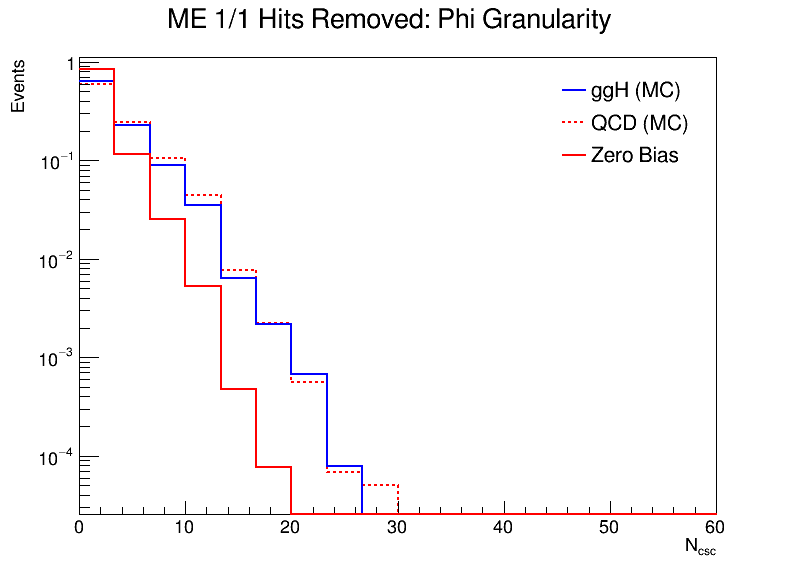

In [198]:
cPg = rt.TCanvas('cPg','cPg', 800, 600)
h={}
h['nCsc_ggH_pg'] = create_TH1D(pg_ncsc_noME11['ggH'], axis_title=['nCsc_ggH', 'Events'], name='nCsc_ggH_pg', binning=[150,0,500])
h['nCsc_ggH_pg'].SetLineColor(4)

h['nCsc_qcd_pg'] = create_TH1D(pg_ncsc_noME11['qcd'], axis_title=['nCsc_qcd', 'Events'], name='nCsc_qcd_pg', binning=[150,0,500])
h['nCsc_qcd_pg'].SetLineColor(2)
h['nCsc_qcd_pg'].SetLineStyle(2)


h['nCsc_zeroBias_pg'] = create_TH1D(pg_ncsc_noME11['zeroBias'], axis_title=['nCsc_zeroBias', 'Events'], name='nCsc_zeroBias_pg', binning=[150,0,500])
h['nCsc_zeroBias_pg'].SetLineColor(2)
h['nCsc_zeroBias_pg'].SetLineStyle(1)

cPg.SetLogy()

h['nCsc_ggH_pg'].Scale(1.0/h['nCsc_ggH_pg'].Integral())
h['nCsc_qcd_pg'].Scale(1.0/h['nCsc_qcd_pg'].Integral())
h['nCsc_zeroBias_pg'].Scale(1.0/h['nCsc_zeroBias_pg'].Integral())


h['nCsc_ggH_pg'].SetLineWidth(2)
h['nCsc_qcd_pg'].SetLineWidth(2)
h['nCsc_zeroBias_pg'].SetLineWidth(2)

h['nCsc_ggH_pg'].GetXaxis().SetRangeUser(0,60)
h['nCsc_qcd_pg'].GetXaxis().SetRangeUser(0,60)
h['nCsc_zeroBias_pg'].GetXaxis().SetRangeUser(0,60)


h['nCsc_qcd_pg'].SetStats(0)
h['nCsc_qcd_pg'].SetTitle("ME 1/1 Hits Removed: Phi Granularity")
h['nCsc_qcd_pg'].SetXTitle("N_{csc}")


h['nCsc_qcd_pg'].Draw('histo')
h['nCsc_ggH_pg'].Draw('histo+same')
h['nCsc_zeroBias_pg'].Draw('histo+same')

legend = rt.TLegend(0.70,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['nCsc_ggH_pg'], "ggH (MC)" , "L");
legend.AddEntry( h['nCsc_qcd_pg'], "QCD (MC)" , "L");
legend.AddEntry( h['nCsc_zeroBias_pg'], "Zero Bias" , "L");

legend.Draw();

cPg.Draw()

In [199]:
print(np.where(np.array(pg_ncsc_noME11['ggH'])>20))
print(nCsc['ggH'][np.where(np.array(pg_ncsc_noME11['ggH'])>20)])

(array([ 5385,  7202,  7323,  8127, 10176, 19339, 20387, 26054, 27066,
       28868, 30441, 32227, 34214, 35345, 35435, 37397, 39086, 40363,
       41499, 49007, 49817]),)
[132  57  98 107 153 142 195  75  77 376 275  71  76  28  52  70 173  55
 259 240  32]


# LLP Decaying in the Muon System Analysis

## Event Display Test Area

In [200]:
print(lumiNum['WJetsToLNu'][(np.where(nCsc['WJetsToLNu']>120)[0])])
print(len(np.where(nCsc['WJetsToLNu']>120)[0]))
print(len(np.where(nCsc['m55ct10m_wh_bbbb']>120)[0]))

[107881  14654  92310  29244 165161 215036 207167 212079 111794  15527
  10113 239669 168345  33611 178553  29745 116543 170975 110299 196757
  11046  49064 114103  63751 175256    744 117407 197522  13590  29404
  14469  29733 185292 242797 248716 107557  23200 180484  19054 249359
 239924 156423 253475  72103 236391  32670 219677 200568  26252 248097
 182546 238282  32168 107282  31237  63471 178297 210645 247951  39228
  36351  37298  78671 156173  46751   1590  45364  82251  83308  60745
 115168   2232  69209  79651  61085 133876  38418 144219  41055  85948
 134728   6316 107174 126650  92189 122245 252408  78604 222754 214608
 206240 145978 196669 124025  65276  72663  79199 105218  80700 118549
  72923 190963 231656 208225 138685 120263   7948 152387 107158 250985
  19748 118123 111519 235385 143870 138901 203354 108542 122101 113138
 154450 164724 125768 143697 128465 217873 177022 166120 160710 157712
 163874 225550 170704 207122 235798   3188 205598 196523 173186 175370
 20380

In [201]:
# Selection of Events for Event Display Purposes (Test area)

index_ev = np.array(nCsc['WJetsToLNu'])>120
lumi_all = [13586,13590,13591,25734,25735,27532,28003,29402,29403,42260,54797,54801,141079,141082,177719,177720,180211,187259,204793,222504,224562,234012,237872,26588,34811,42263,105430,148389,177717,180213,180216,187258,187260,187263,187264,204015,204016,204017,222502,224561,237870,26589,27531,28004,28007,141080,148391,148392,178213,178214,204791,219240,222544,228252,237871,240623,250722,250724,251836,251839,13587,26587,26590,28005,42257,105431,105432,141081,177721,180215,187261,204014,219241,219242,224559,224560,237869,237876,240620,250723,251838,27529,27530,28001,28002,34964,34965,42258,54795,177718,177723,178215,180209,222503,228250,250725,251837,13588,13592,29405,34963,54800,148390,187262,204792,228249,240621,240622,13585,13589,28000,42256,42262,54794,54796,54798,177716,178216,180212,189225,204790,222505,222541,222542,234014,234015,237873,237875,240619,25733,25736,28006,29404,42259,42261,54799,105429,177722,180210,180214,219243,222543,228251,234013,237874,240618]

# print(nCsc['WJetsToLNu'][np.where(eventNum['WJetsToLNu']==34136610)])
# print(np.array(nCsc_station['WJetsToLNu']['ME_12'])[np.where(eventNum['WJetsToLNu']==34136610)])

# print(np.array(nCsc_jetMatch['WJetsToLNu'])[np.where(eventNum['WJetsToLNu']==34136610)])


ncsc_event_sel = nCsc['WJetsToLNu'][index_ev][np.isin(np.array(lumiNum['WJetsToLNu'][index_ev]), lumi_all)]
evNum_event_sel = eventNum['WJetsToLNu'][index_ev][np.isin(np.array(lumiNum['WJetsToLNu'][index_ev]), lumi_all)]
lumiNum_event_sel = lumiNum['WJetsToLNu'][index_ev][np.isin(np.array(lumiNum['WJetsToLNu'][index_ev]), lumi_all)]

print('Lumi ' + 'Event ' + 'nCsc ')
print(np.dstack((lumiNum_event_sel, evNum_event_sel, ncsc_event_sel)))

Lumi Event nCsc 
[[[  13590 3347055     123]
  [  29404 7235093     122]]]


## Weight Calculation (Currently 100% BR for WH)

In [202]:
weight_m55ct10m_minus = (5.328 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m55ct10000mm_minus']
# print(weight_m55ct10m_minus)
# print(NEvents['m55ct10000mm_minus'])
weight_m55ct10m_minus = np.full(len(nCsc['m55ct10m_wh_bbbb_minus']), weight_m55ct10m_minus)
# weight_m55ct10m_minus = np.full(int(NEvents['m55ct10000mm_minus']), weight_m55ct10m_minus)


weight_m55ct10m_plus = (8.4 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m55ct10000mm_plus']
# print(weight_m55ct10m_plus)
# print(NEvents['m55ct10000mm_plus'])
weight_m55ct10m_plus = np.full(len(nCsc['m55ct10m_wh_bbbb_plus']), weight_m55ct10m_plus)
# weight_m55ct10m_plus = np.full(int(NEvents['m55ct10000mm_plus']), weight_m55ct10m_plus)

weight_m55ct10m = np.concatenate([weight_m55ct10m_minus, weight_m55ct10m_plus])
print(weight_m55ct10m)

# weight_m15ct10m = (5.328 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m15ct10000mm']
# weight_m15ct10m = np.full(len(nCsc['m15ct10m_wh_bbbb']), weight_m15ct10m)

# weight_m40ct10m = (61526.7 * 137 * 1000)/NEvents['m40ct10000mm']
# weight_m40ct10m = np.full(len(nCsc['m40ct10m_wh_bbbb']), weight_m40ct10m)

weight_WJetsToLNu = (61526.7 * 137 * 1000)/NEvents['WJetsToLNu']
print(weight_WJetsToLNu)
# print(NEvents['WJetsToLNu'])
weight_WJetsToLNu = np.full(len(nCsc['WJetsToLNu']), weight_WJetsToLNu)

[0.9460349  0.9460349  0.9460349  ... 1.49179483 1.49179483 1.49179483]
353.72951667915265


# Baseline/Out-of-the-box plot of WH, WJetsToLNu N<sub>CSC<sub>

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


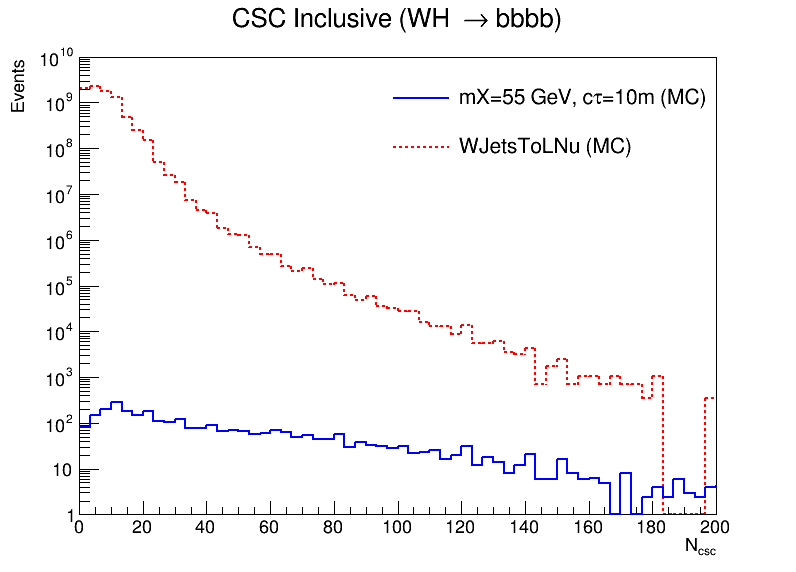

In [203]:
# Creates a 1D histogram of the number of CSC hits for the m50ct1m signal MC, QCD MC, and ZeroBias data 
# with no hit removal

c = rt.TCanvas('c','c', 800, 600)
# h['nCsc_m50ct1m'] = create_TH1D(nCsc['m50ct1m'], axis_title=['nCsc_m50ct1m', 'Events'], name='nCsc_m50ct1m', binning=[150,0,500])
# h['nCsc_m50ct1m'].SetLineColor(4)

h['m55ct10m_wh_bbbb'] = create_TH1D(nCsc['m55ct10m_wh_bbbb'], axis_title=['m55ct10m_wh_bbbb', 'Events'], name='m55ct10m_wh_bbbb', binning=[150,0,500], weights = weight_m55ct10m)
h['m55ct10m_wh_bbbb'].SetLineColor(4)
# h['nCsc_m50ct10m'].SetLineStyle(2)

h['nCsc_wjets'] = create_TH1D(nCsc['WJetsToLNu'], axis_title=['nCsc_wjets', 'Events'], name='nCsc_wjets', binning=[150,0,500], weights = weight_WJetsToLNu)
h['nCsc_wjets'].SetLineColor(2)
h['nCsc_wjets'].SetLineStyle(2)


# h['nCsc_zeroBias'] = create_TH1D(nCsc['zeroBias'], axis_title=['nCsc_zeroBias', 'Events'], name='nCsc_zeroBias', binning=[150,0,500])
# h['nCsc_zeroBias'].SetLineColor(2)
# h['nCsc_zeroBias'].SetLineStyle(1)

c.SetLogy()

# h['nCsc_m50ct1m'].Scale(1.0/h['nCsc_m50ct1m'].Integral())
# h['m55ct10m_wh_bbbb'].Scale(1.0/h['m55ct10m_wh_bbbb'].Integral())

# h['nCsc_wjets'].Scale(1.0/h['nCsc_wjets'].Integral())
# h['nCsc_zeroBias'].Scale(1.0/h['nCsc_zeroBias'].Integral())


# h['nCsc_m50ct1m'].SetLineWidth(1)
h['m55ct10m_wh_bbbb'].SetLineWidth(2)

h['nCsc_wjets'].SetLineWidth(2)
# h['nCsc_zeroBias'].SetLineWidth(2)

# h['nCsc_m50ct1m'].GetXaxis().SetRangeUser(0,200)
h['nCsc_wjets'].GetYaxis().SetRangeUser(1,10**10)

h['nCsc_wjets'].GetXaxis().SetRangeUser(0,200)
# h['nCsc_zeroBias'].GetXaxis().SetRangeUser(0,200)


h['nCsc_wjets'].SetStats(0)
h['nCsc_wjets'].SetTitle("CSC Inclusive (WH #rightarrow bbbb)")
h['nCsc_wjets'].SetXTitle("N_{csc}")


h['nCsc_wjets'].Draw('histo')
# h['nCsc_m50ct1m'].Draw('histo+same')
h['m55ct10m_wh_bbbb'].Draw('histo+same')
# h['nCsc_zeroBias'].Draw('histo+same')

legend = rt.TLegend(0.48,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
# legend.SetFillStyle(0);
# legend.AddEntry( h['nCsc_m50ct1m'], "mX=50 GeV, c#tau=1m (MC)" , "L");
legend.AddEntry( h['m55ct10m_wh_bbbb'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['nCsc_wjets'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias'], "Zero Bias" , "L");

legend.Draw();

c.Draw()

# c.SaveAs("ncsc_inclusive_mc_zeroBias.pdf")
# c.SaveAs("ncsc_inclusive_mc_zeroBias.C")

## Strategy I: Simple Hit Removal based on CSC Station

### Algorithm

In [204]:
# Hit Removal
# For both the endcap and barrel regions (overlap to be determined), the closest stations to the beamspot are the noisiest.
# Thus, we remove the hits that land in these stations for each event in each datafile.

# Endcap
nCsc_station = {}
nCsc_removal = {}

# Loops over every datafile
for files in data_trees.keys():
    # Endcap
    nCsc_station[files] = {}
    nCsc_station[files]['ME_11'] = []
    nCsc_station[files]['ME_12'] = []
    nCsc_station[files]['ME_13'] = []
    
    # Loops over every event in each datafile
    for pos_bool in range(len(csc_z[files])):
        csc_r = np.sqrt(csc_x[files][pos_bool]**2+csc_y[files][pos_bool]**2)
        z_pos_bool = csc_z[files][pos_bool]
        
        counter_me11 = 0
        counter_me12 = 0
        counter_me13 = 0
        
        # Loops over every hit in each event
        for z_ind in range(len(z_pos_bool)):
            z_bool = np.absolute(z_pos_bool[z_ind])
            # ME 1/1 Constraints
            if z_bool > 568 and z_bool < 632:
                counter_me11 += 1
                
            if z_bool > 663 and z_bool < 724:
                # ME 1/2 Constraints
                if csc_r[z_ind] < 465 and csc_r[z_ind] > 275:
                    counter_me12 += 1
                # ME 1/3 Constraints
                if csc_r[z_ind] < 695.5 and csc_r[z_ind] > 505.5:
                    counter_me13 += 1
                    
        nCsc_station[files]['ME_11'].append(counter_me11)
        nCsc_station[files]['ME_12'].append(counter_me12)
        nCsc_station[files]['ME_13'].append(counter_me13)
        
        if (pos_bool % 1000) == 0:
            print(str(pos_bool) + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
    
    # nCsc dictionaries containing hits removed labelled by removed stations
    nCsc_removal[files] = {}
    nCsc_removal[files]['ME_11'] = np.array(nCsc[files]) - np.array(nCsc_station[files]['ME_11'])
    nCsc_removal[files]['ME_112'] = np.array(nCsc[files]) - (np.array(nCsc_station[files]['ME_11']) + np.array(nCsc_station[files]['ME_12']))
    nCsc_removal[files]['ME_1123'] = np.array(nCsc[files]) - (np.array(nCsc_station[files]['ME_11']) + np.array(nCsc_station[files]['ME_12']) + np.array(nCsc_station[files]['ME_13']))
    
    print(files + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

0: 2019-08-20 15:00:47.743890-07:00
1000: 2019-08-20 15:00:48.430820-07:00
m55ct10m_wh_bbbb_minus: 2019-08-20 15:00:48.668045-07:00
0: 2019-08-20 15:00:48.668424-07:00
1000: 2019-08-20 15:00:49.372035-07:00
m55ct10m_wh_bbbb_plus: 2019-08-20 15:00:49.514996-07:00
0: 2019-08-20 15:00:49.515232-07:00
1000: 2019-08-20 15:00:49.635504-07:00
2000: 2019-08-20 15:00:49.754746-07:00
3000: 2019-08-20 15:00:49.873055-07:00
4000: 2019-08-20 15:00:49.989360-07:00
5000: 2019-08-20 15:00:50.108554-07:00
6000: 2019-08-20 15:00:50.229348-07:00
7000: 2019-08-20 15:00:50.349436-07:00
8000: 2019-08-20 15:00:50.471965-07:00
9000: 2019-08-20 15:00:50.590868-07:00
10000: 2019-08-20 15:00:50.710806-07:00
11000: 2019-08-20 15:00:50.828718-07:00
12000: 2019-08-20 15:00:50.947440-07:00
13000: 2019-08-20 15:00:51.067095-07:00
14000: 2019-08-20 15:00:51.187543-07:00
15000: 2019-08-20 15:00:51.302849-07:00
16000: 2019-08-20 15:00:51.427885-07:00
17000: 2019-08-20 15:00:51.549339-07:00
18000: 2019-08-20 15:00:51.668

197000: 2019-08-20 15:01:13.394079-07:00
198000: 2019-08-20 15:01:13.511803-07:00
199000: 2019-08-20 15:01:13.629926-07:00
200000: 2019-08-20 15:01:13.745655-07:00
201000: 2019-08-20 15:01:13.866953-07:00
202000: 2019-08-20 15:01:13.988669-07:00
203000: 2019-08-20 15:01:14.106691-07:00
204000: 2019-08-20 15:01:14.226279-07:00
205000: 2019-08-20 15:01:14.346971-07:00
206000: 2019-08-20 15:01:14.467254-07:00
207000: 2019-08-20 15:01:14.587125-07:00
208000: 2019-08-20 15:01:14.705336-07:00
209000: 2019-08-20 15:01:14.824742-07:00
210000: 2019-08-20 15:01:14.946156-07:00
211000: 2019-08-20 15:01:15.067950-07:00
212000: 2019-08-20 15:01:15.185800-07:00
213000: 2019-08-20 15:01:15.301263-07:00
214000: 2019-08-20 15:01:15.421201-07:00
215000: 2019-08-20 15:01:15.539368-07:00
216000: 2019-08-20 15:01:15.657863-07:00
217000: 2019-08-20 15:01:15.774674-07:00
218000: 2019-08-20 15:01:15.895287-07:00
219000: 2019-08-20 15:01:16.016311-07:00
220000: 2019-08-20 15:01:16.130056-07:00
221000: 2019-08-

399000: 2019-08-20 15:01:37.523076-07:00
400000: 2019-08-20 15:01:37.639106-07:00
401000: 2019-08-20 15:01:37.758572-07:00
402000: 2019-08-20 15:01:37.877974-07:00
403000: 2019-08-20 15:01:37.996908-07:00
404000: 2019-08-20 15:01:38.111969-07:00
405000: 2019-08-20 15:01:38.228630-07:00
406000: 2019-08-20 15:01:38.351290-07:00
407000: 2019-08-20 15:01:38.470461-07:00
408000: 2019-08-20 15:01:38.591669-07:00
409000: 2019-08-20 15:01:38.712168-07:00
410000: 2019-08-20 15:01:38.829771-07:00
411000: 2019-08-20 15:01:38.952753-07:00
412000: 2019-08-20 15:01:39.071439-07:00
413000: 2019-08-20 15:01:39.186565-07:00
414000: 2019-08-20 15:01:39.304534-07:00
415000: 2019-08-20 15:01:39.424275-07:00
416000: 2019-08-20 15:01:39.541425-07:00
417000: 2019-08-20 15:01:39.661640-07:00
418000: 2019-08-20 15:01:39.783986-07:00
419000: 2019-08-20 15:01:39.901587-07:00
420000: 2019-08-20 15:01:40.021935-07:00
421000: 2019-08-20 15:01:40.141439-07:00
422000: 2019-08-20 15:01:40.262120-07:00
423000: 2019-08-

599000: 2019-08-20 15:02:01.406390-07:00
600000: 2019-08-20 15:02:01.526620-07:00
601000: 2019-08-20 15:02:01.649380-07:00
602000: 2019-08-20 15:02:01.765983-07:00
603000: 2019-08-20 15:02:01.882962-07:00
604000: 2019-08-20 15:02:02.004869-07:00
605000: 2019-08-20 15:02:02.120068-07:00
606000: 2019-08-20 15:02:02.242789-07:00
607000: 2019-08-20 15:02:02.359081-07:00
608000: 2019-08-20 15:02:02.479968-07:00
609000: 2019-08-20 15:02:02.600969-07:00
610000: 2019-08-20 15:02:02.721272-07:00
611000: 2019-08-20 15:02:02.842292-07:00
612000: 2019-08-20 15:02:02.960149-07:00
613000: 2019-08-20 15:02:03.085447-07:00
614000: 2019-08-20 15:02:03.202984-07:00
615000: 2019-08-20 15:02:03.318078-07:00
616000: 2019-08-20 15:02:03.435796-07:00
617000: 2019-08-20 15:02:03.556955-07:00
618000: 2019-08-20 15:02:03.678217-07:00
619000: 2019-08-20 15:02:03.795826-07:00
620000: 2019-08-20 15:02:03.915463-07:00
621000: 2019-08-20 15:02:04.033673-07:00
622000: 2019-08-20 15:02:04.152200-07:00
623000: 2019-08-

800000: 2019-08-20 15:02:26.082205-07:00
801000: 2019-08-20 15:02:26.200333-07:00
802000: 2019-08-20 15:02:26.320509-07:00
803000: 2019-08-20 15:02:26.437202-07:00
804000: 2019-08-20 15:02:26.556546-07:00
805000: 2019-08-20 15:02:26.678342-07:00
806000: 2019-08-20 15:02:26.798348-07:00
807000: 2019-08-20 15:02:26.915889-07:00
808000: 2019-08-20 15:02:27.036564-07:00
809000: 2019-08-20 15:02:27.157690-07:00
810000: 2019-08-20 15:02:27.274489-07:00
811000: 2019-08-20 15:02:27.398140-07:00
812000: 2019-08-20 15:02:27.516479-07:00
813000: 2019-08-20 15:02:27.639801-07:00
814000: 2019-08-20 15:02:27.760375-07:00
815000: 2019-08-20 15:02:27.877330-07:00
816000: 2019-08-20 15:02:27.995482-07:00
817000: 2019-08-20 15:02:28.114926-07:00
818000: 2019-08-20 15:02:28.236175-07:00
819000: 2019-08-20 15:02:28.359850-07:00
820000: 2019-08-20 15:02:28.483066-07:00
821000: 2019-08-20 15:02:28.602191-07:00
822000: 2019-08-20 15:02:28.724321-07:00
823000: 2019-08-20 15:02:28.845400-07:00
824000: 2019-08-

1001000: 2019-08-20 15:02:50.218653-07:00
1002000: 2019-08-20 15:02:50.333235-07:00
1003000: 2019-08-20 15:02:50.452893-07:00
1004000: 2019-08-20 15:02:50.574372-07:00
1005000: 2019-08-20 15:02:50.694872-07:00
1006000: 2019-08-20 15:02:50.813625-07:00
1007000: 2019-08-20 15:02:50.934208-07:00
1008000: 2019-08-20 15:02:51.052114-07:00
1009000: 2019-08-20 15:02:51.170157-07:00
1010000: 2019-08-20 15:02:51.290695-07:00
1011000: 2019-08-20 15:02:51.409445-07:00
1012000: 2019-08-20 15:02:51.528131-07:00
1013000: 2019-08-20 15:02:51.645360-07:00
1014000: 2019-08-20 15:02:51.764612-07:00
1015000: 2019-08-20 15:02:51.884630-07:00
1016000: 2019-08-20 15:02:52.005772-07:00
1017000: 2019-08-20 15:02:52.127219-07:00
1018000: 2019-08-20 15:02:52.247002-07:00
1019000: 2019-08-20 15:02:52.362753-07:00
1020000: 2019-08-20 15:02:52.483574-07:00
1021000: 2019-08-20 15:02:52.604762-07:00
1022000: 2019-08-20 15:02:52.730274-07:00
1023000: 2019-08-20 15:02:52.851368-07:00
1024000: 2019-08-20 15:02:52.96998

1197000: 2019-08-20 15:03:13.980907-07:00
1198000: 2019-08-20 15:03:14.096713-07:00
1199000: 2019-08-20 15:03:14.216448-07:00
1200000: 2019-08-20 15:03:14.337291-07:00
1201000: 2019-08-20 15:03:14.454838-07:00
1202000: 2019-08-20 15:03:14.576665-07:00
1203000: 2019-08-20 15:03:14.697966-07:00
1204000: 2019-08-20 15:03:14.815369-07:00
1205000: 2019-08-20 15:03:14.935965-07:00
1206000: 2019-08-20 15:03:15.056007-07:00
1207000: 2019-08-20 15:03:15.174609-07:00
1208000: 2019-08-20 15:03:15.290715-07:00
1209000: 2019-08-20 15:03:15.409975-07:00
1210000: 2019-08-20 15:03:15.530672-07:00
1211000: 2019-08-20 15:03:15.647171-07:00
1212000: 2019-08-20 15:03:15.767433-07:00
1213000: 2019-08-20 15:03:15.891793-07:00
1214000: 2019-08-20 15:03:16.014523-07:00
1215000: 2019-08-20 15:03:16.131949-07:00
1216000: 2019-08-20 15:03:16.250490-07:00
1217000: 2019-08-20 15:03:16.373069-07:00
1218000: 2019-08-20 15:03:16.491205-07:00
1219000: 2019-08-20 15:03:16.609262-07:00
1220000: 2019-08-20 15:03:16.72734

1393000: 2019-08-20 15:03:37.428501-07:00
1394000: 2019-08-20 15:03:37.545758-07:00
1395000: 2019-08-20 15:03:37.670087-07:00
1396000: 2019-08-20 15:03:37.786244-07:00
1397000: 2019-08-20 15:03:37.907031-07:00
1398000: 2019-08-20 15:03:38.024361-07:00
1399000: 2019-08-20 15:03:38.146876-07:00
1400000: 2019-08-20 15:03:38.268758-07:00
1401000: 2019-08-20 15:03:38.386233-07:00
1402000: 2019-08-20 15:03:38.502873-07:00
1403000: 2019-08-20 15:03:38.622914-07:00
1404000: 2019-08-20 15:03:38.740938-07:00
1405000: 2019-08-20 15:03:38.859691-07:00
1406000: 2019-08-20 15:03:38.979180-07:00
1407000: 2019-08-20 15:03:39.098071-07:00
1408000: 2019-08-20 15:03:39.217518-07:00
1409000: 2019-08-20 15:03:39.335348-07:00
1410000: 2019-08-20 15:03:39.455729-07:00
1411000: 2019-08-20 15:03:39.577188-07:00
1412000: 2019-08-20 15:03:39.698931-07:00
1413000: 2019-08-20 15:03:39.820012-07:00
1414000: 2019-08-20 15:03:39.938733-07:00
1415000: 2019-08-20 15:03:40.060976-07:00
1416000: 2019-08-20 15:03:40.18422

1589000: 2019-08-20 15:04:00.833841-07:00
1590000: 2019-08-20 15:04:00.952786-07:00
1591000: 2019-08-20 15:04:01.071904-07:00
1592000: 2019-08-20 15:04:01.187300-07:00
1593000: 2019-08-20 15:04:01.308520-07:00
1594000: 2019-08-20 15:04:01.427100-07:00
1595000: 2019-08-20 15:04:01.545090-07:00
1596000: 2019-08-20 15:04:01.668046-07:00
1597000: 2019-08-20 15:04:01.784084-07:00
1598000: 2019-08-20 15:04:01.904378-07:00
1599000: 2019-08-20 15:04:02.021923-07:00
1600000: 2019-08-20 15:04:02.140163-07:00
1601000: 2019-08-20 15:04:02.260312-07:00
1602000: 2019-08-20 15:04:02.378735-07:00
1603000: 2019-08-20 15:04:02.495167-07:00
1604000: 2019-08-20 15:04:02.610228-07:00
1605000: 2019-08-20 15:04:02.727413-07:00
1606000: 2019-08-20 15:04:02.845242-07:00
1607000: 2019-08-20 15:04:02.964142-07:00
1608000: 2019-08-20 15:04:03.086721-07:00
1609000: 2019-08-20 15:04:03.202363-07:00
1610000: 2019-08-20 15:04:03.320993-07:00
1611000: 2019-08-20 15:04:03.445072-07:00
1612000: 2019-08-20 15:04:03.56232

1786000: 2019-08-20 15:04:24.370327-07:00
1787000: 2019-08-20 15:04:24.487947-07:00
1788000: 2019-08-20 15:04:24.604556-07:00
1789000: 2019-08-20 15:04:24.728714-07:00
1790000: 2019-08-20 15:04:24.850607-07:00
1791000: 2019-08-20 15:04:24.970609-07:00
1792000: 2019-08-20 15:04:25.089843-07:00
1793000: 2019-08-20 15:04:25.210810-07:00
1794000: 2019-08-20 15:04:25.330888-07:00
1795000: 2019-08-20 15:04:25.451578-07:00
1796000: 2019-08-20 15:04:25.569563-07:00
1797000: 2019-08-20 15:04:25.687780-07:00
1798000: 2019-08-20 15:04:25.807176-07:00
1799000: 2019-08-20 15:04:25.926114-07:00
1800000: 2019-08-20 15:04:26.046477-07:00
1801000: 2019-08-20 15:04:26.165825-07:00
1802000: 2019-08-20 15:04:26.287708-07:00
1803000: 2019-08-20 15:04:26.404399-07:00
1804000: 2019-08-20 15:04:26.519866-07:00
1805000: 2019-08-20 15:04:26.641555-07:00
1806000: 2019-08-20 15:04:26.757634-07:00
1807000: 2019-08-20 15:04:26.876701-07:00
1808000: 2019-08-20 15:04:26.997789-07:00
1809000: 2019-08-20 15:04:27.11687

1983000: 2019-08-20 15:04:47.935371-07:00
1984000: 2019-08-20 15:04:48.055364-07:00
1985000: 2019-08-20 15:04:48.173367-07:00
1986000: 2019-08-20 15:04:48.293005-07:00
1987000: 2019-08-20 15:04:48.409638-07:00
1988000: 2019-08-20 15:04:48.527403-07:00
1989000: 2019-08-20 15:04:48.649601-07:00
1990000: 2019-08-20 15:04:48.767169-07:00
1991000: 2019-08-20 15:04:48.882975-07:00
1992000: 2019-08-20 15:04:49.003904-07:00
1993000: 2019-08-20 15:04:49.122414-07:00
1994000: 2019-08-20 15:04:49.239633-07:00
1995000: 2019-08-20 15:04:49.359187-07:00
1996000: 2019-08-20 15:04:49.476213-07:00
1997000: 2019-08-20 15:04:49.598289-07:00
1998000: 2019-08-20 15:04:49.720505-07:00
1999000: 2019-08-20 15:04:49.836021-07:00
2000000: 2019-08-20 15:04:49.952809-07:00
2001000: 2019-08-20 15:04:50.090010-07:00
2002000: 2019-08-20 15:04:50.210342-07:00
2003000: 2019-08-20 15:04:50.329255-07:00
2004000: 2019-08-20 15:04:50.448600-07:00
2005000: 2019-08-20 15:04:50.571169-07:00
2006000: 2019-08-20 15:04:50.69360

2181000: 2019-08-20 15:05:11.793461-07:00
2182000: 2019-08-20 15:05:11.912602-07:00
2183000: 2019-08-20 15:05:12.033177-07:00
2184000: 2019-08-20 15:05:12.155985-07:00
2185000: 2019-08-20 15:05:12.276185-07:00
2186000: 2019-08-20 15:05:12.391169-07:00
2187000: 2019-08-20 15:05:12.511163-07:00
2188000: 2019-08-20 15:05:12.628879-07:00
2189000: 2019-08-20 15:05:12.748217-07:00
2190000: 2019-08-20 15:05:12.867765-07:00
2191000: 2019-08-20 15:05:12.989032-07:00
2192000: 2019-08-20 15:05:13.103082-07:00
2193000: 2019-08-20 15:05:13.219377-07:00
2194000: 2019-08-20 15:05:13.335841-07:00
2195000: 2019-08-20 15:05:13.456467-07:00
2196000: 2019-08-20 15:05:13.577350-07:00
2197000: 2019-08-20 15:05:13.693713-07:00
2198000: 2019-08-20 15:05:13.811815-07:00
2199000: 2019-08-20 15:05:13.929773-07:00
2200000: 2019-08-20 15:05:14.049493-07:00
2201000: 2019-08-20 15:05:14.167710-07:00
2202000: 2019-08-20 15:05:14.289346-07:00
2203000: 2019-08-20 15:05:14.406881-07:00
2204000: 2019-08-20 15:05:14.52661

2377000: 2019-08-20 15:05:35.122143-07:00
2378000: 2019-08-20 15:05:35.243042-07:00
2379000: 2019-08-20 15:05:35.360513-07:00
2380000: 2019-08-20 15:05:35.478846-07:00
2381000: 2019-08-20 15:05:35.599130-07:00
2382000: 2019-08-20 15:05:35.715914-07:00
2383000: 2019-08-20 15:05:35.838248-07:00
2384000: 2019-08-20 15:05:35.962833-07:00
2385000: 2019-08-20 15:05:36.081410-07:00
2386000: 2019-08-20 15:05:36.200494-07:00
2387000: 2019-08-20 15:05:36.320302-07:00
2388000: 2019-08-20 15:05:36.440103-07:00
2389000: 2019-08-20 15:05:36.555503-07:00
2390000: 2019-08-20 15:05:36.677284-07:00
2391000: 2019-08-20 15:05:36.794497-07:00
2392000: 2019-08-20 15:05:36.911533-07:00
2393000: 2019-08-20 15:05:37.029940-07:00
2394000: 2019-08-20 15:05:37.152477-07:00
2395000: 2019-08-20 15:05:37.270962-07:00
2396000: 2019-08-20 15:05:37.394103-07:00
2397000: 2019-08-20 15:05:37.515554-07:00
2398000: 2019-08-20 15:05:37.637136-07:00
2399000: 2019-08-20 15:05:37.757415-07:00
2400000: 2019-08-20 15:05:37.87296

2573000: 2019-08-20 15:05:58.553495-07:00
2574000: 2019-08-20 15:05:58.672334-07:00
2575000: 2019-08-20 15:05:58.790507-07:00
2576000: 2019-08-20 15:05:58.913013-07:00
2577000: 2019-08-20 15:05:59.028585-07:00
2578000: 2019-08-20 15:05:59.148131-07:00
2579000: 2019-08-20 15:05:59.271164-07:00
2580000: 2019-08-20 15:05:59.388013-07:00
2581000: 2019-08-20 15:05:59.504362-07:00
2582000: 2019-08-20 15:05:59.620537-07:00
2583000: 2019-08-20 15:05:59.743075-07:00
2584000: 2019-08-20 15:05:59.860815-07:00
2585000: 2019-08-20 15:05:59.982607-07:00
2586000: 2019-08-20 15:06:00.102402-07:00
2587000: 2019-08-20 15:06:00.223168-07:00
2588000: 2019-08-20 15:06:00.347357-07:00
2589000: 2019-08-20 15:06:00.464164-07:00
2590000: 2019-08-20 15:06:00.583205-07:00
2591000: 2019-08-20 15:06:00.704200-07:00
2592000: 2019-08-20 15:06:00.822557-07:00
2593000: 2019-08-20 15:06:00.943602-07:00
2594000: 2019-08-20 15:06:01.059326-07:00
2595000: 2019-08-20 15:06:01.176769-07:00
2596000: 2019-08-20 15:06:01.30062

2770000: 2019-08-20 15:06:22.066617-07:00
2771000: 2019-08-20 15:06:22.181676-07:00
2772000: 2019-08-20 15:06:22.299185-07:00
2773000: 2019-08-20 15:06:22.416179-07:00
2774000: 2019-08-20 15:06:22.537114-07:00
2775000: 2019-08-20 15:06:22.657230-07:00
2776000: 2019-08-20 15:06:22.774003-07:00
2777000: 2019-08-20 15:06:22.892913-07:00
2778000: 2019-08-20 15:06:23.010938-07:00
2779000: 2019-08-20 15:06:23.128185-07:00
2780000: 2019-08-20 15:06:23.244238-07:00
2781000: 2019-08-20 15:06:23.360904-07:00
2782000: 2019-08-20 15:06:23.480504-07:00
2783000: 2019-08-20 15:06:23.593347-07:00
2784000: 2019-08-20 15:06:23.710012-07:00
2785000: 2019-08-20 15:06:23.827942-07:00
2786000: 2019-08-20 15:06:23.944498-07:00
2787000: 2019-08-20 15:06:24.066747-07:00
2788000: 2019-08-20 15:06:24.189696-07:00
2789000: 2019-08-20 15:06:24.309537-07:00
2790000: 2019-08-20 15:06:24.434706-07:00
2791000: 2019-08-20 15:06:24.555205-07:00
2792000: 2019-08-20 15:06:24.677093-07:00
2793000: 2019-08-20 15:06:24.79824

2966000: 2019-08-20 15:06:45.467075-07:00
2967000: 2019-08-20 15:06:45.585547-07:00
2968000: 2019-08-20 15:06:45.704153-07:00
2969000: 2019-08-20 15:06:45.823750-07:00
2970000: 2019-08-20 15:06:45.943387-07:00
2971000: 2019-08-20 15:06:46.061354-07:00
2972000: 2019-08-20 15:06:46.179284-07:00
2973000: 2019-08-20 15:06:46.297370-07:00
2974000: 2019-08-20 15:06:46.418348-07:00
2975000: 2019-08-20 15:06:46.538571-07:00
2976000: 2019-08-20 15:06:46.656384-07:00
2977000: 2019-08-20 15:06:46.775852-07:00
2978000: 2019-08-20 15:06:46.893220-07:00
2979000: 2019-08-20 15:06:47.010591-07:00
2980000: 2019-08-20 15:06:47.127454-07:00
2981000: 2019-08-20 15:06:47.247468-07:00
2982000: 2019-08-20 15:06:47.368035-07:00
2983000: 2019-08-20 15:06:47.490949-07:00
2984000: 2019-08-20 15:06:47.611146-07:00
2985000: 2019-08-20 15:06:47.729595-07:00
2986000: 2019-08-20 15:06:47.847949-07:00
2987000: 2019-08-20 15:06:47.966593-07:00
2988000: 2019-08-20 15:06:48.083662-07:00
2989000: 2019-08-20 15:06:48.20191

3163000: 2019-08-20 15:07:08.962035-07:00
3164000: 2019-08-20 15:07:09.080761-07:00
3165000: 2019-08-20 15:07:09.199923-07:00
3166000: 2019-08-20 15:07:09.318094-07:00
3167000: 2019-08-20 15:07:09.440690-07:00
3168000: 2019-08-20 15:07:09.556997-07:00
3169000: 2019-08-20 15:07:09.672236-07:00
3170000: 2019-08-20 15:07:09.792744-07:00
3171000: 2019-08-20 15:07:09.914954-07:00
3172000: 2019-08-20 15:07:10.036088-07:00
3173000: 2019-08-20 15:07:10.156999-07:00
3174000: 2019-08-20 15:07:10.279486-07:00
3175000: 2019-08-20 15:07:10.399189-07:00
3176000: 2019-08-20 15:07:10.517011-07:00
3177000: 2019-08-20 15:07:10.635989-07:00
3178000: 2019-08-20 15:07:10.752693-07:00
3179000: 2019-08-20 15:07:10.871058-07:00
3180000: 2019-08-20 15:07:10.993011-07:00
3181000: 2019-08-20 15:07:11.107024-07:00
3182000: 2019-08-20 15:07:11.226218-07:00
3183000: 2019-08-20 15:07:11.350997-07:00
3184000: 2019-08-20 15:07:11.467158-07:00
3185000: 2019-08-20 15:07:11.588490-07:00
3186000: 2019-08-20 15:07:11.70529

3360000: 2019-08-20 15:07:32.494905-07:00
3361000: 2019-08-20 15:07:32.613920-07:00
3362000: 2019-08-20 15:07:32.732831-07:00
3363000: 2019-08-20 15:07:32.856667-07:00
3364000: 2019-08-20 15:07:32.974387-07:00
3365000: 2019-08-20 15:07:33.094300-07:00
3366000: 2019-08-20 15:07:33.208657-07:00
3367000: 2019-08-20 15:07:33.326883-07:00
3368000: 2019-08-20 15:07:33.448588-07:00
3369000: 2019-08-20 15:07:33.568863-07:00
3370000: 2019-08-20 15:07:33.686327-07:00
3371000: 2019-08-20 15:07:33.809451-07:00
3372000: 2019-08-20 15:07:33.937803-07:00
3373000: 2019-08-20 15:07:34.073440-07:00
3374000: 2019-08-20 15:07:34.195890-07:00
3375000: 2019-08-20 15:07:34.313726-07:00
3376000: 2019-08-20 15:07:34.433840-07:00
3377000: 2019-08-20 15:07:34.552474-07:00
3378000: 2019-08-20 15:07:34.694355-07:00
3379000: 2019-08-20 15:07:34.816265-07:00
3380000: 2019-08-20 15:07:34.933004-07:00
3381000: 2019-08-20 15:07:35.052108-07:00
3382000: 2019-08-20 15:07:35.183058-07:00
3383000: 2019-08-20 15:07:35.31360

3558000: 2019-08-20 15:07:56.241611-07:00
3559000: 2019-08-20 15:07:56.358831-07:00
3560000: 2019-08-20 15:07:56.479182-07:00
3561000: 2019-08-20 15:07:56.599640-07:00
3562000: 2019-08-20 15:07:56.718482-07:00
3563000: 2019-08-20 15:07:56.836510-07:00
3564000: 2019-08-20 15:07:56.952318-07:00
3565000: 2019-08-20 15:07:57.070937-07:00
3566000: 2019-08-20 15:07:57.188984-07:00
3567000: 2019-08-20 15:07:57.312014-07:00
3568000: 2019-08-20 15:07:57.430389-07:00
3569000: 2019-08-20 15:07:57.546376-07:00
3570000: 2019-08-20 15:07:57.664156-07:00
3571000: 2019-08-20 15:07:57.781810-07:00
3572000: 2019-08-20 15:07:57.905417-07:00
3573000: 2019-08-20 15:07:58.023776-07:00
3574000: 2019-08-20 15:07:58.141422-07:00
3575000: 2019-08-20 15:07:58.259167-07:00
3576000: 2019-08-20 15:07:58.383647-07:00
3577000: 2019-08-20 15:07:58.508863-07:00
3578000: 2019-08-20 15:07:58.628959-07:00
3579000: 2019-08-20 15:07:58.748591-07:00
3580000: 2019-08-20 15:07:58.867961-07:00
3581000: 2019-08-20 15:07:58.98667

3755000: 2019-08-20 15:08:19.960681-07:00
3756000: 2019-08-20 15:08:20.078472-07:00
3757000: 2019-08-20 15:08:20.198522-07:00
3758000: 2019-08-20 15:08:20.317728-07:00
3759000: 2019-08-20 15:08:20.433140-07:00
3760000: 2019-08-20 15:08:20.553067-07:00
3761000: 2019-08-20 15:08:20.672756-07:00
3762000: 2019-08-20 15:08:20.792380-07:00
3763000: 2019-08-20 15:08:20.909886-07:00
3764000: 2019-08-20 15:08:21.027792-07:00
3765000: 2019-08-20 15:08:21.146496-07:00
3766000: 2019-08-20 15:08:21.266054-07:00
3767000: 2019-08-20 15:08:21.382062-07:00
3768000: 2019-08-20 15:08:21.504974-07:00
3769000: 2019-08-20 15:08:21.625719-07:00
3770000: 2019-08-20 15:08:21.743523-07:00
3771000: 2019-08-20 15:08:21.858963-07:00
3772000: 2019-08-20 15:08:21.981090-07:00
3773000: 2019-08-20 15:08:22.100377-07:00
3774000: 2019-08-20 15:08:22.220815-07:00
3775000: 2019-08-20 15:08:22.339465-07:00
3776000: 2019-08-20 15:08:22.461934-07:00
3777000: 2019-08-20 15:08:22.579375-07:00
3778000: 2019-08-20 15:08:22.69702

3952000: 2019-08-20 15:08:43.480411-07:00
3953000: 2019-08-20 15:08:43.598065-07:00
3954000: 2019-08-20 15:08:43.717179-07:00
3955000: 2019-08-20 15:08:43.838097-07:00
3956000: 2019-08-20 15:08:43.961014-07:00
3957000: 2019-08-20 15:08:44.081946-07:00
3958000: 2019-08-20 15:08:44.195526-07:00
3959000: 2019-08-20 15:08:44.317940-07:00
3960000: 2019-08-20 15:08:44.437881-07:00
3961000: 2019-08-20 15:08:44.555536-07:00
3962000: 2019-08-20 15:08:44.674149-07:00
3963000: 2019-08-20 15:08:44.794468-07:00
3964000: 2019-08-20 15:08:44.912976-07:00
3965000: 2019-08-20 15:08:45.029813-07:00
3966000: 2019-08-20 15:08:45.150270-07:00
3967000: 2019-08-20 15:08:45.268007-07:00
3968000: 2019-08-20 15:08:45.387748-07:00
3969000: 2019-08-20 15:08:45.505719-07:00
3970000: 2019-08-20 15:08:45.622215-07:00
3971000: 2019-08-20 15:08:45.737571-07:00
3972000: 2019-08-20 15:08:45.869874-07:00
3973000: 2019-08-20 15:08:45.989806-07:00
3974000: 2019-08-20 15:08:46.104794-07:00
3975000: 2019-08-20 15:08:46.22209

4148000: 2019-08-20 15:09:06.891956-07:00
4149000: 2019-08-20 15:09:07.011790-07:00
4150000: 2019-08-20 15:09:07.133798-07:00
4151000: 2019-08-20 15:09:07.249623-07:00
4152000: 2019-08-20 15:09:07.367971-07:00
4153000: 2019-08-20 15:09:07.484133-07:00
4154000: 2019-08-20 15:09:07.605248-07:00
4155000: 2019-08-20 15:09:07.724207-07:00
4156000: 2019-08-20 15:09:07.840696-07:00
4157000: 2019-08-20 15:09:07.958090-07:00
4158000: 2019-08-20 15:09:08.078188-07:00
4159000: 2019-08-20 15:09:08.201039-07:00
4160000: 2019-08-20 15:09:08.317659-07:00
4161000: 2019-08-20 15:09:08.437109-07:00
4162000: 2019-08-20 15:09:08.557935-07:00
4163000: 2019-08-20 15:09:08.675089-07:00
4164000: 2019-08-20 15:09:08.795770-07:00
4165000: 2019-08-20 15:09:08.917149-07:00
4166000: 2019-08-20 15:09:09.038373-07:00
4167000: 2019-08-20 15:09:09.157321-07:00
4168000: 2019-08-20 15:09:09.278749-07:00
4169000: 2019-08-20 15:09:09.397991-07:00
4170000: 2019-08-20 15:09:09.517123-07:00
4171000: 2019-08-20 15:09:09.63616

4345000: 2019-08-20 15:09:30.690171-07:00
4346000: 2019-08-20 15:09:30.809169-07:00
4347000: 2019-08-20 15:09:30.927726-07:00
4348000: 2019-08-20 15:09:31.049394-07:00
4349000: 2019-08-20 15:09:31.169532-07:00
4350000: 2019-08-20 15:09:31.289603-07:00
4351000: 2019-08-20 15:09:31.407417-07:00
4352000: 2019-08-20 15:09:31.527534-07:00
4353000: 2019-08-20 15:09:31.646419-07:00
4354000: 2019-08-20 15:09:31.763865-07:00
4355000: 2019-08-20 15:09:31.884030-07:00
4356000: 2019-08-20 15:09:32.004102-07:00
4357000: 2019-08-20 15:09:32.127109-07:00
4358000: 2019-08-20 15:09:32.246185-07:00
4359000: 2019-08-20 15:09:32.367733-07:00
4360000: 2019-08-20 15:09:32.487688-07:00
4361000: 2019-08-20 15:09:32.609463-07:00
4362000: 2019-08-20 15:09:32.727312-07:00
4363000: 2019-08-20 15:09:32.849671-07:00
4364000: 2019-08-20 15:09:32.970584-07:00
4365000: 2019-08-20 15:09:33.087942-07:00
4366000: 2019-08-20 15:09:33.231826-07:00
4367000: 2019-08-20 15:09:33.352130-07:00
4368000: 2019-08-20 15:09:33.47538

4542000: 2019-08-20 15:09:54.280341-07:00
4543000: 2019-08-20 15:09:54.396855-07:00
4544000: 2019-08-20 15:09:54.517823-07:00
4545000: 2019-08-20 15:09:54.633981-07:00
4546000: 2019-08-20 15:09:54.750852-07:00
4547000: 2019-08-20 15:09:54.868759-07:00
4548000: 2019-08-20 15:09:54.988972-07:00
4549000: 2019-08-20 15:09:55.106469-07:00
4550000: 2019-08-20 15:09:55.225936-07:00
4551000: 2019-08-20 15:09:55.340422-07:00
4552000: 2019-08-20 15:09:55.455677-07:00
4553000: 2019-08-20 15:09:55.573548-07:00
4554000: 2019-08-20 15:09:55.693293-07:00
4555000: 2019-08-20 15:09:55.814022-07:00
4556000: 2019-08-20 15:09:55.934112-07:00
4557000: 2019-08-20 15:09:56.055350-07:00
4558000: 2019-08-20 15:09:56.174730-07:00
4559000: 2019-08-20 15:09:56.297239-07:00
4560000: 2019-08-20 15:09:56.412054-07:00
4561000: 2019-08-20 15:09:56.531046-07:00
4562000: 2019-08-20 15:09:56.651198-07:00
4563000: 2019-08-20 15:09:56.771820-07:00
4564000: 2019-08-20 15:09:56.891137-07:00
4565000: 2019-08-20 15:09:57.00730

4738000: 2019-08-20 15:10:17.628483-07:00
4739000: 2019-08-20 15:10:17.747138-07:00
4740000: 2019-08-20 15:10:17.863956-07:00
4741000: 2019-08-20 15:10:17.983049-07:00
4742000: 2019-08-20 15:10:18.101296-07:00
4743000: 2019-08-20 15:10:18.219558-07:00
4744000: 2019-08-20 15:10:18.345005-07:00
4745000: 2019-08-20 15:10:18.465324-07:00
4746000: 2019-08-20 15:10:18.584064-07:00
4747000: 2019-08-20 15:10:18.700038-07:00
4748000: 2019-08-20 15:10:18.813807-07:00
4749000: 2019-08-20 15:10:18.929899-07:00
4750000: 2019-08-20 15:10:19.048286-07:00
4751000: 2019-08-20 15:10:19.167843-07:00
4752000: 2019-08-20 15:10:19.290287-07:00
4753000: 2019-08-20 15:10:19.409589-07:00
4754000: 2019-08-20 15:10:19.529265-07:00
4755000: 2019-08-20 15:10:19.645791-07:00
4756000: 2019-08-20 15:10:19.764085-07:00
4757000: 2019-08-20 15:10:19.880214-07:00
4758000: 2019-08-20 15:10:19.999034-07:00
4759000: 2019-08-20 15:10:20.119269-07:00
4760000: 2019-08-20 15:10:20.240258-07:00
4761000: 2019-08-20 15:10:20.35934

4936000: 2019-08-20 15:10:41.310243-07:00
4937000: 2019-08-20 15:10:41.429714-07:00
4938000: 2019-08-20 15:10:41.548064-07:00
4939000: 2019-08-20 15:10:41.671380-07:00
4940000: 2019-08-20 15:10:41.788583-07:00
4941000: 2019-08-20 15:10:41.909664-07:00
4942000: 2019-08-20 15:10:42.030357-07:00
4943000: 2019-08-20 15:10:42.150159-07:00
4944000: 2019-08-20 15:10:42.268693-07:00
4945000: 2019-08-20 15:10:42.388289-07:00
4946000: 2019-08-20 15:10:42.511888-07:00
4947000: 2019-08-20 15:10:42.628121-07:00
4948000: 2019-08-20 15:10:42.748507-07:00
4949000: 2019-08-20 15:10:42.868333-07:00
4950000: 2019-08-20 15:10:42.985225-07:00
4951000: 2019-08-20 15:10:43.100493-07:00
4952000: 2019-08-20 15:10:43.220839-07:00
4953000: 2019-08-20 15:10:43.339272-07:00
4954000: 2019-08-20 15:10:43.456319-07:00
4955000: 2019-08-20 15:10:43.574224-07:00
4956000: 2019-08-20 15:10:43.687006-07:00
4957000: 2019-08-20 15:10:43.808287-07:00
4958000: 2019-08-20 15:10:43.929181-07:00
4959000: 2019-08-20 15:10:44.04426

5134000: 2019-08-20 15:11:04.980853-07:00
5135000: 2019-08-20 15:11:05.104723-07:00
5136000: 2019-08-20 15:11:05.223445-07:00
5137000: 2019-08-20 15:11:05.341284-07:00
5138000: 2019-08-20 15:11:05.461942-07:00
5139000: 2019-08-20 15:11:05.581265-07:00
5140000: 2019-08-20 15:11:05.699576-07:00
5141000: 2019-08-20 15:11:05.816410-07:00
5142000: 2019-08-20 15:11:05.936871-07:00
5143000: 2019-08-20 15:11:06.058700-07:00
5144000: 2019-08-20 15:11:06.179099-07:00
5145000: 2019-08-20 15:11:06.297113-07:00
5146000: 2019-08-20 15:11:06.417962-07:00
5147000: 2019-08-20 15:11:06.532178-07:00
5148000: 2019-08-20 15:11:06.652858-07:00
5149000: 2019-08-20 15:11:06.771216-07:00
5150000: 2019-08-20 15:11:06.893914-07:00
5151000: 2019-08-20 15:11:07.013133-07:00
5152000: 2019-08-20 15:11:07.133033-07:00
5153000: 2019-08-20 15:11:07.253675-07:00
5154000: 2019-08-20 15:11:07.369233-07:00
5155000: 2019-08-20 15:11:07.488098-07:00
5156000: 2019-08-20 15:11:07.607965-07:00
5157000: 2019-08-20 15:11:07.72519

5331000: 2019-08-20 15:11:28.534901-07:00
5332000: 2019-08-20 15:11:28.653331-07:00
5333000: 2019-08-20 15:11:28.773222-07:00
5334000: 2019-08-20 15:11:28.891091-07:00
5335000: 2019-08-20 15:11:29.016460-07:00
5336000: 2019-08-20 15:11:29.135610-07:00
5337000: 2019-08-20 15:11:29.253438-07:00
5338000: 2019-08-20 15:11:29.374613-07:00
5339000: 2019-08-20 15:11:29.490730-07:00
5340000: 2019-08-20 15:11:29.609059-07:00
5341000: 2019-08-20 15:11:29.727756-07:00
5342000: 2019-08-20 15:11:29.846985-07:00
5343000: 2019-08-20 15:11:29.966954-07:00
5344000: 2019-08-20 15:11:30.098039-07:00
5345000: 2019-08-20 15:11:30.216710-07:00
5346000: 2019-08-20 15:11:30.336631-07:00
5347000: 2019-08-20 15:11:30.456111-07:00
5348000: 2019-08-20 15:11:30.576288-07:00
5349000: 2019-08-20 15:11:30.697506-07:00
5350000: 2019-08-20 15:11:30.814814-07:00
5351000: 2019-08-20 15:11:30.936185-07:00
5352000: 2019-08-20 15:11:31.056863-07:00
5353000: 2019-08-20 15:11:31.179291-07:00
5354000: 2019-08-20 15:11:31.29964

5527000: 2019-08-20 15:11:52.236750-07:00
5528000: 2019-08-20 15:11:52.357618-07:00
5529000: 2019-08-20 15:11:52.474861-07:00
5530000: 2019-08-20 15:11:52.594580-07:00
5531000: 2019-08-20 15:11:52.713620-07:00
5532000: 2019-08-20 15:11:52.829368-07:00
5533000: 2019-08-20 15:11:52.951500-07:00
5534000: 2019-08-20 15:11:53.071012-07:00
5535000: 2019-08-20 15:11:53.194672-07:00
5536000: 2019-08-20 15:11:53.315589-07:00
5537000: 2019-08-20 15:11:53.433051-07:00
5538000: 2019-08-20 15:11:53.552838-07:00
5539000: 2019-08-20 15:11:53.670129-07:00
5540000: 2019-08-20 15:11:53.790074-07:00
5541000: 2019-08-20 15:11:53.910108-07:00
5542000: 2019-08-20 15:11:54.031916-07:00
5543000: 2019-08-20 15:11:54.153502-07:00
5544000: 2019-08-20 15:11:54.272996-07:00
5545000: 2019-08-20 15:11:54.395467-07:00
5546000: 2019-08-20 15:11:54.513849-07:00
5547000: 2019-08-20 15:11:54.641149-07:00
5548000: 2019-08-20 15:11:54.760245-07:00
5549000: 2019-08-20 15:11:54.880256-07:00
5550000: 2019-08-20 15:11:54.99803

5724000: 2019-08-20 15:12:16.105656-07:00
5725000: 2019-08-20 15:12:16.223641-07:00
5726000: 2019-08-20 15:12:16.341089-07:00
5727000: 2019-08-20 15:12:16.458133-07:00
5728000: 2019-08-20 15:12:16.577954-07:00
5729000: 2019-08-20 15:12:16.699131-07:00
5730000: 2019-08-20 15:12:16.821308-07:00
5731000: 2019-08-20 15:12:16.940829-07:00
5732000: 2019-08-20 15:12:17.066276-07:00
5733000: 2019-08-20 15:12:17.184772-07:00
5734000: 2019-08-20 15:12:17.302769-07:00
5735000: 2019-08-20 15:12:17.419400-07:00
5736000: 2019-08-20 15:12:17.540558-07:00
5737000: 2019-08-20 15:12:17.655937-07:00
5738000: 2019-08-20 15:12:17.773766-07:00
5739000: 2019-08-20 15:12:17.891410-07:00
5740000: 2019-08-20 15:12:18.010852-07:00
5741000: 2019-08-20 15:12:18.130982-07:00
5742000: 2019-08-20 15:12:18.249184-07:00
5743000: 2019-08-20 15:12:18.369348-07:00
5744000: 2019-08-20 15:12:18.489451-07:00
5745000: 2019-08-20 15:12:18.609765-07:00
5746000: 2019-08-20 15:12:18.732424-07:00
5747000: 2019-08-20 15:12:18.84649

5921000: 2019-08-20 15:12:40.030157-07:00
5922000: 2019-08-20 15:12:40.150434-07:00
5923000: 2019-08-20 15:12:40.268515-07:00
5924000: 2019-08-20 15:12:40.386196-07:00
5925000: 2019-08-20 15:12:40.505192-07:00
5926000: 2019-08-20 15:12:40.627543-07:00
5927000: 2019-08-20 15:12:40.747081-07:00
5928000: 2019-08-20 15:12:40.920171-07:00
5929000: 2019-08-20 15:12:41.039971-07:00
5930000: 2019-08-20 15:12:41.160745-07:00
5931000: 2019-08-20 15:12:41.284394-07:00
5932000: 2019-08-20 15:12:41.406207-07:00
5933000: 2019-08-20 15:12:41.529089-07:00
5934000: 2019-08-20 15:12:41.665974-07:00
5935000: 2019-08-20 15:12:41.790058-07:00
5936000: 2019-08-20 15:12:41.907740-07:00
5937000: 2019-08-20 15:12:42.032763-07:00
5938000: 2019-08-20 15:12:42.153218-07:00
5939000: 2019-08-20 15:12:42.275361-07:00
5940000: 2019-08-20 15:12:42.392584-07:00
5941000: 2019-08-20 15:12:42.555737-07:00
5942000: 2019-08-20 15:12:42.674404-07:00
5943000: 2019-08-20 15:12:42.788121-07:00
5944000: 2019-08-20 15:12:42.91169

6119000: 2019-08-20 15:13:03.936882-07:00
6120000: 2019-08-20 15:13:04.057917-07:00
6121000: 2019-08-20 15:13:04.178965-07:00
6122000: 2019-08-20 15:13:04.298652-07:00
6123000: 2019-08-20 15:13:04.412965-07:00
6124000: 2019-08-20 15:13:04.533347-07:00
6125000: 2019-08-20 15:13:04.653154-07:00
6126000: 2019-08-20 15:13:04.772096-07:00
6127000: 2019-08-20 15:13:04.890625-07:00
6128000: 2019-08-20 15:13:05.010408-07:00
6129000: 2019-08-20 15:13:05.126128-07:00
6130000: 2019-08-20 15:13:05.244581-07:00
6131000: 2019-08-20 15:13:05.359175-07:00
6132000: 2019-08-20 15:13:05.477429-07:00
6133000: 2019-08-20 15:13:05.595663-07:00
6134000: 2019-08-20 15:13:05.713880-07:00
6135000: 2019-08-20 15:13:05.828521-07:00
6136000: 2019-08-20 15:13:05.948805-07:00
6137000: 2019-08-20 15:13:06.067792-07:00
6138000: 2019-08-20 15:13:06.186972-07:00
6139000: 2019-08-20 15:13:06.304447-07:00
6140000: 2019-08-20 15:13:06.422276-07:00
6141000: 2019-08-20 15:13:06.541062-07:00
6142000: 2019-08-20 15:13:06.65896

6316000: 2019-08-20 15:13:27.440649-07:00
6317000: 2019-08-20 15:13:27.559153-07:00
6318000: 2019-08-20 15:13:27.676578-07:00
6319000: 2019-08-20 15:13:27.796450-07:00
6320000: 2019-08-20 15:13:27.911804-07:00
6321000: 2019-08-20 15:13:28.028062-07:00
6322000: 2019-08-20 15:13:28.147134-07:00
6323000: 2019-08-20 15:13:28.273089-07:00
6324000: 2019-08-20 15:13:28.387244-07:00
6325000: 2019-08-20 15:13:28.506631-07:00
6326000: 2019-08-20 15:13:28.622924-07:00
6327000: 2019-08-20 15:13:28.746027-07:00
6328000: 2019-08-20 15:13:28.867796-07:00
6329000: 2019-08-20 15:13:28.985702-07:00
6330000: 2019-08-20 15:13:29.103519-07:00
6331000: 2019-08-20 15:13:29.223831-07:00
6332000: 2019-08-20 15:13:29.341435-07:00
6333000: 2019-08-20 15:13:29.459210-07:00
6334000: 2019-08-20 15:13:29.573591-07:00
6335000: 2019-08-20 15:13:29.694421-07:00
6336000: 2019-08-20 15:13:29.811968-07:00
6337000: 2019-08-20 15:13:29.930349-07:00
6338000: 2019-08-20 15:13:30.050324-07:00
6339000: 2019-08-20 15:13:30.17116

6513000: 2019-08-20 15:13:51.000648-07:00
6514000: 2019-08-20 15:13:51.121372-07:00
6515000: 2019-08-20 15:13:51.239939-07:00
6516000: 2019-08-20 15:13:51.360689-07:00
6517000: 2019-08-20 15:13:51.479500-07:00
6518000: 2019-08-20 15:13:51.598698-07:00
6519000: 2019-08-20 15:13:51.718597-07:00
6520000: 2019-08-20 15:13:51.840333-07:00
6521000: 2019-08-20 15:13:51.961286-07:00
6522000: 2019-08-20 15:13:52.081716-07:00
6523000: 2019-08-20 15:13:52.200603-07:00
6524000: 2019-08-20 15:13:52.322949-07:00
6525000: 2019-08-20 15:13:52.442122-07:00
6526000: 2019-08-20 15:13:52.561680-07:00
6527000: 2019-08-20 15:13:52.684403-07:00
6528000: 2019-08-20 15:13:52.800769-07:00
6529000: 2019-08-20 15:13:52.920136-07:00
6530000: 2019-08-20 15:13:53.041285-07:00
6531000: 2019-08-20 15:13:53.163919-07:00
6532000: 2019-08-20 15:13:53.283108-07:00
6533000: 2019-08-20 15:13:53.400657-07:00
6534000: 2019-08-20 15:13:53.521808-07:00
6535000: 2019-08-20 15:13:53.637459-07:00
6536000: 2019-08-20 15:13:53.75496

6710000: 2019-08-20 15:14:14.771128-07:00
6711000: 2019-08-20 15:14:14.886601-07:00
6712000: 2019-08-20 15:14:15.004950-07:00
6713000: 2019-08-20 15:14:15.126203-07:00
6714000: 2019-08-20 15:14:15.247230-07:00
6715000: 2019-08-20 15:14:15.364564-07:00
6716000: 2019-08-20 15:14:15.484416-07:00
6717000: 2019-08-20 15:14:15.602942-07:00
6718000: 2019-08-20 15:14:15.718998-07:00
6719000: 2019-08-20 15:14:15.835564-07:00
6720000: 2019-08-20 15:14:15.953492-07:00
6721000: 2019-08-20 15:14:16.072352-07:00
6722000: 2019-08-20 15:14:16.189770-07:00
6723000: 2019-08-20 15:14:16.308519-07:00
6724000: 2019-08-20 15:14:16.423674-07:00
6725000: 2019-08-20 15:14:16.538564-07:00
6726000: 2019-08-20 15:14:16.659268-07:00
6727000: 2019-08-20 15:14:16.781676-07:00
6728000: 2019-08-20 15:14:16.901955-07:00
6729000: 2019-08-20 15:14:17.021780-07:00
6730000: 2019-08-20 15:14:17.140204-07:00
6731000: 2019-08-20 15:14:17.257905-07:00
6732000: 2019-08-20 15:14:17.380396-07:00
6733000: 2019-08-20 15:14:17.50193

6907000: 2019-08-20 15:14:38.370591-07:00
6908000: 2019-08-20 15:14:38.488994-07:00
6909000: 2019-08-20 15:14:38.605446-07:00
6910000: 2019-08-20 15:14:38.723564-07:00
6911000: 2019-08-20 15:14:38.841039-07:00
6912000: 2019-08-20 15:14:38.961704-07:00
6913000: 2019-08-20 15:14:39.079123-07:00
6914000: 2019-08-20 15:14:39.201501-07:00
6915000: 2019-08-20 15:14:39.324150-07:00
6916000: 2019-08-20 15:14:39.450277-07:00
6917000: 2019-08-20 15:14:39.573039-07:00
6918000: 2019-08-20 15:14:39.686695-07:00
6919000: 2019-08-20 15:14:39.808075-07:00
6920000: 2019-08-20 15:14:39.931289-07:00
6921000: 2019-08-20 15:14:40.052739-07:00
6922000: 2019-08-20 15:14:40.170198-07:00
6923000: 2019-08-20 15:14:40.292287-07:00
6924000: 2019-08-20 15:14:40.413294-07:00
6925000: 2019-08-20 15:14:40.534918-07:00
6926000: 2019-08-20 15:14:40.654886-07:00
6927000: 2019-08-20 15:14:40.778307-07:00
6928000: 2019-08-20 15:14:40.899311-07:00
6929000: 2019-08-20 15:14:41.015264-07:00
6930000: 2019-08-20 15:14:41.13900

7104000: 2019-08-20 15:15:02.021115-07:00
7105000: 2019-08-20 15:15:02.141241-07:00
7106000: 2019-08-20 15:15:02.262786-07:00
7107000: 2019-08-20 15:15:02.380745-07:00
7108000: 2019-08-20 15:15:02.498328-07:00
7109000: 2019-08-20 15:15:02.620172-07:00
7110000: 2019-08-20 15:15:02.741904-07:00
7111000: 2019-08-20 15:15:02.857371-07:00
7112000: 2019-08-20 15:15:02.974888-07:00
7113000: 2019-08-20 15:15:03.090388-07:00
7114000: 2019-08-20 15:15:03.209806-07:00
7115000: 2019-08-20 15:15:03.330581-07:00
7116000: 2019-08-20 15:15:03.450653-07:00
7117000: 2019-08-20 15:15:03.569372-07:00
7118000: 2019-08-20 15:15:03.687384-07:00
7119000: 2019-08-20 15:15:03.805184-07:00
7120000: 2019-08-20 15:15:03.924651-07:00
7121000: 2019-08-20 15:15:04.045079-07:00
7122000: 2019-08-20 15:15:04.163739-07:00
7123000: 2019-08-20 15:15:04.276742-07:00
7124000: 2019-08-20 15:15:04.394459-07:00
7125000: 2019-08-20 15:15:04.510645-07:00
7126000: 2019-08-20 15:15:04.627382-07:00
7127000: 2019-08-20 15:15:04.74604

7300000: 2019-08-20 15:15:25.427306-07:00
7301000: 2019-08-20 15:15:25.550121-07:00
7302000: 2019-08-20 15:15:25.668652-07:00
7303000: 2019-08-20 15:15:25.784824-07:00
7304000: 2019-08-20 15:15:25.903995-07:00
7305000: 2019-08-20 15:15:26.024768-07:00
7306000: 2019-08-20 15:15:26.143635-07:00
7307000: 2019-08-20 15:15:26.264099-07:00
7308000: 2019-08-20 15:15:26.386080-07:00
7309000: 2019-08-20 15:15:26.506179-07:00
7310000: 2019-08-20 15:15:26.625679-07:00
7311000: 2019-08-20 15:15:26.748250-07:00
7312000: 2019-08-20 15:15:26.872160-07:00
7313000: 2019-08-20 15:15:26.987570-07:00
7314000: 2019-08-20 15:15:27.106676-07:00
7315000: 2019-08-20 15:15:27.227524-07:00
7316000: 2019-08-20 15:15:27.346537-07:00
7317000: 2019-08-20 15:15:27.467114-07:00
7318000: 2019-08-20 15:15:27.585616-07:00
7319000: 2019-08-20 15:15:27.705871-07:00
7320000: 2019-08-20 15:15:27.824964-07:00
7321000: 2019-08-20 15:15:27.945042-07:00
7322000: 2019-08-20 15:15:28.066059-07:00
7323000: 2019-08-20 15:15:28.18590

7496000: 2019-08-20 15:15:49.037876-07:00
7497000: 2019-08-20 15:15:49.155341-07:00
7498000: 2019-08-20 15:15:49.272372-07:00
7499000: 2019-08-20 15:15:49.393440-07:00
7500000: 2019-08-20 15:15:49.513206-07:00
7501000: 2019-08-20 15:15:49.632972-07:00
7502000: 2019-08-20 15:15:49.757806-07:00
7503000: 2019-08-20 15:15:49.878024-07:00
7504000: 2019-08-20 15:15:49.996521-07:00
7505000: 2019-08-20 15:15:50.112494-07:00
7506000: 2019-08-20 15:15:50.235157-07:00
7507000: 2019-08-20 15:15:50.355364-07:00
7508000: 2019-08-20 15:15:50.478589-07:00
7509000: 2019-08-20 15:15:50.599584-07:00
7510000: 2019-08-20 15:15:50.715843-07:00
7511000: 2019-08-20 15:15:50.835397-07:00
7512000: 2019-08-20 15:15:50.955324-07:00
7513000: 2019-08-20 15:15:51.080100-07:00
7514000: 2019-08-20 15:15:51.202010-07:00
7515000: 2019-08-20 15:15:51.324862-07:00
7516000: 2019-08-20 15:15:51.445203-07:00
7517000: 2019-08-20 15:15:51.560050-07:00
7518000: 2019-08-20 15:15:51.681122-07:00
7519000: 2019-08-20 15:15:51.79848

7693000: 2019-08-20 15:16:12.641121-07:00
7694000: 2019-08-20 15:16:12.761757-07:00
7695000: 2019-08-20 15:16:12.883169-07:00
7696000: 2019-08-20 15:16:13.001540-07:00
7697000: 2019-08-20 15:16:13.117804-07:00
7698000: 2019-08-20 15:16:13.235823-07:00
7699000: 2019-08-20 15:16:13.356541-07:00
7700000: 2019-08-20 15:16:13.478162-07:00
7701000: 2019-08-20 15:16:13.599357-07:00
7702000: 2019-08-20 15:16:13.720293-07:00
7703000: 2019-08-20 15:16:13.842181-07:00
7704000: 2019-08-20 15:16:13.961984-07:00
7705000: 2019-08-20 15:16:14.082273-07:00
7706000: 2019-08-20 15:16:14.199904-07:00
7707000: 2019-08-20 15:16:14.321991-07:00
7708000: 2019-08-20 15:16:14.442287-07:00
7709000: 2019-08-20 15:16:14.562742-07:00
7710000: 2019-08-20 15:16:14.682535-07:00
7711000: 2019-08-20 15:16:14.804942-07:00
7712000: 2019-08-20 15:16:14.923356-07:00
7713000: 2019-08-20 15:16:15.038716-07:00
7714000: 2019-08-20 15:16:15.154999-07:00
7715000: 2019-08-20 15:16:15.277240-07:00
7716000: 2019-08-20 15:16:15.39714

7889000: 2019-08-20 15:16:36.077628-07:00
7890000: 2019-08-20 15:16:36.195933-07:00
7891000: 2019-08-20 15:16:36.317220-07:00
7892000: 2019-08-20 15:16:36.437858-07:00
7893000: 2019-08-20 15:16:36.554572-07:00
7894000: 2019-08-20 15:16:36.676469-07:00
7895000: 2019-08-20 15:16:36.799352-07:00
7896000: 2019-08-20 15:16:36.919069-07:00
7897000: 2019-08-20 15:16:37.037181-07:00
7898000: 2019-08-20 15:16:37.156363-07:00
7899000: 2019-08-20 15:16:37.277857-07:00
7900000: 2019-08-20 15:16:37.392428-07:00
7901000: 2019-08-20 15:16:37.513035-07:00
7902000: 2019-08-20 15:16:37.628843-07:00
7903000: 2019-08-20 15:16:37.745744-07:00
7904000: 2019-08-20 15:16:37.861435-07:00
7905000: 2019-08-20 15:16:37.984359-07:00
7906000: 2019-08-20 15:16:38.107042-07:00
7907000: 2019-08-20 15:16:38.228911-07:00
7908000: 2019-08-20 15:16:38.348608-07:00
7909000: 2019-08-20 15:16:38.471105-07:00
7910000: 2019-08-20 15:16:38.590398-07:00
7911000: 2019-08-20 15:16:38.713276-07:00
7912000: 2019-08-20 15:16:38.83268

8085000: 2019-08-20 15:16:59.479047-07:00
8086000: 2019-08-20 15:16:59.596109-07:00
8087000: 2019-08-20 15:16:59.717089-07:00
8088000: 2019-08-20 15:16:59.836305-07:00
8089000: 2019-08-20 15:16:59.955910-07:00
8090000: 2019-08-20 15:17:00.079393-07:00
8091000: 2019-08-20 15:17:00.198295-07:00
8092000: 2019-08-20 15:17:00.316882-07:00
8093000: 2019-08-20 15:17:00.438126-07:00
8094000: 2019-08-20 15:17:00.556938-07:00
8095000: 2019-08-20 15:17:00.679773-07:00
8096000: 2019-08-20 15:17:00.801607-07:00
8097000: 2019-08-20 15:17:00.922599-07:00
8098000: 2019-08-20 15:17:01.043112-07:00
8099000: 2019-08-20 15:17:01.167157-07:00
8100000: 2019-08-20 15:17:01.288414-07:00
8101000: 2019-08-20 15:17:01.407463-07:00
8102000: 2019-08-20 15:17:01.526963-07:00
8103000: 2019-08-20 15:17:01.650178-07:00
8104000: 2019-08-20 15:17:01.772163-07:00
8105000: 2019-08-20 15:17:01.893255-07:00
8106000: 2019-08-20 15:17:02.013509-07:00
8107000: 2019-08-20 15:17:02.135687-07:00
8108000: 2019-08-20 15:17:02.25342

8282000: 2019-08-20 15:17:23.123338-07:00
8283000: 2019-08-20 15:17:23.238531-07:00
8284000: 2019-08-20 15:17:23.356499-07:00
8285000: 2019-08-20 15:17:23.473959-07:00
8286000: 2019-08-20 15:17:23.589564-07:00
8287000: 2019-08-20 15:17:23.710758-07:00
8288000: 2019-08-20 15:17:23.831379-07:00
8289000: 2019-08-20 15:17:23.947977-07:00
8290000: 2019-08-20 15:17:24.065307-07:00
8291000: 2019-08-20 15:17:24.181823-07:00
8292000: 2019-08-20 15:17:24.303931-07:00
8293000: 2019-08-20 15:17:24.421515-07:00
8294000: 2019-08-20 15:17:24.541596-07:00
8295000: 2019-08-20 15:17:24.661952-07:00
8296000: 2019-08-20 15:17:24.779062-07:00
8297000: 2019-08-20 15:17:24.901119-07:00
8298000: 2019-08-20 15:17:25.020973-07:00
8299000: 2019-08-20 15:17:25.137112-07:00
8300000: 2019-08-20 15:17:25.259393-07:00
8301000: 2019-08-20 15:17:25.377646-07:00
8302000: 2019-08-20 15:17:25.498222-07:00
8303000: 2019-08-20 15:17:25.617987-07:00
8304000: 2019-08-20 15:17:25.736350-07:00
8305000: 2019-08-20 15:17:25.85661

8478000: 2019-08-20 15:17:46.576098-07:00
8479000: 2019-08-20 15:17:46.698729-07:00
8480000: 2019-08-20 15:17:46.818960-07:00
8481000: 2019-08-20 15:17:46.942880-07:00
8482000: 2019-08-20 15:17:47.062559-07:00
8483000: 2019-08-20 15:17:47.179878-07:00
8484000: 2019-08-20 15:17:47.299737-07:00
8485000: 2019-08-20 15:17:47.416742-07:00
8486000: 2019-08-20 15:17:47.538750-07:00
8487000: 2019-08-20 15:17:47.657240-07:00
8488000: 2019-08-20 15:17:47.777942-07:00
8489000: 2019-08-20 15:17:47.898893-07:00
8490000: 2019-08-20 15:17:48.021769-07:00
8491000: 2019-08-20 15:17:48.139699-07:00
8492000: 2019-08-20 15:17:48.259070-07:00
8493000: 2019-08-20 15:17:48.376306-07:00
8494000: 2019-08-20 15:17:48.494177-07:00
8495000: 2019-08-20 15:17:48.611194-07:00
8496000: 2019-08-20 15:17:48.730702-07:00
8497000: 2019-08-20 15:17:48.852067-07:00
8498000: 2019-08-20 15:17:48.974576-07:00
8499000: 2019-08-20 15:17:49.093138-07:00
8500000: 2019-08-20 15:17:49.209921-07:00
8501000: 2019-08-20 15:17:49.32829

8674000: 2019-08-20 15:18:10.384228-07:00
8675000: 2019-08-20 15:18:10.506788-07:00
8676000: 2019-08-20 15:18:10.629174-07:00
8677000: 2019-08-20 15:18:10.754007-07:00
8678000: 2019-08-20 15:18:10.871539-07:00
8679000: 2019-08-20 15:18:11.015885-07:00
8680000: 2019-08-20 15:18:11.131803-07:00
8681000: 2019-08-20 15:18:11.252607-07:00
8682000: 2019-08-20 15:18:11.371421-07:00
8683000: 2019-08-20 15:18:11.492177-07:00
8684000: 2019-08-20 15:18:11.612088-07:00
8685000: 2019-08-20 15:18:11.730735-07:00
8686000: 2019-08-20 15:18:11.849316-07:00
8687000: 2019-08-20 15:18:11.978994-07:00
8688000: 2019-08-20 15:18:12.116335-07:00
8689000: 2019-08-20 15:18:12.236053-07:00
8690000: 2019-08-20 15:18:12.356276-07:00
8691000: 2019-08-20 15:18:12.474382-07:00
8692000: 2019-08-20 15:18:12.592908-07:00
8693000: 2019-08-20 15:18:12.713229-07:00
8694000: 2019-08-20 15:18:12.831261-07:00
8695000: 2019-08-20 15:18:12.948433-07:00
8696000: 2019-08-20 15:18:13.091854-07:00
8697000: 2019-08-20 15:18:13.21395

8870000: 2019-08-20 15:18:33.931698-07:00
8871000: 2019-08-20 15:18:34.055661-07:00
8872000: 2019-08-20 15:18:34.178756-07:00
8873000: 2019-08-20 15:18:34.299750-07:00
8874000: 2019-08-20 15:18:34.417395-07:00
8875000: 2019-08-20 15:18:34.534901-07:00
8876000: 2019-08-20 15:18:34.653703-07:00
8877000: 2019-08-20 15:18:34.770971-07:00
8878000: 2019-08-20 15:18:34.891866-07:00
8879000: 2019-08-20 15:18:35.009561-07:00
8880000: 2019-08-20 15:18:35.130796-07:00
8881000: 2019-08-20 15:18:35.248916-07:00
8882000: 2019-08-20 15:18:35.368556-07:00
8883000: 2019-08-20 15:18:35.487321-07:00
8884000: 2019-08-20 15:18:35.607376-07:00
8885000: 2019-08-20 15:18:35.730825-07:00
8886000: 2019-08-20 15:18:35.851625-07:00
8887000: 2019-08-20 15:18:35.968679-07:00
8888000: 2019-08-20 15:18:36.088345-07:00
8889000: 2019-08-20 15:18:36.209162-07:00
8890000: 2019-08-20 15:18:36.326430-07:00
8891000: 2019-08-20 15:18:36.447051-07:00
8892000: 2019-08-20 15:18:36.569440-07:00
8893000: 2019-08-20 15:18:36.69391

9067000: 2019-08-20 15:18:57.508905-07:00
9068000: 2019-08-20 15:18:57.625715-07:00
9069000: 2019-08-20 15:18:57.744805-07:00
9070000: 2019-08-20 15:18:57.863192-07:00
9071000: 2019-08-20 15:18:57.981785-07:00
9072000: 2019-08-20 15:18:58.104373-07:00
9073000: 2019-08-20 15:18:58.223850-07:00
9074000: 2019-08-20 15:18:58.342040-07:00
9075000: 2019-08-20 15:18:58.458886-07:00
9076000: 2019-08-20 15:18:58.579900-07:00
9077000: 2019-08-20 15:18:58.695537-07:00
9078000: 2019-08-20 15:18:58.812158-07:00
9079000: 2019-08-20 15:18:58.933826-07:00
9080000: 2019-08-20 15:18:59.050603-07:00
9081000: 2019-08-20 15:18:59.170882-07:00
9082000: 2019-08-20 15:18:59.288717-07:00
9083000: 2019-08-20 15:18:59.409633-07:00
9084000: 2019-08-20 15:18:59.530438-07:00
9085000: 2019-08-20 15:18:59.648760-07:00
9086000: 2019-08-20 15:18:59.770384-07:00
9087000: 2019-08-20 15:18:59.891063-07:00
9088000: 2019-08-20 15:19:00.009120-07:00
9089000: 2019-08-20 15:19:00.131135-07:00
9090000: 2019-08-20 15:19:00.25042

9263000: 2019-08-20 15:19:21.060710-07:00
9264000: 2019-08-20 15:19:21.177654-07:00
9265000: 2019-08-20 15:19:21.297808-07:00
9266000: 2019-08-20 15:19:21.419661-07:00
9267000: 2019-08-20 15:19:21.541416-07:00
9268000: 2019-08-20 15:19:21.663732-07:00
9269000: 2019-08-20 15:19:21.785504-07:00
9270000: 2019-08-20 15:19:21.903406-07:00
9271000: 2019-08-20 15:19:22.024044-07:00
9272000: 2019-08-20 15:19:22.144106-07:00
9273000: 2019-08-20 15:19:22.264444-07:00
9274000: 2019-08-20 15:19:22.383149-07:00
9275000: 2019-08-20 15:19:22.499730-07:00
9276000: 2019-08-20 15:19:22.619935-07:00
9277000: 2019-08-20 15:19:22.742215-07:00
9278000: 2019-08-20 15:19:22.862034-07:00
9279000: 2019-08-20 15:19:22.983906-07:00
9280000: 2019-08-20 15:19:23.100876-07:00
9281000: 2019-08-20 15:19:23.219318-07:00
9282000: 2019-08-20 15:19:23.340865-07:00
9283000: 2019-08-20 15:19:23.462015-07:00
9284000: 2019-08-20 15:19:23.580016-07:00
9285000: 2019-08-20 15:19:23.697915-07:00
9286000: 2019-08-20 15:19:23.81577

9459000: 2019-08-20 15:19:44.581222-07:00
9460000: 2019-08-20 15:19:44.702089-07:00
9461000: 2019-08-20 15:19:44.819852-07:00
9462000: 2019-08-20 15:19:44.936443-07:00
9463000: 2019-08-20 15:19:45.053887-07:00
9464000: 2019-08-20 15:19:45.176391-07:00
9465000: 2019-08-20 15:19:45.294464-07:00
9466000: 2019-08-20 15:19:45.415616-07:00
9467000: 2019-08-20 15:19:45.531151-07:00
9468000: 2019-08-20 15:19:45.648170-07:00
9469000: 2019-08-20 15:19:45.768582-07:00
9470000: 2019-08-20 15:19:45.885714-07:00
9471000: 2019-08-20 15:19:46.009929-07:00
9472000: 2019-08-20 15:19:46.125079-07:00
9473000: 2019-08-20 15:19:46.248608-07:00
9474000: 2019-08-20 15:19:46.365831-07:00
9475000: 2019-08-20 15:19:46.484733-07:00
9476000: 2019-08-20 15:19:46.603114-07:00
9477000: 2019-08-20 15:19:46.725909-07:00
9478000: 2019-08-20 15:19:46.845196-07:00
9479000: 2019-08-20 15:19:46.969589-07:00
9480000: 2019-08-20 15:19:47.092371-07:00
9481000: 2019-08-20 15:19:47.211654-07:00
9482000: 2019-08-20 15:19:47.32964

9657000: 2019-08-20 15:20:08.260362-07:00
9658000: 2019-08-20 15:20:08.377965-07:00
9659000: 2019-08-20 15:20:08.499810-07:00
9660000: 2019-08-20 15:20:08.621242-07:00
9661000: 2019-08-20 15:20:08.742736-07:00
9662000: 2019-08-20 15:20:08.863982-07:00
9663000: 2019-08-20 15:20:08.981141-07:00
9664000: 2019-08-20 15:20:09.102735-07:00
9665000: 2019-08-20 15:20:09.220677-07:00
9666000: 2019-08-20 15:20:09.400094-07:00
9667000: 2019-08-20 15:20:09.516859-07:00
9668000: 2019-08-20 15:20:09.635536-07:00
9669000: 2019-08-20 15:20:09.756172-07:00
9670000: 2019-08-20 15:20:09.877385-07:00
9671000: 2019-08-20 15:20:09.996813-07:00
9672000: 2019-08-20 15:20:10.114110-07:00
9673000: 2019-08-20 15:20:10.280876-07:00
9674000: 2019-08-20 15:20:10.397371-07:00
9675000: 2019-08-20 15:20:10.518365-07:00
9676000: 2019-08-20 15:20:10.637879-07:00
9677000: 2019-08-20 15:20:10.758091-07:00
9678000: 2019-08-20 15:20:10.878814-07:00
9679000: 2019-08-20 15:20:10.994582-07:00
9680000: 2019-08-20 15:20:11.11579

9855000: 2019-08-20 15:20:32.013529-07:00
9856000: 2019-08-20 15:20:32.133651-07:00
9857000: 2019-08-20 15:20:32.252707-07:00
9858000: 2019-08-20 15:20:32.372817-07:00
9859000: 2019-08-20 15:20:32.494257-07:00
9860000: 2019-08-20 15:20:32.610423-07:00
9861000: 2019-08-20 15:20:32.731785-07:00
9862000: 2019-08-20 15:20:32.850949-07:00
9863000: 2019-08-20 15:20:32.972276-07:00
9864000: 2019-08-20 15:20:33.091203-07:00
9865000: 2019-08-20 15:20:33.208255-07:00
9866000: 2019-08-20 15:20:33.328689-07:00
9867000: 2019-08-20 15:20:33.442929-07:00
9868000: 2019-08-20 15:20:33.559591-07:00
9869000: 2019-08-20 15:20:33.681303-07:00
9870000: 2019-08-20 15:20:33.801865-07:00
9871000: 2019-08-20 15:20:33.921368-07:00
9872000: 2019-08-20 15:20:34.039019-07:00
9873000: 2019-08-20 15:20:34.161333-07:00
9874000: 2019-08-20 15:20:34.281949-07:00
9875000: 2019-08-20 15:20:34.401465-07:00
9876000: 2019-08-20 15:20:34.521183-07:00
9877000: 2019-08-20 15:20:34.641484-07:00
9878000: 2019-08-20 15:20:34.76170

10051000: 2019-08-20 15:20:57.893084-07:00
10052000: 2019-08-20 15:20:58.011469-07:00
10053000: 2019-08-20 15:20:58.132656-07:00
10054000: 2019-08-20 15:20:58.253117-07:00
10055000: 2019-08-20 15:20:58.373558-07:00
10056000: 2019-08-20 15:20:58.494851-07:00
10057000: 2019-08-20 15:20:58.612510-07:00
10058000: 2019-08-20 15:20:58.735070-07:00
10059000: 2019-08-20 15:20:58.856387-07:00
10060000: 2019-08-20 15:20:58.972499-07:00
10061000: 2019-08-20 15:20:59.094303-07:00
10062000: 2019-08-20 15:20:59.212586-07:00
10063000: 2019-08-20 15:20:59.329539-07:00
10064000: 2019-08-20 15:20:59.447470-07:00
10065000: 2019-08-20 15:20:59.567311-07:00
10066000: 2019-08-20 15:20:59.688113-07:00
10067000: 2019-08-20 15:20:59.805312-07:00
10068000: 2019-08-20 15:20:59.929606-07:00
10069000: 2019-08-20 15:21:00.050500-07:00
10070000: 2019-08-20 15:21:00.170259-07:00
10071000: 2019-08-20 15:21:00.287249-07:00
10072000: 2019-08-20 15:21:00.405450-07:00
10073000: 2019-08-20 15:21:00.525393-07:00
10074000: 2

10242000: 2019-08-20 15:21:21.061874-07:00
10243000: 2019-08-20 15:21:21.180340-07:00
10244000: 2019-08-20 15:21:21.300901-07:00
10245000: 2019-08-20 15:21:21.419766-07:00
10246000: 2019-08-20 15:21:21.540534-07:00
10247000: 2019-08-20 15:21:21.695411-07:00
10248000: 2019-08-20 15:21:21.816530-07:00
10249000: 2019-08-20 15:21:21.937608-07:00
10250000: 2019-08-20 15:21:22.060884-07:00
10251000: 2019-08-20 15:21:22.181256-07:00
10252000: 2019-08-20 15:21:22.303531-07:00
10253000: 2019-08-20 15:21:22.422741-07:00
10254000: 2019-08-20 15:21:22.541535-07:00
10255000: 2019-08-20 15:21:22.662625-07:00
10256000: 2019-08-20 15:21:22.784765-07:00
10257000: 2019-08-20 15:21:22.905224-07:00
10258000: 2019-08-20 15:21:23.028031-07:00
10259000: 2019-08-20 15:21:23.146522-07:00
10260000: 2019-08-20 15:21:23.267116-07:00
10261000: 2019-08-20 15:21:23.388544-07:00
10262000: 2019-08-20 15:21:23.511372-07:00
10263000: 2019-08-20 15:21:23.629844-07:00
10264000: 2019-08-20 15:21:23.749058-07:00
10265000: 2

10433000: 2019-08-20 15:21:44.102739-07:00
10434000: 2019-08-20 15:21:44.218206-07:00
10435000: 2019-08-20 15:21:44.340038-07:00
10436000: 2019-08-20 15:21:44.461986-07:00
10437000: 2019-08-20 15:21:44.579374-07:00
10438000: 2019-08-20 15:21:44.702514-07:00
10439000: 2019-08-20 15:21:44.820614-07:00
10440000: 2019-08-20 15:21:44.944935-07:00
10441000: 2019-08-20 15:21:45.062292-07:00
10442000: 2019-08-20 15:21:45.181672-07:00
10443000: 2019-08-20 15:21:45.303902-07:00
10444000: 2019-08-20 15:21:45.423188-07:00
10445000: 2019-08-20 15:21:45.547101-07:00
10446000: 2019-08-20 15:21:45.667828-07:00
10447000: 2019-08-20 15:21:45.786405-07:00
10448000: 2019-08-20 15:21:45.938328-07:00
10449000: 2019-08-20 15:21:46.056217-07:00
10450000: 2019-08-20 15:21:46.175158-07:00
10451000: 2019-08-20 15:21:46.294885-07:00
10452000: 2019-08-20 15:21:46.412929-07:00
10453000: 2019-08-20 15:21:46.533010-07:00
10454000: 2019-08-20 15:21:46.651761-07:00
10455000: 2019-08-20 15:21:46.774183-07:00
10456000: 2

10624000: 2019-08-20 15:22:07.882313-07:00
10625000: 2019-08-20 15:22:08.002161-07:00
10626000: 2019-08-20 15:22:08.119909-07:00
10627000: 2019-08-20 15:22:08.241450-07:00
10628000: 2019-08-20 15:22:08.361440-07:00
10629000: 2019-08-20 15:22:08.479872-07:00
10630000: 2019-08-20 15:22:08.599838-07:00
10631000: 2019-08-20 15:22:08.720918-07:00
10632000: 2019-08-20 15:22:08.837457-07:00
10633000: 2019-08-20 15:22:08.958612-07:00
10634000: 2019-08-20 15:22:09.076402-07:00
10635000: 2019-08-20 15:22:09.195700-07:00
10636000: 2019-08-20 15:22:09.316159-07:00
10637000: 2019-08-20 15:22:09.432418-07:00
10638000: 2019-08-20 15:22:09.551570-07:00
10639000: 2019-08-20 15:22:09.668446-07:00
10640000: 2019-08-20 15:22:09.789497-07:00
10641000: 2019-08-20 15:22:09.909848-07:00
10642000: 2019-08-20 15:22:10.033247-07:00
10643000: 2019-08-20 15:22:10.163320-07:00
10644000: 2019-08-20 15:22:10.282414-07:00
10645000: 2019-08-20 15:22:10.404573-07:00
10646000: 2019-08-20 15:22:10.528906-07:00
10647000: 2

10815000: 2019-08-20 15:22:31.005616-07:00
10816000: 2019-08-20 15:22:31.122918-07:00
10817000: 2019-08-20 15:22:31.242872-07:00
10818000: 2019-08-20 15:22:31.363631-07:00
10819000: 2019-08-20 15:22:31.483312-07:00
10820000: 2019-08-20 15:22:31.602038-07:00
10821000: 2019-08-20 15:22:31.724570-07:00
10822000: 2019-08-20 15:22:31.842928-07:00
10823000: 2019-08-20 15:22:31.964761-07:00
10824000: 2019-08-20 15:22:32.083210-07:00
10825000: 2019-08-20 15:22:32.202752-07:00
10826000: 2019-08-20 15:22:32.326205-07:00
10827000: 2019-08-20 15:22:32.449832-07:00
10828000: 2019-08-20 15:22:32.567446-07:00
10829000: 2019-08-20 15:22:32.685541-07:00
10830000: 2019-08-20 15:22:32.805355-07:00
10831000: 2019-08-20 15:22:32.924339-07:00
10832000: 2019-08-20 15:22:33.045475-07:00
10833000: 2019-08-20 15:22:33.164121-07:00
10834000: 2019-08-20 15:22:33.286859-07:00
10835000: 2019-08-20 15:22:33.406806-07:00
10836000: 2019-08-20 15:22:33.524224-07:00
10837000: 2019-08-20 15:22:33.646046-07:00
10838000: 2

11007000: 2019-08-20 15:22:53.996305-07:00
11008000: 2019-08-20 15:22:54.122623-07:00
11009000: 2019-08-20 15:22:54.239112-07:00
11010000: 2019-08-20 15:22:54.363969-07:00
11011000: 2019-08-20 15:22:54.483449-07:00
11012000: 2019-08-20 15:22:54.603005-07:00
11013000: 2019-08-20 15:22:54.724178-07:00
11014000: 2019-08-20 15:22:54.847493-07:00
11015000: 2019-08-20 15:22:54.969510-07:00
11016000: 2019-08-20 15:22:55.090651-07:00
11017000: 2019-08-20 15:22:55.212948-07:00
11018000: 2019-08-20 15:22:55.333229-07:00
11019000: 2019-08-20 15:22:55.448922-07:00
11020000: 2019-08-20 15:22:55.571559-07:00
11021000: 2019-08-20 15:22:55.697069-07:00
11022000: 2019-08-20 15:22:55.814470-07:00
11023000: 2019-08-20 15:22:55.936766-07:00
11024000: 2019-08-20 15:22:56.061854-07:00
11025000: 2019-08-20 15:22:56.182990-07:00
11026000: 2019-08-20 15:22:56.302978-07:00
11027000: 2019-08-20 15:22:56.421662-07:00
11028000: 2019-08-20 15:22:56.537739-07:00
11029000: 2019-08-20 15:22:56.657626-07:00
11030000: 2

11199000: 2019-08-20 15:23:17.211775-07:00
11200000: 2019-08-20 15:23:17.329662-07:00
11201000: 2019-08-20 15:23:17.451377-07:00
11202000: 2019-08-20 15:23:17.569898-07:00
11203000: 2019-08-20 15:23:17.689262-07:00
11204000: 2019-08-20 15:23:17.811310-07:00
11205000: 2019-08-20 15:23:17.930909-07:00
11206000: 2019-08-20 15:23:18.048468-07:00
11207000: 2019-08-20 15:23:18.167789-07:00
11208000: 2019-08-20 15:23:18.287038-07:00
11209000: 2019-08-20 15:23:18.407422-07:00
11210000: 2019-08-20 15:23:18.529262-07:00
11211000: 2019-08-20 15:23:18.733328-07:00
11212000: 2019-08-20 15:23:18.938610-07:00
11213000: 2019-08-20 15:23:19.093864-07:00
11214000: 2019-08-20 15:23:19.212137-07:00
11215000: 2019-08-20 15:23:19.331725-07:00
11216000: 2019-08-20 15:23:19.450535-07:00
11217000: 2019-08-20 15:23:19.572306-07:00
11218000: 2019-08-20 15:23:19.692174-07:00
11219000: 2019-08-20 15:23:19.812978-07:00
11220000: 2019-08-20 15:23:19.938160-07:00
11221000: 2019-08-20 15:23:20.080765-07:00
11222000: 2

11390000: 2019-08-20 15:23:40.592927-07:00
11391000: 2019-08-20 15:23:40.707727-07:00
11392000: 2019-08-20 15:23:40.826564-07:00
11393000: 2019-08-20 15:23:40.946479-07:00
11394000: 2019-08-20 15:23:41.062654-07:00
11395000: 2019-08-20 15:23:41.181576-07:00
11396000: 2019-08-20 15:23:41.299837-07:00
11397000: 2019-08-20 15:23:41.418141-07:00
11398000: 2019-08-20 15:23:41.538313-07:00
11399000: 2019-08-20 15:23:41.660017-07:00
11400000: 2019-08-20 15:23:41.777890-07:00
11401000: 2019-08-20 15:23:41.894722-07:00
11402000: 2019-08-20 15:23:42.014566-07:00
11403000: 2019-08-20 15:23:42.132683-07:00
11404000: 2019-08-20 15:23:42.253919-07:00
11405000: 2019-08-20 15:23:42.370847-07:00
11406000: 2019-08-20 15:23:42.489914-07:00
11407000: 2019-08-20 15:23:42.612532-07:00
11408000: 2019-08-20 15:23:42.731449-07:00
11409000: 2019-08-20 15:23:42.852337-07:00
11410000: 2019-08-20 15:23:42.971079-07:00
11411000: 2019-08-20 15:23:43.095268-07:00
11412000: 2019-08-20 15:23:43.215949-07:00
11413000: 2

11582000: 2019-08-20 15:24:03.622341-07:00
11583000: 2019-08-20 15:24:03.743584-07:00
11584000: 2019-08-20 15:24:03.862774-07:00
11585000: 2019-08-20 15:24:03.987393-07:00
11586000: 2019-08-20 15:24:04.106355-07:00
11587000: 2019-08-20 15:24:04.226538-07:00
11588000: 2019-08-20 15:24:04.347632-07:00
11589000: 2019-08-20 15:24:04.464739-07:00
11590000: 2019-08-20 15:24:04.582378-07:00
11591000: 2019-08-20 15:24:04.717369-07:00
11592000: 2019-08-20 15:24:04.839427-07:00
11593000: 2019-08-20 15:24:04.957508-07:00
11594000: 2019-08-20 15:24:05.077022-07:00
11595000: 2019-08-20 15:24:05.203420-07:00
11596000: 2019-08-20 15:24:05.323072-07:00
11597000: 2019-08-20 15:24:05.442008-07:00
11598000: 2019-08-20 15:24:05.560587-07:00
11599000: 2019-08-20 15:24:05.680412-07:00
11600000: 2019-08-20 15:24:05.802541-07:00
11601000: 2019-08-20 15:24:05.921177-07:00
11602000: 2019-08-20 15:24:06.038590-07:00
11603000: 2019-08-20 15:24:06.160348-07:00
11604000: 2019-08-20 15:24:06.278997-07:00
11605000: 2

11773000: 2019-08-20 15:24:26.499442-07:00
11774000: 2019-08-20 15:24:26.619035-07:00
11775000: 2019-08-20 15:24:26.743720-07:00
11776000: 2019-08-20 15:24:26.860187-07:00
11777000: 2019-08-20 15:24:26.980854-07:00
11778000: 2019-08-20 15:24:27.101623-07:00
11779000: 2019-08-20 15:24:27.221321-07:00
11780000: 2019-08-20 15:24:27.340473-07:00
11781000: 2019-08-20 15:24:27.460653-07:00
11782000: 2019-08-20 15:24:27.584272-07:00
11783000: 2019-08-20 15:24:27.702407-07:00
11784000: 2019-08-20 15:24:27.818068-07:00
11785000: 2019-08-20 15:24:27.940100-07:00
11786000: 2019-08-20 15:24:28.061879-07:00
11787000: 2019-08-20 15:24:28.180842-07:00
11788000: 2019-08-20 15:24:28.301168-07:00
11789000: 2019-08-20 15:24:28.421566-07:00
11790000: 2019-08-20 15:24:28.540179-07:00
11791000: 2019-08-20 15:24:28.659512-07:00
11792000: 2019-08-20 15:24:28.777386-07:00
11793000: 2019-08-20 15:24:28.896320-07:00
11794000: 2019-08-20 15:24:29.016157-07:00
11795000: 2019-08-20 15:24:29.134106-07:00
11796000: 2

11964000: 2019-08-20 15:24:49.471207-07:00
11965000: 2019-08-20 15:24:49.591056-07:00
11966000: 2019-08-20 15:24:49.710309-07:00
11967000: 2019-08-20 15:24:49.832201-07:00
11968000: 2019-08-20 15:24:49.950191-07:00
11969000: 2019-08-20 15:24:50.076534-07:00
11970000: 2019-08-20 15:24:50.192241-07:00
11971000: 2019-08-20 15:24:50.312548-07:00
11972000: 2019-08-20 15:24:50.432555-07:00
11973000: 2019-08-20 15:24:50.552998-07:00
11974000: 2019-08-20 15:24:50.670589-07:00
11975000: 2019-08-20 15:24:50.789797-07:00
11976000: 2019-08-20 15:24:50.910195-07:00
11977000: 2019-08-20 15:24:51.032235-07:00
11978000: 2019-08-20 15:24:51.151281-07:00
11979000: 2019-08-20 15:24:51.271293-07:00
11980000: 2019-08-20 15:24:51.394882-07:00
11981000: 2019-08-20 15:24:51.511518-07:00
11982000: 2019-08-20 15:24:51.632431-07:00
11983000: 2019-08-20 15:24:51.749106-07:00
11984000: 2019-08-20 15:24:51.864675-07:00
11985000: 2019-08-20 15:24:51.982631-07:00
11986000: 2019-08-20 15:24:52.100465-07:00
11987000: 2

12156000: 2019-08-20 15:25:12.475329-07:00
12157000: 2019-08-20 15:25:12.593060-07:00
12158000: 2019-08-20 15:25:12.713855-07:00
12159000: 2019-08-20 15:25:12.833988-07:00
12160000: 2019-08-20 15:25:12.952843-07:00
12161000: 2019-08-20 15:25:13.070913-07:00
12162000: 2019-08-20 15:25:13.192224-07:00
12163000: 2019-08-20 15:25:13.316925-07:00
12164000: 2019-08-20 15:25:13.438187-07:00
12165000: 2019-08-20 15:25:13.553353-07:00
12166000: 2019-08-20 15:25:13.671703-07:00
12167000: 2019-08-20 15:25:13.794468-07:00
12168000: 2019-08-20 15:25:13.916171-07:00
12169000: 2019-08-20 15:25:14.032785-07:00
12170000: 2019-08-20 15:25:14.154781-07:00
12171000: 2019-08-20 15:25:14.277984-07:00
12172000: 2019-08-20 15:25:14.397568-07:00
12173000: 2019-08-20 15:25:14.514909-07:00
12174000: 2019-08-20 15:25:14.634970-07:00
12175000: 2019-08-20 15:25:14.755204-07:00
12176000: 2019-08-20 15:25:14.873504-07:00
12177000: 2019-08-20 15:25:14.992233-07:00
12178000: 2019-08-20 15:25:15.107419-07:00
12179000: 2

12348000: 2019-08-20 15:25:36.026683-07:00
12349000: 2019-08-20 15:25:36.147128-07:00
12350000: 2019-08-20 15:25:36.263147-07:00
12351000: 2019-08-20 15:25:36.385431-07:00
12352000: 2019-08-20 15:25:36.504507-07:00
12353000: 2019-08-20 15:25:36.621422-07:00
12354000: 2019-08-20 15:25:36.740681-07:00
12355000: 2019-08-20 15:25:36.858038-07:00
12356000: 2019-08-20 15:25:36.978926-07:00
12357000: 2019-08-20 15:25:37.101615-07:00
12358000: 2019-08-20 15:25:37.225495-07:00
12359000: 2019-08-20 15:25:37.342758-07:00
12360000: 2019-08-20 15:25:37.461969-07:00
12361000: 2019-08-20 15:25:37.582668-07:00
12362000: 2019-08-20 15:25:37.703527-07:00
12363000: 2019-08-20 15:25:37.824737-07:00
12364000: 2019-08-20 15:25:37.946587-07:00
12365000: 2019-08-20 15:25:38.069934-07:00
12366000: 2019-08-20 15:25:38.186779-07:00
12367000: 2019-08-20 15:25:38.304752-07:00
12368000: 2019-08-20 15:25:38.424295-07:00
12369000: 2019-08-20 15:25:38.546328-07:00
12370000: 2019-08-20 15:25:38.668898-07:00
12371000: 2

12539000: 2019-08-20 15:25:58.971198-07:00
12540000: 2019-08-20 15:25:59.092613-07:00
12541000: 2019-08-20 15:25:59.212282-07:00
12542000: 2019-08-20 15:25:59.329681-07:00
12543000: 2019-08-20 15:25:59.448595-07:00
12544000: 2019-08-20 15:25:59.570297-07:00
12545000: 2019-08-20 15:25:59.688059-07:00
12546000: 2019-08-20 15:25:59.807703-07:00
12547000: 2019-08-20 15:25:59.926889-07:00
12548000: 2019-08-20 15:26:00.047411-07:00
12549000: 2019-08-20 15:26:00.166233-07:00
12550000: 2019-08-20 15:26:00.285847-07:00
12551000: 2019-08-20 15:26:00.405546-07:00
12552000: 2019-08-20 15:26:00.526118-07:00
12553000: 2019-08-20 15:26:00.644576-07:00
12554000: 2019-08-20 15:26:00.757669-07:00
12555000: 2019-08-20 15:26:00.878949-07:00
12556000: 2019-08-20 15:26:00.996937-07:00
12557000: 2019-08-20 15:26:01.118826-07:00
12558000: 2019-08-20 15:26:01.236762-07:00
12559000: 2019-08-20 15:26:01.355655-07:00
12560000: 2019-08-20 15:26:01.472693-07:00
12561000: 2019-08-20 15:26:01.590328-07:00
12562000: 2

12732000: 2019-08-20 15:26:22.057506-07:00
12733000: 2019-08-20 15:26:22.173989-07:00
12734000: 2019-08-20 15:26:22.292439-07:00
12735000: 2019-08-20 15:26:22.411925-07:00
12736000: 2019-08-20 15:26:22.530895-07:00
12737000: 2019-08-20 15:26:22.645220-07:00
12738000: 2019-08-20 15:26:22.761439-07:00
12739000: 2019-08-20 15:26:22.880181-07:00
12740000: 2019-08-20 15:26:22.998048-07:00
12741000: 2019-08-20 15:26:23.115398-07:00
12742000: 2019-08-20 15:26:23.297166-07:00
12743000: 2019-08-20 15:26:23.415182-07:00
12744000: 2019-08-20 15:26:23.536077-07:00
12745000: 2019-08-20 15:26:23.658131-07:00
12746000: 2019-08-20 15:26:23.827345-07:00
12747000: 2019-08-20 15:26:23.943634-07:00
12748000: 2019-08-20 15:26:24.061930-07:00
12749000: 2019-08-20 15:26:24.179510-07:00
12750000: 2019-08-20 15:26:24.302215-07:00
12751000: 2019-08-20 15:26:24.422990-07:00
12752000: 2019-08-20 15:26:24.539824-07:00
12753000: 2019-08-20 15:26:24.656593-07:00
12754000: 2019-08-20 15:26:24.779459-07:00
12755000: 2

12924000: 2019-08-20 15:26:45.585121-07:00
12925000: 2019-08-20 15:26:45.705182-07:00
12926000: 2019-08-20 15:26:45.822934-07:00
12927000: 2019-08-20 15:26:45.942595-07:00
12928000: 2019-08-20 15:26:46.065333-07:00
12929000: 2019-08-20 15:26:46.186859-07:00
12930000: 2019-08-20 15:26:46.303226-07:00
12931000: 2019-08-20 15:26:46.418291-07:00
12932000: 2019-08-20 15:26:46.535447-07:00
12933000: 2019-08-20 15:26:46.653842-07:00
12934000: 2019-08-20 15:26:46.771279-07:00
12935000: 2019-08-20 15:26:46.913949-07:00
12936000: 2019-08-20 15:26:47.034595-07:00
12937000: 2019-08-20 15:26:47.211963-07:00
12938000: 2019-08-20 15:26:47.419441-07:00
12939000: 2019-08-20 15:26:47.620738-07:00
12940000: 2019-08-20 15:26:47.811684-07:00
12941000: 2019-08-20 15:26:47.935603-07:00
12942000: 2019-08-20 15:26:48.056687-07:00
12943000: 2019-08-20 15:26:48.173468-07:00
12944000: 2019-08-20 15:26:48.292442-07:00
12945000: 2019-08-20 15:26:48.410501-07:00
12946000: 2019-08-20 15:26:48.527397-07:00
12947000: 2

13116000: 2019-08-20 15:27:09.123255-07:00
13117000: 2019-08-20 15:27:09.241905-07:00
13118000: 2019-08-20 15:27:09.361823-07:00
13119000: 2019-08-20 15:27:09.481133-07:00
13120000: 2019-08-20 15:27:09.601089-07:00
13121000: 2019-08-20 15:27:09.724332-07:00
13122000: 2019-08-20 15:27:09.848745-07:00
13123000: 2019-08-20 15:27:09.965661-07:00
13124000: 2019-08-20 15:27:10.088294-07:00
13125000: 2019-08-20 15:27:10.207612-07:00
13126000: 2019-08-20 15:27:10.329357-07:00
13127000: 2019-08-20 15:27:10.452506-07:00
13128000: 2019-08-20 15:27:10.574941-07:00
13129000: 2019-08-20 15:27:10.697637-07:00
13130000: 2019-08-20 15:27:10.817696-07:00
13131000: 2019-08-20 15:27:10.938396-07:00
13132000: 2019-08-20 15:27:11.055373-07:00
13133000: 2019-08-20 15:27:11.175965-07:00
13134000: 2019-08-20 15:27:11.295603-07:00
13135000: 2019-08-20 15:27:11.416911-07:00
13136000: 2019-08-20 15:27:11.537309-07:00
13137000: 2019-08-20 15:27:11.656109-07:00
13138000: 2019-08-20 15:27:11.778190-07:00
13139000: 2

13308000: 2019-08-20 15:27:32.622700-07:00
13309000: 2019-08-20 15:27:32.741032-07:00
13310000: 2019-08-20 15:27:32.865865-07:00
13311000: 2019-08-20 15:27:32.981182-07:00
13312000: 2019-08-20 15:27:33.100501-07:00
13313000: 2019-08-20 15:27:33.216743-07:00
13314000: 2019-08-20 15:27:33.334791-07:00
13315000: 2019-08-20 15:27:33.453639-07:00
13316000: 2019-08-20 15:27:33.570873-07:00
13317000: 2019-08-20 15:27:33.693728-07:00
13318000: 2019-08-20 15:27:33.812820-07:00
13319000: 2019-08-20 15:27:33.931660-07:00
13320000: 2019-08-20 15:27:34.047536-07:00
13321000: 2019-08-20 15:27:34.166880-07:00
13322000: 2019-08-20 15:27:34.286474-07:00
13323000: 2019-08-20 15:27:34.405842-07:00
13324000: 2019-08-20 15:27:34.529107-07:00
13325000: 2019-08-20 15:27:34.647223-07:00
13326000: 2019-08-20 15:27:34.767865-07:00
13327000: 2019-08-20 15:27:34.886614-07:00
13328000: 2019-08-20 15:27:35.008054-07:00
13329000: 2019-08-20 15:27:35.124975-07:00
13330000: 2019-08-20 15:27:35.249070-07:00
13331000: 2

13499000: 2019-08-20 15:27:55.495334-07:00
13500000: 2019-08-20 15:27:55.613033-07:00
13501000: 2019-08-20 15:27:55.733557-07:00
13502000: 2019-08-20 15:27:55.859578-07:00
13503000: 2019-08-20 15:27:55.981034-07:00
13504000: 2019-08-20 15:27:56.106939-07:00
13505000: 2019-08-20 15:27:56.226046-07:00
13506000: 2019-08-20 15:27:56.344598-07:00
13507000: 2019-08-20 15:27:56.468649-07:00
13508000: 2019-08-20 15:27:56.584851-07:00
13509000: 2019-08-20 15:27:56.701606-07:00
13510000: 2019-08-20 15:27:56.820341-07:00
13511000: 2019-08-20 15:27:56.939563-07:00
13512000: 2019-08-20 15:27:57.057810-07:00
13513000: 2019-08-20 15:27:57.181209-07:00
13514000: 2019-08-20 15:27:57.301434-07:00
13515000: 2019-08-20 15:27:57.419974-07:00
13516000: 2019-08-20 15:27:57.543850-07:00
13517000: 2019-08-20 15:27:57.664634-07:00
13518000: 2019-08-20 15:27:57.783858-07:00
13519000: 2019-08-20 15:27:57.904474-07:00
13520000: 2019-08-20 15:27:58.022824-07:00
13521000: 2019-08-20 15:27:58.142459-07:00
13522000: 2

13690000: 2019-08-20 15:28:18.423331-07:00
13691000: 2019-08-20 15:28:18.547389-07:00
13692000: 2019-08-20 15:28:18.668256-07:00
13693000: 2019-08-20 15:28:18.787143-07:00
13694000: 2019-08-20 15:28:18.906684-07:00
13695000: 2019-08-20 15:28:19.025516-07:00
13696000: 2019-08-20 15:28:19.144309-07:00
13697000: 2019-08-20 15:28:19.268357-07:00
13698000: 2019-08-20 15:28:19.389682-07:00
13699000: 2019-08-20 15:28:19.509990-07:00
13700000: 2019-08-20 15:28:19.626044-07:00
13701000: 2019-08-20 15:28:19.747713-07:00
13702000: 2019-08-20 15:28:19.868884-07:00
13703000: 2019-08-20 15:28:19.987137-07:00
13704000: 2019-08-20 15:28:20.103628-07:00
13705000: 2019-08-20 15:28:20.224590-07:00
13706000: 2019-08-20 15:28:20.344276-07:00
13707000: 2019-08-20 15:28:20.464745-07:00
13708000: 2019-08-20 15:28:20.582109-07:00
13709000: 2019-08-20 15:28:20.699082-07:00
13710000: 2019-08-20 15:28:20.820702-07:00
13711000: 2019-08-20 15:28:20.940349-07:00
13712000: 2019-08-20 15:28:21.060085-07:00
13713000: 2

13881000: 2019-08-20 15:28:41.509235-07:00
13882000: 2019-08-20 15:28:41.626902-07:00
13883000: 2019-08-20 15:28:41.747093-07:00
13884000: 2019-08-20 15:28:41.867474-07:00
13885000: 2019-08-20 15:28:41.982589-07:00
13886000: 2019-08-20 15:28:42.099860-07:00
13887000: 2019-08-20 15:28:42.215623-07:00
13888000: 2019-08-20 15:28:42.329916-07:00
13889000: 2019-08-20 15:28:42.450651-07:00
13890000: 2019-08-20 15:28:42.567358-07:00
13891000: 2019-08-20 15:28:42.686790-07:00
13892000: 2019-08-20 15:28:42.805881-07:00
13893000: 2019-08-20 15:28:42.923474-07:00
13894000: 2019-08-20 15:28:43.042840-07:00
13895000: 2019-08-20 15:28:43.161320-07:00
13896000: 2019-08-20 15:28:43.276498-07:00
13897000: 2019-08-20 15:28:43.398159-07:00
13898000: 2019-08-20 15:28:43.519874-07:00
13899000: 2019-08-20 15:28:43.635821-07:00
13900000: 2019-08-20 15:28:43.759418-07:00
13901000: 2019-08-20 15:28:43.882109-07:00
13902000: 2019-08-20 15:28:44.001129-07:00
13903000: 2019-08-20 15:28:44.121260-07:00
13904000: 2

14074000: 2019-08-20 15:29:04.573264-07:00
14075000: 2019-08-20 15:29:04.688774-07:00
14076000: 2019-08-20 15:29:04.806608-07:00
14077000: 2019-08-20 15:29:04.923923-07:00
14078000: 2019-08-20 15:29:05.044940-07:00
14079000: 2019-08-20 15:29:05.165590-07:00
14080000: 2019-08-20 15:29:05.283899-07:00
14081000: 2019-08-20 15:29:05.402779-07:00
14082000: 2019-08-20 15:29:05.517840-07:00
14083000: 2019-08-20 15:29:05.638937-07:00
14084000: 2019-08-20 15:29:05.759680-07:00
14085000: 2019-08-20 15:29:05.878531-07:00
14086000: 2019-08-20 15:29:06.002841-07:00
14087000: 2019-08-20 15:29:06.126008-07:00
14088000: 2019-08-20 15:29:06.249147-07:00
14089000: 2019-08-20 15:29:06.366648-07:00
14090000: 2019-08-20 15:29:06.489108-07:00
14091000: 2019-08-20 15:29:06.609653-07:00
14092000: 2019-08-20 15:29:06.727119-07:00
14093000: 2019-08-20 15:29:06.850039-07:00
14094000: 2019-08-20 15:29:06.965066-07:00
14095000: 2019-08-20 15:29:07.085117-07:00
14096000: 2019-08-20 15:29:07.205676-07:00
14097000: 2

14265000: 2019-08-20 15:29:27.428354-07:00
14266000: 2019-08-20 15:29:27.545908-07:00
14267000: 2019-08-20 15:29:27.665388-07:00
14268000: 2019-08-20 15:29:27.784752-07:00
14269000: 2019-08-20 15:29:27.905715-07:00
14270000: 2019-08-20 15:29:28.025473-07:00
14271000: 2019-08-20 15:29:28.147138-07:00
14272000: 2019-08-20 15:29:28.269065-07:00
14273000: 2019-08-20 15:29:28.389374-07:00
14274000: 2019-08-20 15:29:28.508871-07:00
14275000: 2019-08-20 15:29:28.626478-07:00
14276000: 2019-08-20 15:29:28.749295-07:00
14277000: 2019-08-20 15:29:28.900293-07:00
14278000: 2019-08-20 15:29:29.021029-07:00
14279000: 2019-08-20 15:29:29.140067-07:00
14280000: 2019-08-20 15:29:29.259221-07:00
14281000: 2019-08-20 15:29:29.381975-07:00
14282000: 2019-08-20 15:29:29.500769-07:00
14283000: 2019-08-20 15:29:29.617009-07:00
14284000: 2019-08-20 15:29:29.736379-07:00
14285000: 2019-08-20 15:29:29.854937-07:00
14286000: 2019-08-20 15:29:29.977472-07:00
14287000: 2019-08-20 15:29:30.101385-07:00
14288000: 2

14457000: 2019-08-20 15:29:51.967051-07:00
14458000: 2019-08-20 15:29:52.080967-07:00
14459000: 2019-08-20 15:29:52.204006-07:00
14460000: 2019-08-20 15:29:52.325175-07:00
14461000: 2019-08-20 15:29:52.446985-07:00
14462000: 2019-08-20 15:29:52.620009-07:00
14463000: 2019-08-20 15:29:52.819996-07:00
14464000: 2019-08-20 15:29:53.014500-07:00
14465000: 2019-08-20 15:29:53.132617-07:00
14466000: 2019-08-20 15:29:53.251142-07:00
14467000: 2019-08-20 15:29:53.371300-07:00
14468000: 2019-08-20 15:29:53.495696-07:00
14469000: 2019-08-20 15:29:53.616488-07:00
14470000: 2019-08-20 15:29:53.828104-07:00
14471000: 2019-08-20 15:29:54.019235-07:00
14472000: 2019-08-20 15:29:54.140119-07:00
14473000: 2019-08-20 15:29:54.343409-07:00
14474000: 2019-08-20 15:29:54.544797-07:00
14475000: 2019-08-20 15:29:54.747015-07:00
14476000: 2019-08-20 15:29:54.934485-07:00
14477000: 2019-08-20 15:29:55.056936-07:00
14478000: 2019-08-20 15:29:55.179971-07:00
14479000: 2019-08-20 15:29:55.355158-07:00
14480000: 2

14649000: 2019-08-20 15:30:16.492489-07:00
14650000: 2019-08-20 15:30:16.610988-07:00
14651000: 2019-08-20 15:30:16.731957-07:00
14652000: 2019-08-20 15:30:16.848878-07:00
14653000: 2019-08-20 15:30:16.967360-07:00
14654000: 2019-08-20 15:30:17.089948-07:00
14655000: 2019-08-20 15:30:17.207679-07:00
14656000: 2019-08-20 15:30:17.328493-07:00
14657000: 2019-08-20 15:30:17.444375-07:00
14658000: 2019-08-20 15:30:17.562971-07:00
14659000: 2019-08-20 15:30:17.684606-07:00
14660000: 2019-08-20 15:30:17.806803-07:00
14661000: 2019-08-20 15:30:17.926167-07:00
14662000: 2019-08-20 15:30:18.049826-07:00
14663000: 2019-08-20 15:30:18.164235-07:00
14664000: 2019-08-20 15:30:18.286163-07:00
14665000: 2019-08-20 15:30:18.408679-07:00
14666000: 2019-08-20 15:30:18.575281-07:00
14667000: 2019-08-20 15:30:18.693381-07:00
14668000: 2019-08-20 15:30:18.809459-07:00
14669000: 2019-08-20 15:30:18.927630-07:00
14670000: 2019-08-20 15:30:19.044848-07:00
14671000: 2019-08-20 15:30:19.166032-07:00
14672000: 2

14840000: 2019-08-20 15:30:39.659513-07:00
14841000: 2019-08-20 15:30:39.779557-07:00
14842000: 2019-08-20 15:30:39.901240-07:00
14843000: 2019-08-20 15:30:40.022721-07:00
14844000: 2019-08-20 15:30:40.142581-07:00
14845000: 2019-08-20 15:30:40.262645-07:00
14846000: 2019-08-20 15:30:40.383992-07:00
14847000: 2019-08-20 15:30:40.504684-07:00
14848000: 2019-08-20 15:30:40.620206-07:00
14849000: 2019-08-20 15:30:40.738644-07:00
14850000: 2019-08-20 15:30:40.861062-07:00
14851000: 2019-08-20 15:30:40.980484-07:00
14852000: 2019-08-20 15:30:41.105437-07:00
14853000: 2019-08-20 15:30:41.224442-07:00
14854000: 2019-08-20 15:30:41.342044-07:00
14855000: 2019-08-20 15:30:41.462479-07:00
14856000: 2019-08-20 15:30:41.582523-07:00
14857000: 2019-08-20 15:30:41.703173-07:00
14858000: 2019-08-20 15:30:41.820742-07:00
14859000: 2019-08-20 15:30:41.939084-07:00
14860000: 2019-08-20 15:30:42.058464-07:00
14861000: 2019-08-20 15:30:42.181352-07:00
14862000: 2019-08-20 15:30:42.303672-07:00
14863000: 2

15032000: 2019-08-20 15:31:02.623687-07:00
15033000: 2019-08-20 15:31:02.744055-07:00
15034000: 2019-08-20 15:31:02.861392-07:00
15035000: 2019-08-20 15:31:02.983807-07:00
15036000: 2019-08-20 15:31:03.102467-07:00
15037000: 2019-08-20 15:31:03.222565-07:00
15038000: 2019-08-20 15:31:03.344492-07:00
15039000: 2019-08-20 15:31:03.461372-07:00
15040000: 2019-08-20 15:31:03.582171-07:00
15041000: 2019-08-20 15:31:03.702095-07:00
15042000: 2019-08-20 15:31:03.822514-07:00
15043000: 2019-08-20 15:31:03.939692-07:00
15044000: 2019-08-20 15:31:04.056121-07:00
15045000: 2019-08-20 15:31:04.176526-07:00
15046000: 2019-08-20 15:31:04.297460-07:00
15047000: 2019-08-20 15:31:04.416153-07:00
15048000: 2019-08-20 15:31:04.532609-07:00
15049000: 2019-08-20 15:31:04.649818-07:00
15050000: 2019-08-20 15:31:04.768013-07:00
15051000: 2019-08-20 15:31:04.882402-07:00
15052000: 2019-08-20 15:31:04.996650-07:00
15053000: 2019-08-20 15:31:05.122772-07:00
15054000: 2019-08-20 15:31:05.243369-07:00
15055000: 2

15223000: 2019-08-20 15:31:25.490003-07:00
15224000: 2019-08-20 15:31:25.608200-07:00
15225000: 2019-08-20 15:31:25.730287-07:00
15226000: 2019-08-20 15:31:25.850790-07:00
15227000: 2019-08-20 15:31:25.969309-07:00
15228000: 2019-08-20 15:31:26.087110-07:00
15229000: 2019-08-20 15:31:26.207043-07:00
15230000: 2019-08-20 15:31:26.326869-07:00
15231000: 2019-08-20 15:31:26.445898-07:00
15232000: 2019-08-20 15:31:26.567010-07:00
15233000: 2019-08-20 15:31:26.687094-07:00
15234000: 2019-08-20 15:31:26.808289-07:00
15235000: 2019-08-20 15:31:26.929663-07:00
15236000: 2019-08-20 15:31:27.048296-07:00
15237000: 2019-08-20 15:31:27.168346-07:00
15238000: 2019-08-20 15:31:27.284997-07:00
15239000: 2019-08-20 15:31:27.401628-07:00
15240000: 2019-08-20 15:31:27.520363-07:00
15241000: 2019-08-20 15:31:27.640053-07:00
15242000: 2019-08-20 15:31:27.756690-07:00
15243000: 2019-08-20 15:31:27.875301-07:00
15244000: 2019-08-20 15:31:27.999450-07:00
15245000: 2019-08-20 15:31:28.120541-07:00
15246000: 2

15415000: 2019-08-20 15:31:48.439025-07:00
15416000: 2019-08-20 15:31:48.557203-07:00
15417000: 2019-08-20 15:31:48.678199-07:00
15418000: 2019-08-20 15:31:48.801576-07:00
15419000: 2019-08-20 15:31:48.921588-07:00
15420000: 2019-08-20 15:31:49.040812-07:00
15421000: 2019-08-20 15:31:49.161164-07:00
15422000: 2019-08-20 15:31:49.276790-07:00
15423000: 2019-08-20 15:31:49.400043-07:00
15424000: 2019-08-20 15:31:49.518037-07:00
15425000: 2019-08-20 15:31:49.636156-07:00
15426000: 2019-08-20 15:31:49.757451-07:00
15427000: 2019-08-20 15:31:49.877283-07:00
15428000: 2019-08-20 15:31:49.996712-07:00
15429000: 2019-08-20 15:31:50.115424-07:00
15430000: 2019-08-20 15:31:50.233523-07:00
15431000: 2019-08-20 15:31:50.355356-07:00
15432000: 2019-08-20 15:31:50.474547-07:00
15433000: 2019-08-20 15:31:50.594082-07:00
15434000: 2019-08-20 15:31:50.714460-07:00
15435000: 2019-08-20 15:31:50.834083-07:00
15436000: 2019-08-20 15:31:50.955524-07:00
15437000: 2019-08-20 15:31:51.102421-07:00
15438000: 2

15606000: 2019-08-20 15:32:11.395420-07:00
15607000: 2019-08-20 15:32:11.515217-07:00
15608000: 2019-08-20 15:32:11.636510-07:00
15609000: 2019-08-20 15:32:11.759467-07:00
15610000: 2019-08-20 15:32:11.878543-07:00
15611000: 2019-08-20 15:32:11.994845-07:00
15612000: 2019-08-20 15:32:12.113937-07:00
15613000: 2019-08-20 15:32:12.238147-07:00
15614000: 2019-08-20 15:32:12.360678-07:00
15615000: 2019-08-20 15:32:12.480416-07:00
15616000: 2019-08-20 15:32:12.597861-07:00
15617000: 2019-08-20 15:32:12.717292-07:00
15618000: 2019-08-20 15:32:12.835955-07:00
15619000: 2019-08-20 15:32:12.957816-07:00
15620000: 2019-08-20 15:32:13.076150-07:00
15621000: 2019-08-20 15:32:13.193465-07:00
15622000: 2019-08-20 15:32:13.310853-07:00
15623000: 2019-08-20 15:32:13.428786-07:00
15624000: 2019-08-20 15:32:13.549700-07:00
15625000: 2019-08-20 15:32:13.669557-07:00
15626000: 2019-08-20 15:32:13.793744-07:00
15627000: 2019-08-20 15:32:13.914182-07:00
15628000: 2019-08-20 15:32:14.038396-07:00
15629000: 2

15797000: 2019-08-20 15:32:34.251832-07:00
15798000: 2019-08-20 15:32:34.369926-07:00
15799000: 2019-08-20 15:32:34.492773-07:00
15800000: 2019-08-20 15:32:34.613663-07:00
15801000: 2019-08-20 15:32:34.734268-07:00
15802000: 2019-08-20 15:32:34.856351-07:00
15803000: 2019-08-20 15:32:34.974809-07:00
15804000: 2019-08-20 15:32:35.092133-07:00
15805000: 2019-08-20 15:32:35.210337-07:00
15806000: 2019-08-20 15:32:35.333042-07:00
15807000: 2019-08-20 15:32:35.454124-07:00
15808000: 2019-08-20 15:32:35.574406-07:00
15809000: 2019-08-20 15:32:35.695673-07:00
15810000: 2019-08-20 15:32:35.813399-07:00
15811000: 2019-08-20 15:32:35.932307-07:00
15812000: 2019-08-20 15:32:36.050740-07:00
15813000: 2019-08-20 15:32:36.174155-07:00
15814000: 2019-08-20 15:32:36.290904-07:00
15815000: 2019-08-20 15:32:36.407921-07:00
15816000: 2019-08-20 15:32:36.526721-07:00
15817000: 2019-08-20 15:32:36.645746-07:00
15818000: 2019-08-20 15:32:36.770177-07:00
15819000: 2019-08-20 15:32:36.887494-07:00
15820000: 2

15989000: 2019-08-20 15:32:57.639820-07:00
15990000: 2019-08-20 15:32:57.755834-07:00
15991000: 2019-08-20 15:32:57.876761-07:00
15992000: 2019-08-20 15:32:57.996786-07:00
15993000: 2019-08-20 15:32:58.116770-07:00
15994000: 2019-08-20 15:32:58.238163-07:00
15995000: 2019-08-20 15:32:58.354419-07:00
15996000: 2019-08-20 15:32:58.468067-07:00
15997000: 2019-08-20 15:32:58.589664-07:00
15998000: 2019-08-20 15:32:58.703814-07:00
15999000: 2019-08-20 15:32:58.827270-07:00
16000000: 2019-08-20 15:32:58.943718-07:00
16001000: 2019-08-20 15:32:59.065353-07:00
16002000: 2019-08-20 15:32:59.184072-07:00
16003000: 2019-08-20 15:32:59.357385-07:00
16004000: 2019-08-20 15:32:59.556575-07:00
16005000: 2019-08-20 15:32:59.758580-07:00
16006000: 2019-08-20 15:32:59.958326-07:00
16007000: 2019-08-20 15:33:00.104759-07:00
16008000: 2019-08-20 15:33:00.219804-07:00
16009000: 2019-08-20 15:33:00.418810-07:00
16010000: 2019-08-20 15:33:00.618173-07:00
16011000: 2019-08-20 15:33:00.830709-07:00
16012000: 2

16181000: 2019-08-20 15:33:24.134494-07:00
16182000: 2019-08-20 15:33:24.257222-07:00
16183000: 2019-08-20 15:33:24.378847-07:00
16184000: 2019-08-20 15:33:24.501878-07:00
16185000: 2019-08-20 15:33:24.623626-07:00
16186000: 2019-08-20 15:33:24.741764-07:00
16187000: 2019-08-20 15:33:24.866168-07:00
16188000: 2019-08-20 15:33:24.984835-07:00
16189000: 2019-08-20 15:33:25.102845-07:00
16190000: 2019-08-20 15:33:25.220478-07:00
16191000: 2019-08-20 15:33:25.339613-07:00
16192000: 2019-08-20 15:33:25.459644-07:00
16193000: 2019-08-20 15:33:25.580703-07:00
16194000: 2019-08-20 15:33:25.699626-07:00
16195000: 2019-08-20 15:33:25.816546-07:00
16196000: 2019-08-20 15:33:25.932671-07:00
16197000: 2019-08-20 15:33:26.051972-07:00
16198000: 2019-08-20 15:33:26.171828-07:00
16199000: 2019-08-20 15:33:26.292150-07:00
16200000: 2019-08-20 15:33:26.411008-07:00
16201000: 2019-08-20 15:33:26.525419-07:00
16202000: 2019-08-20 15:33:26.643451-07:00
16203000: 2019-08-20 15:33:26.762177-07:00
16204000: 2

16373000: 2019-08-20 15:33:47.043516-07:00
16374000: 2019-08-20 15:33:47.162032-07:00
16375000: 2019-08-20 15:33:47.284600-07:00
16376000: 2019-08-20 15:33:47.405341-07:00
16377000: 2019-08-20 15:33:47.522310-07:00
16378000: 2019-08-20 15:33:47.640361-07:00
16379000: 2019-08-20 15:33:47.762692-07:00
16380000: 2019-08-20 15:33:47.885329-07:00
16381000: 2019-08-20 15:33:48.006047-07:00
16382000: 2019-08-20 15:33:48.124443-07:00
16383000: 2019-08-20 15:33:48.248588-07:00
16384000: 2019-08-20 15:33:48.369407-07:00
16385000: 2019-08-20 15:33:48.490777-07:00
16386000: 2019-08-20 15:33:48.608249-07:00
16387000: 2019-08-20 15:33:48.727605-07:00
16388000: 2019-08-20 15:33:48.847906-07:00
16389000: 2019-08-20 15:33:48.969233-07:00
16390000: 2019-08-20 15:33:49.090365-07:00
16391000: 2019-08-20 15:33:49.209368-07:00
16392000: 2019-08-20 15:33:49.329809-07:00
16393000: 2019-08-20 15:33:49.454005-07:00
16394000: 2019-08-20 15:33:49.576302-07:00
16395000: 2019-08-20 15:33:49.696828-07:00
16396000: 2

16564000: 2019-08-20 15:34:09.860230-07:00
16565000: 2019-08-20 15:34:09.977408-07:00
16566000: 2019-08-20 15:34:10.114464-07:00
16567000: 2019-08-20 15:34:10.235374-07:00
16568000: 2019-08-20 15:34:10.355415-07:00
16569000: 2019-08-20 15:34:10.474244-07:00
16570000: 2019-08-20 15:34:10.593902-07:00
16571000: 2019-08-20 15:34:10.712724-07:00
16572000: 2019-08-20 15:34:10.830487-07:00
16573000: 2019-08-20 15:34:10.948196-07:00
16574000: 2019-08-20 15:34:11.068267-07:00
16575000: 2019-08-20 15:34:11.183463-07:00
16576000: 2019-08-20 15:34:11.301862-07:00
16577000: 2019-08-20 15:34:11.419258-07:00
16578000: 2019-08-20 15:34:11.542913-07:00
16579000: 2019-08-20 15:34:11.664034-07:00
16580000: 2019-08-20 15:34:11.784315-07:00
16581000: 2019-08-20 15:34:11.905079-07:00
16582000: 2019-08-20 15:34:12.026324-07:00
16583000: 2019-08-20 15:34:12.149427-07:00
16584000: 2019-08-20 15:34:12.269669-07:00
16585000: 2019-08-20 15:34:12.388255-07:00
16586000: 2019-08-20 15:34:12.508309-07:00
16587000: 2

16755000: 2019-08-20 15:34:32.743197-07:00
16756000: 2019-08-20 15:34:32.864977-07:00
16757000: 2019-08-20 15:34:32.984221-07:00
16758000: 2019-08-20 15:34:33.098562-07:00
16759000: 2019-08-20 15:34:33.216137-07:00
16760000: 2019-08-20 15:34:33.335929-07:00
16761000: 2019-08-20 15:34:33.456580-07:00
16762000: 2019-08-20 15:34:33.578011-07:00
16763000: 2019-08-20 15:34:33.697768-07:00
16764000: 2019-08-20 15:34:33.814198-07:00
16765000: 2019-08-20 15:34:33.933903-07:00
16766000: 2019-08-20 15:34:34.051853-07:00
16767000: 2019-08-20 15:34:34.180614-07:00
16768000: 2019-08-20 15:34:34.300608-07:00
16769000: 2019-08-20 15:34:34.417596-07:00
16770000: 2019-08-20 15:34:34.541112-07:00
16771000: 2019-08-20 15:34:34.659903-07:00
16772000: 2019-08-20 15:34:34.780256-07:00
16773000: 2019-08-20 15:34:34.896249-07:00
16774000: 2019-08-20 15:34:35.013947-07:00
16775000: 2019-08-20 15:34:35.135075-07:00
16776000: 2019-08-20 15:34:35.255108-07:00
16777000: 2019-08-20 15:34:35.372831-07:00
16778000: 2

16947000: 2019-08-20 15:34:55.687480-07:00
16948000: 2019-08-20 15:34:55.806201-07:00
16949000: 2019-08-20 15:34:55.928118-07:00
16950000: 2019-08-20 15:34:56.048165-07:00
16951000: 2019-08-20 15:34:56.165825-07:00
16952000: 2019-08-20 15:34:56.288605-07:00
16953000: 2019-08-20 15:34:56.404686-07:00
16954000: 2019-08-20 15:34:56.522134-07:00
16955000: 2019-08-20 15:34:56.642103-07:00
16956000: 2019-08-20 15:34:56.761049-07:00
16957000: 2019-08-20 15:34:56.878691-07:00
16958000: 2019-08-20 15:34:56.998079-07:00
16959000: 2019-08-20 15:34:57.116776-07:00
16960000: 2019-08-20 15:34:57.236710-07:00
16961000: 2019-08-20 15:34:57.354184-07:00
16962000: 2019-08-20 15:34:57.473217-07:00
16963000: 2019-08-20 15:34:57.595057-07:00
16964000: 2019-08-20 15:34:57.712665-07:00
16965000: 2019-08-20 15:34:57.829402-07:00
16966000: 2019-08-20 15:34:57.951850-07:00
16967000: 2019-08-20 15:34:58.074566-07:00
16968000: 2019-08-20 15:34:58.195642-07:00
16969000: 2019-08-20 15:34:58.316071-07:00
16970000: 2

17140000: 2019-08-20 15:35:18.742766-07:00
17141000: 2019-08-20 15:35:18.862676-07:00
17142000: 2019-08-20 15:35:18.982669-07:00
17143000: 2019-08-20 15:35:19.102686-07:00
17144000: 2019-08-20 15:35:19.219350-07:00
17145000: 2019-08-20 15:35:19.339317-07:00
17146000: 2019-08-20 15:35:19.460151-07:00
17147000: 2019-08-20 15:35:19.579500-07:00
17148000: 2019-08-20 15:35:19.702326-07:00
17149000: 2019-08-20 15:35:19.820874-07:00
17150000: 2019-08-20 15:35:19.942881-07:00
17151000: 2019-08-20 15:35:20.062690-07:00
17152000: 2019-08-20 15:35:20.181213-07:00
17153000: 2019-08-20 15:35:20.301753-07:00
17154000: 2019-08-20 15:35:20.417270-07:00
17155000: 2019-08-20 15:35:20.537918-07:00
17156000: 2019-08-20 15:35:20.657919-07:00
17157000: 2019-08-20 15:35:20.775058-07:00
17158000: 2019-08-20 15:35:20.892356-07:00
17159000: 2019-08-20 15:35:21.016575-07:00
17160000: 2019-08-20 15:35:21.135626-07:00
17161000: 2019-08-20 15:35:21.255116-07:00
17162000: 2019-08-20 15:35:21.370348-07:00
17163000: 2

17331000: 2019-08-20 15:35:41.563514-07:00
17332000: 2019-08-20 15:35:41.681974-07:00
17333000: 2019-08-20 15:35:41.801254-07:00
17334000: 2019-08-20 15:35:41.924864-07:00
17335000: 2019-08-20 15:35:42.044843-07:00
17336000: 2019-08-20 15:35:42.164437-07:00
17337000: 2019-08-20 15:35:42.282541-07:00
17338000: 2019-08-20 15:35:42.401287-07:00
17339000: 2019-08-20 15:35:42.520158-07:00
17340000: 2019-08-20 15:35:42.639258-07:00
17341000: 2019-08-20 15:35:42.755558-07:00
17342000: 2019-08-20 15:35:42.876214-07:00
17343000: 2019-08-20 15:35:42.999635-07:00
17344000: 2019-08-20 15:35:43.118233-07:00
17345000: 2019-08-20 15:35:43.235804-07:00
17346000: 2019-08-20 15:35:43.356418-07:00
17347000: 2019-08-20 15:35:43.481627-07:00
17348000: 2019-08-20 15:35:43.601825-07:00
17349000: 2019-08-20 15:35:43.722430-07:00
17350000: 2019-08-20 15:35:43.840332-07:00
17351000: 2019-08-20 15:35:43.961492-07:00
17352000: 2019-08-20 15:35:44.081141-07:00
17353000: 2019-08-20 15:35:44.203575-07:00
17354000: 2

17523000: 2019-08-20 15:36:04.542656-07:00
17524000: 2019-08-20 15:36:04.658602-07:00
17525000: 2019-08-20 15:36:04.777685-07:00
17526000: 2019-08-20 15:36:04.896067-07:00
17527000: 2019-08-20 15:36:05.018038-07:00
17528000: 2019-08-20 15:36:05.137886-07:00
17529000: 2019-08-20 15:36:05.254125-07:00
17530000: 2019-08-20 15:36:05.372130-07:00
17531000: 2019-08-20 15:36:05.491393-07:00
17532000: 2019-08-20 15:36:05.611306-07:00
17533000: 2019-08-20 15:36:05.729109-07:00
17534000: 2019-08-20 15:36:05.844252-07:00
17535000: 2019-08-20 15:36:05.960418-07:00
17536000: 2019-08-20 15:36:06.080639-07:00
17537000: 2019-08-20 15:36:06.205225-07:00
17538000: 2019-08-20 15:36:06.322121-07:00
17539000: 2019-08-20 15:36:06.439768-07:00
17540000: 2019-08-20 15:36:06.558749-07:00
17541000: 2019-08-20 15:36:06.682638-07:00
17542000: 2019-08-20 15:36:06.802771-07:00
17543000: 2019-08-20 15:36:06.922219-07:00
17544000: 2019-08-20 15:36:07.041436-07:00
17545000: 2019-08-20 15:36:07.161936-07:00
17546000: 2

17715000: 2019-08-20 15:36:27.539883-07:00
17716000: 2019-08-20 15:36:27.664417-07:00
17717000: 2019-08-20 15:36:27.784038-07:00
17718000: 2019-08-20 15:36:27.900472-07:00
17719000: 2019-08-20 15:36:28.021283-07:00
17720000: 2019-08-20 15:36:28.139951-07:00
17721000: 2019-08-20 15:36:28.257709-07:00
17722000: 2019-08-20 15:36:28.374912-07:00
17723000: 2019-08-20 15:36:28.492738-07:00
17724000: 2019-08-20 15:36:28.612859-07:00
17725000: 2019-08-20 15:36:28.735057-07:00
17726000: 2019-08-20 15:36:28.853098-07:00
17727000: 2019-08-20 15:36:28.971849-07:00
17728000: 2019-08-20 15:36:29.091715-07:00
17729000: 2019-08-20 15:36:29.209324-07:00
17730000: 2019-08-20 15:36:29.329174-07:00
17731000: 2019-08-20 15:36:29.444115-07:00
17732000: 2019-08-20 15:36:29.666099-07:00
17733000: 2019-08-20 15:36:29.818593-07:00
17734000: 2019-08-20 15:36:29.938820-07:00
17735000: 2019-08-20 15:36:30.059683-07:00
17736000: 2019-08-20 15:36:30.177512-07:00
17737000: 2019-08-20 15:36:30.295434-07:00
17738000: 2

17908000: 2019-08-20 15:36:50.952630-07:00
17909000: 2019-08-20 15:36:51.073478-07:00
17910000: 2019-08-20 15:36:51.193883-07:00
17911000: 2019-08-20 15:36:51.313749-07:00
17912000: 2019-08-20 15:36:51.428164-07:00
17913000: 2019-08-20 15:36:51.547363-07:00
17914000: 2019-08-20 15:36:51.667898-07:00
17915000: 2019-08-20 15:36:51.790484-07:00
17916000: 2019-08-20 15:36:51.910274-07:00
17917000: 2019-08-20 15:36:52.027326-07:00
17918000: 2019-08-20 15:36:52.145134-07:00
17919000: 2019-08-20 15:36:52.263751-07:00
17920000: 2019-08-20 15:36:52.382890-07:00
17921000: 2019-08-20 15:36:52.503343-07:00
17922000: 2019-08-20 15:36:52.627854-07:00
17923000: 2019-08-20 15:36:52.747224-07:00
17924000: 2019-08-20 15:36:52.867326-07:00
17925000: 2019-08-20 15:36:52.987186-07:00
17926000: 2019-08-20 15:36:53.108053-07:00
17927000: 2019-08-20 15:36:53.233091-07:00
17928000: 2019-08-20 15:36:53.350136-07:00
17929000: 2019-08-20 15:36:53.469104-07:00
17930000: 2019-08-20 15:36:53.588358-07:00
17931000: 2

18099000: 2019-08-20 15:37:13.761864-07:00
18100000: 2019-08-20 15:37:13.877464-07:00
18101000: 2019-08-20 15:37:13.996060-07:00
18102000: 2019-08-20 15:37:14.113627-07:00
18103000: 2019-08-20 15:37:14.230556-07:00
18104000: 2019-08-20 15:37:14.349444-07:00
18105000: 2019-08-20 15:37:14.469224-07:00
18106000: 2019-08-20 15:37:14.586779-07:00
18107000: 2019-08-20 15:37:14.703198-07:00
18108000: 2019-08-20 15:37:14.821747-07:00
18109000: 2019-08-20 15:37:14.947246-07:00
18110000: 2019-08-20 15:37:15.064095-07:00
18111000: 2019-08-20 15:37:15.183988-07:00
18112000: 2019-08-20 15:37:15.300761-07:00
18113000: 2019-08-20 15:37:15.420502-07:00
18114000: 2019-08-20 15:37:15.537469-07:00
18115000: 2019-08-20 15:37:15.656714-07:00
18116000: 2019-08-20 15:37:15.774062-07:00
18117000: 2019-08-20 15:37:15.893052-07:00
18118000: 2019-08-20 15:37:16.012581-07:00
18119000: 2019-08-20 15:37:16.132397-07:00
18120000: 2019-08-20 15:37:16.248873-07:00
18121000: 2019-08-20 15:37:16.370642-07:00
18122000: 2

18292000: 2019-08-20 15:37:36.785595-07:00
18293000: 2019-08-20 15:37:36.906036-07:00
18294000: 2019-08-20 15:37:37.028812-07:00
18295000: 2019-08-20 15:37:37.151978-07:00
18296000: 2019-08-20 15:37:37.272300-07:00
18297000: 2019-08-20 15:37:37.392398-07:00
18298000: 2019-08-20 15:37:37.509171-07:00
18299000: 2019-08-20 15:37:37.631216-07:00
18300000: 2019-08-20 15:37:37.749173-07:00
18301000: 2019-08-20 15:37:37.869394-07:00
18302000: 2019-08-20 15:37:37.989670-07:00
18303000: 2019-08-20 15:37:38.111171-07:00
18304000: 2019-08-20 15:37:38.234134-07:00
18305000: 2019-08-20 15:37:38.353224-07:00
18306000: 2019-08-20 15:37:38.472879-07:00
18307000: 2019-08-20 15:37:38.591589-07:00
18308000: 2019-08-20 15:37:38.710584-07:00
18309000: 2019-08-20 15:37:38.832087-07:00
18310000: 2019-08-20 15:37:38.951456-07:00
18311000: 2019-08-20 15:37:39.067695-07:00
18312000: 2019-08-20 15:37:39.190759-07:00
18313000: 2019-08-20 15:37:39.310877-07:00
18314000: 2019-08-20 15:37:39.427784-07:00
18315000: 2

18483000: 2019-08-20 15:37:59.657384-07:00
18484000: 2019-08-20 15:37:59.779619-07:00
18485000: 2019-08-20 15:37:59.897534-07:00
18486000: 2019-08-20 15:38:00.016977-07:00
18487000: 2019-08-20 15:38:00.143572-07:00
18488000: 2019-08-20 15:38:00.265069-07:00
18489000: 2019-08-20 15:38:00.384309-07:00
18490000: 2019-08-20 15:38:00.501421-07:00
18491000: 2019-08-20 15:38:00.623094-07:00
18492000: 2019-08-20 15:38:00.747616-07:00
18493000: 2019-08-20 15:38:00.867030-07:00
18494000: 2019-08-20 15:38:00.986029-07:00
18495000: 2019-08-20 15:38:01.104916-07:00
18496000: 2019-08-20 15:38:01.223163-07:00
18497000: 2019-08-20 15:38:01.341998-07:00
18498000: 2019-08-20 15:38:01.463201-07:00
18499000: 2019-08-20 15:38:01.590230-07:00
18500000: 2019-08-20 15:38:01.709804-07:00
18501000: 2019-08-20 15:38:01.830292-07:00
18502000: 2019-08-20 15:38:01.946683-07:00
18503000: 2019-08-20 15:38:02.065890-07:00
18504000: 2019-08-20 15:38:02.187721-07:00
18505000: 2019-08-20 15:38:02.305030-07:00
18506000: 2

18674000: 2019-08-20 15:38:22.473890-07:00
18675000: 2019-08-20 15:38:22.593802-07:00
18676000: 2019-08-20 15:38:22.713694-07:00
18677000: 2019-08-20 15:38:22.829502-07:00
18678000: 2019-08-20 15:38:22.950606-07:00
18679000: 2019-08-20 15:38:23.069658-07:00
18680000: 2019-08-20 15:38:23.189098-07:00
18681000: 2019-08-20 15:38:23.312644-07:00
18682000: 2019-08-20 15:38:23.432572-07:00
18683000: 2019-08-20 15:38:23.554182-07:00
18684000: 2019-08-20 15:38:23.671768-07:00
18685000: 2019-08-20 15:38:23.791663-07:00
18686000: 2019-08-20 15:38:23.912236-07:00
18687000: 2019-08-20 15:38:24.028706-07:00
18688000: 2019-08-20 15:38:24.148350-07:00
18689000: 2019-08-20 15:38:24.271733-07:00
18690000: 2019-08-20 15:38:24.394207-07:00
18691000: 2019-08-20 15:38:24.512145-07:00
18692000: 2019-08-20 15:38:24.630835-07:00
18693000: 2019-08-20 15:38:24.746681-07:00
18694000: 2019-08-20 15:38:24.865228-07:00
18695000: 2019-08-20 15:38:24.986251-07:00
18696000: 2019-08-20 15:38:25.109297-07:00
18697000: 2

18865000: 2019-08-20 15:38:45.494018-07:00
18866000: 2019-08-20 15:38:45.616096-07:00
18867000: 2019-08-20 15:38:45.735275-07:00
18868000: 2019-08-20 15:38:45.857772-07:00
18869000: 2019-08-20 15:38:45.974218-07:00
18870000: 2019-08-20 15:38:46.095784-07:00
18871000: 2019-08-20 15:38:46.213378-07:00
18872000: 2019-08-20 15:38:46.330017-07:00
18873000: 2019-08-20 15:38:46.449454-07:00
18874000: 2019-08-20 15:38:46.566094-07:00
18875000: 2019-08-20 15:38:46.686230-07:00
18876000: 2019-08-20 15:38:46.808037-07:00
18877000: 2019-08-20 15:38:46.929522-07:00
18878000: 2019-08-20 15:38:47.051519-07:00
18879000: 2019-08-20 15:38:47.172624-07:00
18880000: 2019-08-20 15:38:47.291138-07:00
18881000: 2019-08-20 15:38:47.410744-07:00
18882000: 2019-08-20 15:38:47.528908-07:00
18883000: 2019-08-20 15:38:47.648344-07:00
18884000: 2019-08-20 15:38:47.764427-07:00
18885000: 2019-08-20 15:38:47.878758-07:00
18886000: 2019-08-20 15:38:47.996367-07:00
18887000: 2019-08-20 15:38:48.116295-07:00
18888000: 2

19056000: 2019-08-20 15:39:08.277844-07:00
19057000: 2019-08-20 15:39:08.396590-07:00
19058000: 2019-08-20 15:39:08.513937-07:00
19059000: 2019-08-20 15:39:08.633789-07:00
19060000: 2019-08-20 15:39:08.751687-07:00
19061000: 2019-08-20 15:39:08.872932-07:00
19062000: 2019-08-20 15:39:08.988647-07:00
19063000: 2019-08-20 15:39:09.107113-07:00
19064000: 2019-08-20 15:39:09.230501-07:00
19065000: 2019-08-20 15:39:09.352276-07:00
19066000: 2019-08-20 15:39:09.469504-07:00
19067000: 2019-08-20 15:39:09.586948-07:00
19068000: 2019-08-20 15:39:09.708339-07:00
19069000: 2019-08-20 15:39:09.827171-07:00
19070000: 2019-08-20 15:39:09.949640-07:00
19071000: 2019-08-20 15:39:10.074787-07:00
19072000: 2019-08-20 15:39:10.193429-07:00
19073000: 2019-08-20 15:39:10.316090-07:00
19074000: 2019-08-20 15:39:10.435771-07:00
19075000: 2019-08-20 15:39:10.551947-07:00
19076000: 2019-08-20 15:39:10.675146-07:00
19077000: 2019-08-20 15:39:10.794965-07:00
19078000: 2019-08-20 15:39:10.913608-07:00
19079000: 2

19247000: 2019-08-20 15:39:31.135595-07:00
19248000: 2019-08-20 15:39:31.252869-07:00
19249000: 2019-08-20 15:39:31.378332-07:00
19250000: 2019-08-20 15:39:31.494017-07:00
19251000: 2019-08-20 15:39:31.610516-07:00
19252000: 2019-08-20 15:39:31.732344-07:00
19253000: 2019-08-20 15:39:31.850386-07:00
19254000: 2019-08-20 15:39:31.971045-07:00
19255000: 2019-08-20 15:39:32.092462-07:00
19256000: 2019-08-20 15:39:32.215867-07:00
19257000: 2019-08-20 15:39:32.336487-07:00
19258000: 2019-08-20 15:39:32.455495-07:00
19259000: 2019-08-20 15:39:32.576596-07:00
19260000: 2019-08-20 15:39:32.693410-07:00
19261000: 2019-08-20 15:39:32.812556-07:00
19262000: 2019-08-20 15:39:32.932443-07:00
19263000: 2019-08-20 15:39:33.051868-07:00
19264000: 2019-08-20 15:39:33.170357-07:00
19265000: 2019-08-20 15:39:33.284087-07:00
19266000: 2019-08-20 15:39:33.404565-07:00
19267000: 2019-08-20 15:39:33.524612-07:00
19268000: 2019-08-20 15:39:33.641598-07:00
19269000: 2019-08-20 15:39:33.759991-07:00
19270000: 2

19439000: 2019-08-20 15:39:54.122392-07:00
19440000: 2019-08-20 15:39:54.241807-07:00
19441000: 2019-08-20 15:39:54.360733-07:00
19442000: 2019-08-20 15:39:54.483905-07:00
19443000: 2019-08-20 15:39:54.602084-07:00
19444000: 2019-08-20 15:39:54.724480-07:00
19445000: 2019-08-20 15:39:54.841516-07:00
19446000: 2019-08-20 15:39:54.955736-07:00
19447000: 2019-08-20 15:39:55.075483-07:00
19448000: 2019-08-20 15:39:55.196285-07:00
19449000: 2019-08-20 15:39:55.313584-07:00
19450000: 2019-08-20 15:39:55.431398-07:00
19451000: 2019-08-20 15:39:55.552515-07:00
19452000: 2019-08-20 15:39:55.671123-07:00
19453000: 2019-08-20 15:39:55.792927-07:00
19454000: 2019-08-20 15:39:55.910933-07:00
19455000: 2019-08-20 15:39:56.031517-07:00
19456000: 2019-08-20 15:39:56.149132-07:00
19457000: 2019-08-20 15:39:56.267145-07:00
19458000: 2019-08-20 15:39:56.386194-07:00
19459000: 2019-08-20 15:39:56.504411-07:00
19460000: 2019-08-20 15:39:56.621811-07:00
19461000: 2019-08-20 15:39:56.741198-07:00
19462000: 2

19630000: 2019-08-20 15:40:17.091001-07:00
19631000: 2019-08-20 15:40:17.214313-07:00
19632000: 2019-08-20 15:40:17.331340-07:00
19633000: 2019-08-20 15:40:17.453108-07:00
19634000: 2019-08-20 15:40:17.570930-07:00
19635000: 2019-08-20 15:40:17.689043-07:00
19636000: 2019-08-20 15:40:17.808199-07:00
19637000: 2019-08-20 15:40:17.924794-07:00
19638000: 2019-08-20 15:40:18.043392-07:00
19639000: 2019-08-20 15:40:18.165709-07:00
19640000: 2019-08-20 15:40:18.285063-07:00
19641000: 2019-08-20 15:40:18.399822-07:00
19642000: 2019-08-20 15:40:18.520512-07:00
19643000: 2019-08-20 15:40:18.639262-07:00
19644000: 2019-08-20 15:40:18.762538-07:00
19645000: 2019-08-20 15:40:18.880984-07:00
19646000: 2019-08-20 15:40:18.997632-07:00
19647000: 2019-08-20 15:40:19.116913-07:00
19648000: 2019-08-20 15:40:19.234611-07:00
19649000: 2019-08-20 15:40:19.353453-07:00
19650000: 2019-08-20 15:40:19.470756-07:00
19651000: 2019-08-20 15:40:19.592810-07:00
19652000: 2019-08-20 15:40:19.711757-07:00
19653000: 2

19822000: 2019-08-20 15:40:40.013054-07:00
19823000: 2019-08-20 15:40:40.135305-07:00
19824000: 2019-08-20 15:40:40.255605-07:00
19825000: 2019-08-20 15:40:40.375927-07:00
19826000: 2019-08-20 15:40:40.498527-07:00
19827000: 2019-08-20 15:40:40.618277-07:00
19828000: 2019-08-20 15:40:40.736668-07:00
19829000: 2019-08-20 15:40:40.855613-07:00
19830000: 2019-08-20 15:40:40.975202-07:00
19831000: 2019-08-20 15:40:41.097281-07:00
19832000: 2019-08-20 15:40:41.218726-07:00
19833000: 2019-08-20 15:40:41.339828-07:00
19834000: 2019-08-20 15:40:41.457081-07:00
19835000: 2019-08-20 15:40:41.577424-07:00
19836000: 2019-08-20 15:40:41.699605-07:00
19837000: 2019-08-20 15:40:41.818278-07:00
19838000: 2019-08-20 15:40:41.942005-07:00
19839000: 2019-08-20 15:40:42.063513-07:00
19840000: 2019-08-20 15:40:42.182982-07:00
19841000: 2019-08-20 15:40:42.300464-07:00
19842000: 2019-08-20 15:40:42.420171-07:00
19843000: 2019-08-20 15:40:42.535802-07:00
19844000: 2019-08-20 15:40:42.655187-07:00
19845000: 2

20014000: 2019-08-20 15:41:03.056525-07:00
20015000: 2019-08-20 15:41:03.176517-07:00
20016000: 2019-08-20 15:41:03.300380-07:00
20017000: 2019-08-20 15:41:03.420565-07:00
20018000: 2019-08-20 15:41:03.541330-07:00
20019000: 2019-08-20 15:41:03.663129-07:00
20020000: 2019-08-20 15:41:03.782838-07:00
20021000: 2019-08-20 15:41:03.904488-07:00
20022000: 2019-08-20 15:41:04.020614-07:00
20023000: 2019-08-20 15:41:04.143065-07:00
20024000: 2019-08-20 15:41:04.262646-07:00
20025000: 2019-08-20 15:41:04.381942-07:00
20026000: 2019-08-20 15:41:04.506315-07:00
20027000: 2019-08-20 15:41:04.630300-07:00
20028000: 2019-08-20 15:41:04.748726-07:00
20029000: 2019-08-20 15:41:04.869516-07:00
20030000: 2019-08-20 15:41:04.992096-07:00
20031000: 2019-08-20 15:41:05.114169-07:00
20032000: 2019-08-20 15:41:05.235958-07:00
20033000: 2019-08-20 15:41:05.354232-07:00
20034000: 2019-08-20 15:41:05.474581-07:00
20035000: 2019-08-20 15:41:05.600904-07:00
20036000: 2019-08-20 15:41:05.721640-07:00
20037000: 2

20205000: 2019-08-20 15:41:25.908452-07:00
20206000: 2019-08-20 15:41:26.029130-07:00
20207000: 2019-08-20 15:41:26.147370-07:00
20208000: 2019-08-20 15:41:26.266700-07:00
20209000: 2019-08-20 15:41:26.386897-07:00
20210000: 2019-08-20 15:41:26.507927-07:00
20211000: 2019-08-20 15:41:26.628591-07:00
20212000: 2019-08-20 15:41:26.749617-07:00
20213000: 2019-08-20 15:41:26.868525-07:00
20214000: 2019-08-20 15:41:26.988802-07:00
20215000: 2019-08-20 15:41:27.111940-07:00
20216000: 2019-08-20 15:41:27.230966-07:00
20217000: 2019-08-20 15:41:27.350406-07:00
20218000: 2019-08-20 15:41:27.470836-07:00
20219000: 2019-08-20 15:41:27.589672-07:00
20220000: 2019-08-20 15:41:27.709632-07:00
20221000: 2019-08-20 15:41:27.831811-07:00
20222000: 2019-08-20 15:41:27.954149-07:00
20223000: 2019-08-20 15:41:28.076977-07:00
20224000: 2019-08-20 15:41:28.196789-07:00
20225000: 2019-08-20 15:41:28.319359-07:00
20226000: 2019-08-20 15:41:28.439656-07:00
20227000: 2019-08-20 15:41:28.565163-07:00
20228000: 2

20397000: 2019-08-20 15:41:48.877717-07:00
20398000: 2019-08-20 15:41:48.999862-07:00
20399000: 2019-08-20 15:41:49.119495-07:00
20400000: 2019-08-20 15:41:49.238906-07:00
20401000: 2019-08-20 15:41:49.358213-07:00
20402000: 2019-08-20 15:41:49.479835-07:00
20403000: 2019-08-20 15:41:49.598675-07:00
20404000: 2019-08-20 15:41:49.719257-07:00
20405000: 2019-08-20 15:41:49.837453-07:00
20406000: 2019-08-20 15:41:49.957584-07:00
20407000: 2019-08-20 15:41:50.089324-07:00
20408000: 2019-08-20 15:41:50.208080-07:00
20409000: 2019-08-20 15:41:50.333071-07:00
20410000: 2019-08-20 15:41:50.455831-07:00
20411000: 2019-08-20 15:41:50.576119-07:00
20412000: 2019-08-20 15:41:50.694368-07:00
20413000: 2019-08-20 15:41:50.814224-07:00
20414000: 2019-08-20 15:41:50.932605-07:00
20415000: 2019-08-20 15:41:51.053226-07:00
20416000: 2019-08-20 15:41:51.174089-07:00
20417000: 2019-08-20 15:41:51.295200-07:00
20418000: 2019-08-20 15:41:51.412522-07:00
20419000: 2019-08-20 15:41:51.528145-07:00
20420000: 2

20590000: 2019-08-20 15:42:11.959186-07:00
20591000: 2019-08-20 15:42:12.080363-07:00
20592000: 2019-08-20 15:42:12.193394-07:00
20593000: 2019-08-20 15:42:12.310190-07:00
20594000: 2019-08-20 15:42:12.430788-07:00
20595000: 2019-08-20 15:42:12.554460-07:00
20596000: 2019-08-20 15:42:12.670856-07:00
20597000: 2019-08-20 15:42:12.786231-07:00
20598000: 2019-08-20 15:42:12.907355-07:00
20599000: 2019-08-20 15:42:13.029511-07:00
20600000: 2019-08-20 15:42:13.148222-07:00
20601000: 2019-08-20 15:42:13.268370-07:00
20602000: 2019-08-20 15:42:13.389483-07:00
20603000: 2019-08-20 15:42:13.507315-07:00
20604000: 2019-08-20 15:42:13.629638-07:00
20605000: 2019-08-20 15:42:13.751577-07:00
20606000: 2019-08-20 15:42:13.869918-07:00
20607000: 2019-08-20 15:42:13.988437-07:00
20608000: 2019-08-20 15:42:14.107805-07:00
20609000: 2019-08-20 15:42:14.229426-07:00
20610000: 2019-08-20 15:42:14.346943-07:00
20611000: 2019-08-20 15:42:14.464987-07:00
20612000: 2019-08-20 15:42:14.586041-07:00
20613000: 2

20781000: 2019-08-20 15:42:34.780049-07:00
20782000: 2019-08-20 15:42:34.899728-07:00
20783000: 2019-08-20 15:42:35.019191-07:00
20784000: 2019-08-20 15:42:35.138127-07:00
20785000: 2019-08-20 15:42:35.256867-07:00
20786000: 2019-08-20 15:42:35.380791-07:00
20787000: 2019-08-20 15:42:35.502636-07:00
20788000: 2019-08-20 15:42:35.623333-07:00
20789000: 2019-08-20 15:42:35.745778-07:00
20790000: 2019-08-20 15:42:35.864659-07:00
20791000: 2019-08-20 15:42:35.985071-07:00
20792000: 2019-08-20 15:42:36.101873-07:00
20793000: 2019-08-20 15:42:36.222852-07:00
20794000: 2019-08-20 15:42:36.339221-07:00
20795000: 2019-08-20 15:42:36.459254-07:00
20796000: 2019-08-20 15:42:36.579812-07:00
20797000: 2019-08-20 15:42:36.697932-07:00
20798000: 2019-08-20 15:42:36.823546-07:00
20799000: 2019-08-20 15:42:36.940640-07:00
20800000: 2019-08-20 15:42:37.060636-07:00
20801000: 2019-08-20 15:42:37.180306-07:00
20802000: 2019-08-20 15:42:37.296884-07:00
20803000: 2019-08-20 15:42:37.414977-07:00
20804000: 2

20973000: 2019-08-20 15:42:57.755813-07:00
20974000: 2019-08-20 15:42:57.874504-07:00
20975000: 2019-08-20 15:42:57.995344-07:00
20976000: 2019-08-20 15:42:58.118904-07:00
20977000: 2019-08-20 15:42:58.236963-07:00
20978000: 2019-08-20 15:42:58.355616-07:00
20979000: 2019-08-20 15:42:58.476837-07:00
20980000: 2019-08-20 15:42:58.595021-07:00
20981000: 2019-08-20 15:42:58.712534-07:00
20982000: 2019-08-20 15:42:58.834960-07:00
20983000: 2019-08-20 15:42:58.955518-07:00
20984000: 2019-08-20 15:42:59.073995-07:00
20985000: 2019-08-20 15:42:59.194233-07:00
20986000: 2019-08-20 15:42:59.312142-07:00
20987000: 2019-08-20 15:42:59.428133-07:00
20988000: 2019-08-20 15:42:59.549186-07:00
20989000: 2019-08-20 15:42:59.669897-07:00
20990000: 2019-08-20 15:42:59.792902-07:00
20991000: 2019-08-20 15:42:59.913536-07:00
20992000: 2019-08-20 15:43:00.039491-07:00
20993000: 2019-08-20 15:43:00.159762-07:00
20994000: 2019-08-20 15:43:00.282271-07:00
20995000: 2019-08-20 15:43:00.404026-07:00
20996000: 2

21165000: 2019-08-20 15:43:20.726721-07:00
21166000: 2019-08-20 15:43:20.846891-07:00
21167000: 2019-08-20 15:43:20.964557-07:00
21168000: 2019-08-20 15:43:21.085438-07:00
21169000: 2019-08-20 15:43:21.205755-07:00
21170000: 2019-08-20 15:43:21.324389-07:00
21171000: 2019-08-20 15:43:21.443402-07:00
21172000: 2019-08-20 15:43:21.561559-07:00
21173000: 2019-08-20 15:43:21.681630-07:00
21174000: 2019-08-20 15:43:21.801664-07:00
21175000: 2019-08-20 15:43:21.917302-07:00
21176000: 2019-08-20 15:43:22.035810-07:00
21177000: 2019-08-20 15:43:22.154258-07:00
21178000: 2019-08-20 15:43:22.277149-07:00
21179000: 2019-08-20 15:43:22.394023-07:00
21180000: 2019-08-20 15:43:22.517111-07:00
21181000: 2019-08-20 15:43:22.634688-07:00
21182000: 2019-08-20 15:43:22.758545-07:00
21183000: 2019-08-20 15:43:22.874949-07:00
21184000: 2019-08-20 15:43:22.996920-07:00
21185000: 2019-08-20 15:43:23.116275-07:00
21186000: 2019-08-20 15:43:23.235158-07:00
21187000: 2019-08-20 15:43:23.355195-07:00
21188000: 2

21356000: 2019-08-20 15:43:43.571916-07:00
21357000: 2019-08-20 15:43:43.691458-07:00
21358000: 2019-08-20 15:43:43.805927-07:00
21359000: 2019-08-20 15:43:43.927781-07:00
21360000: 2019-08-20 15:43:44.048481-07:00
21361000: 2019-08-20 15:43:44.168407-07:00
21362000: 2019-08-20 15:43:44.288895-07:00
21363000: 2019-08-20 15:43:44.409307-07:00
21364000: 2019-08-20 15:43:44.526000-07:00
21365000: 2019-08-20 15:43:44.644873-07:00
21366000: 2019-08-20 15:43:44.765219-07:00
21367000: 2019-08-20 15:43:44.882960-07:00
21368000: 2019-08-20 15:43:45.001557-07:00
21369000: 2019-08-20 15:43:45.121001-07:00
21370000: 2019-08-20 15:43:45.238980-07:00
21371000: 2019-08-20 15:43:45.358209-07:00
21372000: 2019-08-20 15:43:45.481190-07:00
21373000: 2019-08-20 15:43:45.598464-07:00
21374000: 2019-08-20 15:43:45.724239-07:00
21375000: 2019-08-20 15:43:45.846209-07:00
21376000: 2019-08-20 15:43:45.965846-07:00
21377000: 2019-08-20 15:43:46.083561-07:00
21378000: 2019-08-20 15:43:46.202872-07:00
21379000: 2

21548000: 2019-08-20 15:44:06.490001-07:00
21549000: 2019-08-20 15:44:06.609811-07:00
21550000: 2019-08-20 15:44:06.729345-07:00
21551000: 2019-08-20 15:44:06.849153-07:00
21552000: 2019-08-20 15:44:06.966462-07:00
21553000: 2019-08-20 15:44:07.089777-07:00
21554000: 2019-08-20 15:44:07.211528-07:00
21555000: 2019-08-20 15:44:07.331634-07:00
21556000: 2019-08-20 15:44:07.450453-07:00
21557000: 2019-08-20 15:44:07.570508-07:00
21558000: 2019-08-20 15:44:07.690282-07:00
21559000: 2019-08-20 15:44:07.810289-07:00
21560000: 2019-08-20 15:44:07.931855-07:00
21561000: 2019-08-20 15:44:08.052860-07:00
21562000: 2019-08-20 15:44:08.173476-07:00
21563000: 2019-08-20 15:44:08.290656-07:00
21564000: 2019-08-20 15:44:08.408822-07:00
21565000: 2019-08-20 15:44:08.528648-07:00
21566000: 2019-08-20 15:44:08.648187-07:00
21567000: 2019-08-20 15:44:08.769340-07:00
21568000: 2019-08-20 15:44:08.884020-07:00
21569000: 2019-08-20 15:44:09.004238-07:00
21570000: 2019-08-20 15:44:09.122587-07:00
21571000: 2

21739000: 2019-08-20 15:44:29.377276-07:00
21740000: 2019-08-20 15:44:29.493619-07:00
21741000: 2019-08-20 15:44:29.613515-07:00
21742000: 2019-08-20 15:44:29.730400-07:00
21743000: 2019-08-20 15:44:29.855059-07:00
21744000: 2019-08-20 15:44:29.974850-07:00
21745000: 2019-08-20 15:44:30.115732-07:00
21746000: 2019-08-20 15:44:30.238173-07:00
21747000: 2019-08-20 15:44:30.357148-07:00
21748000: 2019-08-20 15:44:30.476844-07:00
21749000: 2019-08-20 15:44:30.595679-07:00
21750000: 2019-08-20 15:44:30.710203-07:00
21751000: 2019-08-20 15:44:30.832436-07:00
21752000: 2019-08-20 15:44:30.953648-07:00
21753000: 2019-08-20 15:44:31.071210-07:00
21754000: 2019-08-20 15:44:31.194650-07:00
21755000: 2019-08-20 15:44:31.313360-07:00
21756000: 2019-08-20 15:44:31.432264-07:00
21757000: 2019-08-20 15:44:31.548293-07:00
21758000: 2019-08-20 15:44:31.666776-07:00
21759000: 2019-08-20 15:44:31.781317-07:00
21760000: 2019-08-20 15:44:31.904768-07:00
21761000: 2019-08-20 15:44:32.030220-07:00
21762000: 2

21931000: 2019-08-20 15:44:52.396626-07:00
21932000: 2019-08-20 15:44:52.516386-07:00
21933000: 2019-08-20 15:44:52.637896-07:00
21934000: 2019-08-20 15:44:52.759053-07:00
21935000: 2019-08-20 15:44:52.879141-07:00
21936000: 2019-08-20 15:44:52.999753-07:00
21937000: 2019-08-20 15:44:53.120699-07:00
21938000: 2019-08-20 15:44:53.241151-07:00
21939000: 2019-08-20 15:44:53.359903-07:00
21940000: 2019-08-20 15:44:53.481152-07:00
21941000: 2019-08-20 15:44:53.599369-07:00
21942000: 2019-08-20 15:44:53.721514-07:00
21943000: 2019-08-20 15:44:53.842448-07:00
21944000: 2019-08-20 15:44:53.964456-07:00
21945000: 2019-08-20 15:44:54.084002-07:00
21946000: 2019-08-20 15:44:54.202294-07:00
21947000: 2019-08-20 15:44:54.320112-07:00
21948000: 2019-08-20 15:44:54.439852-07:00
21949000: 2019-08-20 15:44:54.555834-07:00
21950000: 2019-08-20 15:44:54.675546-07:00
21951000: 2019-08-20 15:44:54.797492-07:00
21952000: 2019-08-20 15:44:54.921949-07:00
21953000: 2019-08-20 15:44:55.035833-07:00
21954000: 2

22123000: 2019-08-20 15:45:15.360842-07:00
22124000: 2019-08-20 15:45:15.485152-07:00
22125000: 2019-08-20 15:45:15.605984-07:00
22126000: 2019-08-20 15:45:15.722800-07:00
22127000: 2019-08-20 15:45:15.844298-07:00
22128000: 2019-08-20 15:45:15.963561-07:00
22129000: 2019-08-20 15:45:16.085054-07:00
22130000: 2019-08-20 15:45:16.204010-07:00
22131000: 2019-08-20 15:45:16.326496-07:00
22132000: 2019-08-20 15:45:16.445805-07:00
22133000: 2019-08-20 15:45:16.561706-07:00
22134000: 2019-08-20 15:45:16.683028-07:00
22135000: 2019-08-20 15:45:16.801260-07:00
22136000: 2019-08-20 15:45:16.921412-07:00
22137000: 2019-08-20 15:45:17.036345-07:00
22138000: 2019-08-20 15:45:17.156072-07:00
22139000: 2019-08-20 15:45:17.275269-07:00
22140000: 2019-08-20 15:45:17.396108-07:00
22141000: 2019-08-20 15:45:17.515453-07:00
22142000: 2019-08-20 15:45:17.632680-07:00
22143000: 2019-08-20 15:45:17.752585-07:00
22144000: 2019-08-20 15:45:17.878264-07:00
22145000: 2019-08-20 15:45:17.995117-07:00
22146000: 2

22316000: 2019-08-20 15:45:38.364235-07:00
22317000: 2019-08-20 15:45:38.483727-07:00
22318000: 2019-08-20 15:45:38.604366-07:00
22319000: 2019-08-20 15:45:38.722030-07:00
22320000: 2019-08-20 15:45:38.839856-07:00
22321000: 2019-08-20 15:45:38.959124-07:00
22322000: 2019-08-20 15:45:39.079979-07:00
22323000: 2019-08-20 15:45:39.199935-07:00
22324000: 2019-08-20 15:45:39.318337-07:00
22325000: 2019-08-20 15:45:39.442406-07:00
22326000: 2019-08-20 15:45:39.565234-07:00
22327000: 2019-08-20 15:45:39.684172-07:00
22328000: 2019-08-20 15:45:39.806662-07:00
22329000: 2019-08-20 15:45:39.924846-07:00
22330000: 2019-08-20 15:45:40.041870-07:00
22331000: 2019-08-20 15:45:40.161376-07:00
22332000: 2019-08-20 15:45:40.276713-07:00
22333000: 2019-08-20 15:45:40.394932-07:00
22334000: 2019-08-20 15:45:40.516040-07:00
22335000: 2019-08-20 15:45:40.633209-07:00
22336000: 2019-08-20 15:45:40.755225-07:00
22337000: 2019-08-20 15:45:40.874488-07:00
22338000: 2019-08-20 15:45:40.990993-07:00
22339000: 2

22508000: 2019-08-20 15:46:01.356508-07:00
22509000: 2019-08-20 15:46:01.472261-07:00
22510000: 2019-08-20 15:46:01.586343-07:00
22511000: 2019-08-20 15:46:01.702963-07:00
22512000: 2019-08-20 15:46:01.822811-07:00
22513000: 2019-08-20 15:46:01.944121-07:00
22514000: 2019-08-20 15:46:02.066995-07:00
22515000: 2019-08-20 15:46:02.190020-07:00
22516000: 2019-08-20 15:46:02.313714-07:00
22517000: 2019-08-20 15:46:02.432117-07:00
22518000: 2019-08-20 15:46:02.554941-07:00
22519000: 2019-08-20 15:46:02.672299-07:00
22520000: 2019-08-20 15:46:02.794452-07:00
22521000: 2019-08-20 15:46:02.913108-07:00
22522000: 2019-08-20 15:46:03.030236-07:00
22523000: 2019-08-20 15:46:03.150370-07:00
22524000: 2019-08-20 15:46:03.267465-07:00
22525000: 2019-08-20 15:46:03.389449-07:00
22526000: 2019-08-20 15:46:03.510801-07:00
22527000: 2019-08-20 15:46:03.626894-07:00
22528000: 2019-08-20 15:46:03.747303-07:00
22529000: 2019-08-20 15:46:03.864835-07:00
22530000: 2019-08-20 15:46:03.982361-07:00
22531000: 2

22699000: 2019-08-20 15:46:24.112752-07:00
22700000: 2019-08-20 15:46:24.228934-07:00
22701000: 2019-08-20 15:46:24.349793-07:00
22702000: 2019-08-20 15:46:24.470104-07:00
22703000: 2019-08-20 15:46:24.589430-07:00
22704000: 2019-08-20 15:46:24.709748-07:00
22705000: 2019-08-20 15:46:24.829190-07:00
22706000: 2019-08-20 15:46:24.947383-07:00
22707000: 2019-08-20 15:46:25.065051-07:00
22708000: 2019-08-20 15:46:25.181496-07:00
22709000: 2019-08-20 15:46:25.301947-07:00
22710000: 2019-08-20 15:46:25.422311-07:00
22711000: 2019-08-20 15:46:25.540594-07:00
22712000: 2019-08-20 15:46:25.663732-07:00
22713000: 2019-08-20 15:46:25.786189-07:00
22714000: 2019-08-20 15:46:25.909065-07:00
22715000: 2019-08-20 15:46:26.028130-07:00
22716000: 2019-08-20 15:46:26.145293-07:00
22717000: 2019-08-20 15:46:26.262768-07:00
22718000: 2019-08-20 15:46:26.385662-07:00
22719000: 2019-08-20 15:46:26.502321-07:00
22720000: 2019-08-20 15:46:26.623251-07:00
22721000: 2019-08-20 15:46:26.740434-07:00
22722000: 2

22891000: 2019-08-20 15:46:46.979828-07:00
22892000: 2019-08-20 15:46:47.099029-07:00
22893000: 2019-08-20 15:46:47.215010-07:00
22894000: 2019-08-20 15:46:47.337834-07:00
22895000: 2019-08-20 15:46:47.455632-07:00
22896000: 2019-08-20 15:46:47.572263-07:00
22897000: 2019-08-20 15:46:47.691043-07:00
22898000: 2019-08-20 15:46:47.808646-07:00
22899000: 2019-08-20 15:46:47.928910-07:00
22900000: 2019-08-20 15:46:48.047339-07:00
22901000: 2019-08-20 15:46:48.168034-07:00
22902000: 2019-08-20 15:46:48.286986-07:00
22903000: 2019-08-20 15:46:48.408035-07:00
22904000: 2019-08-20 15:46:48.525744-07:00
22905000: 2019-08-20 15:46:48.644316-07:00
22906000: 2019-08-20 15:46:48.759865-07:00
22907000: 2019-08-20 15:46:48.878910-07:00
22908000: 2019-08-20 15:46:48.998678-07:00
22909000: 2019-08-20 15:46:49.114569-07:00
22910000: 2019-08-20 15:46:49.228309-07:00
22911000: 2019-08-20 15:46:49.346104-07:00
22912000: 2019-08-20 15:46:49.465340-07:00
22913000: 2019-08-20 15:46:49.585669-07:00
22914000: 2

23083000: 2019-08-20 15:47:10.011674-07:00
23084000: 2019-08-20 15:47:10.131913-07:00
23085000: 2019-08-20 15:47:10.249738-07:00
23086000: 2019-08-20 15:47:10.374756-07:00
23087000: 2019-08-20 15:47:10.493589-07:00
23088000: 2019-08-20 15:47:10.615664-07:00
23089000: 2019-08-20 15:47:10.736074-07:00
23090000: 2019-08-20 15:47:10.857117-07:00
23091000: 2019-08-20 15:47:10.979073-07:00
23092000: 2019-08-20 15:47:11.100508-07:00
23093000: 2019-08-20 15:47:11.219211-07:00
23094000: 2019-08-20 15:47:11.340895-07:00
23095000: 2019-08-20 15:47:11.465931-07:00
23096000: 2019-08-20 15:47:11.589144-07:00
23097000: 2019-08-20 15:47:11.706929-07:00
23098000: 2019-08-20 15:47:11.820974-07:00
23099000: 2019-08-20 15:47:11.943848-07:00
23100000: 2019-08-20 15:47:12.061352-07:00
23101000: 2019-08-20 15:47:12.181564-07:00
23102000: 2019-08-20 15:47:12.300917-07:00
23103000: 2019-08-20 15:47:12.419452-07:00
23104000: 2019-08-20 15:47:12.537924-07:00
23105000: 2019-08-20 15:47:12.652433-07:00
23106000: 2

23274000: 2019-08-20 15:47:32.920959-07:00
23275000: 2019-08-20 15:47:33.064103-07:00
23276000: 2019-08-20 15:47:33.184373-07:00
23277000: 2019-08-20 15:47:33.303886-07:00
23278000: 2019-08-20 15:47:33.422729-07:00
23279000: 2019-08-20 15:47:33.543438-07:00
23280000: 2019-08-20 15:47:33.664719-07:00
23281000: 2019-08-20 15:47:33.786822-07:00
23282000: 2019-08-20 15:47:33.904238-07:00
23283000: 2019-08-20 15:47:34.047429-07:00
23284000: 2019-08-20 15:47:34.166142-07:00
23285000: 2019-08-20 15:47:34.281541-07:00
23286000: 2019-08-20 15:47:34.403117-07:00
23287000: 2019-08-20 15:47:34.525264-07:00
23288000: 2019-08-20 15:47:34.644312-07:00
23289000: 2019-08-20 15:47:34.767172-07:00
23290000: 2019-08-20 15:47:34.884501-07:00
23291000: 2019-08-20 15:47:35.031777-07:00
23292000: 2019-08-20 15:47:35.154389-07:00
23293000: 2019-08-20 15:47:35.271083-07:00
23294000: 2019-08-20 15:47:35.391941-07:00
23295000: 2019-08-20 15:47:35.512118-07:00
23296000: 2019-08-20 15:47:35.628928-07:00
23297000: 2

23465000: 2019-08-20 15:47:56.409592-07:00
23466000: 2019-08-20 15:47:56.526974-07:00
23467000: 2019-08-20 15:47:56.647251-07:00
23468000: 2019-08-20 15:47:56.769727-07:00
23469000: 2019-08-20 15:47:56.887690-07:00
23470000: 2019-08-20 15:47:57.009515-07:00
23471000: 2019-08-20 15:47:57.129564-07:00
23472000: 2019-08-20 15:47:57.249682-07:00
23473000: 2019-08-20 15:47:57.368319-07:00
23474000: 2019-08-20 15:47:57.487512-07:00
23475000: 2019-08-20 15:47:57.606711-07:00
23476000: 2019-08-20 15:47:57.728388-07:00
23477000: 2019-08-20 15:47:57.847641-07:00
23478000: 2019-08-20 15:47:57.964293-07:00
23479000: 2019-08-20 15:47:58.083941-07:00
23480000: 2019-08-20 15:47:58.204778-07:00
23481000: 2019-08-20 15:47:58.327205-07:00
23482000: 2019-08-20 15:47:58.447804-07:00
23483000: 2019-08-20 15:47:58.570141-07:00
23484000: 2019-08-20 15:47:58.688907-07:00
23485000: 2019-08-20 15:47:58.808085-07:00
23486000: 2019-08-20 15:47:58.930722-07:00
23487000: 2019-08-20 15:47:59.050050-07:00
23488000: 2

23657000: 2019-08-20 15:48:19.911157-07:00
23658000: 2019-08-20 15:48:20.033169-07:00
23659000: 2019-08-20 15:48:20.152253-07:00
23660000: 2019-08-20 15:48:20.272600-07:00
23661000: 2019-08-20 15:48:20.391291-07:00
23662000: 2019-08-20 15:48:20.509185-07:00
23663000: 2019-08-20 15:48:20.626073-07:00
23664000: 2019-08-20 15:48:20.742131-07:00
23665000: 2019-08-20 15:48:20.858913-07:00
23666000: 2019-08-20 15:48:20.975657-07:00
23667000: 2019-08-20 15:48:21.096783-07:00
23668000: 2019-08-20 15:48:21.237252-07:00
23669000: 2019-08-20 15:48:21.367615-07:00
23670000: 2019-08-20 15:48:21.497505-07:00
23671000: 2019-08-20 15:48:21.628696-07:00
23672000: 2019-08-20 15:48:21.746094-07:00
23673000: 2019-08-20 15:48:21.868903-07:00
23674000: 2019-08-20 15:48:21.984209-07:00
23675000: 2019-08-20 15:48:22.102224-07:00
23676000: 2019-08-20 15:48:22.225329-07:00
23677000: 2019-08-20 15:48:22.341692-07:00
23678000: 2019-08-20 15:48:22.461967-07:00
23679000: 2019-08-20 15:48:22.580257-07:00
23680000: 2

20000: 2019-08-20 15:48:57.723594-07:00
21000: 2019-08-20 15:48:57.870161-07:00
22000: 2019-08-20 15:48:58.020228-07:00
23000: 2019-08-20 15:48:58.166324-07:00
24000: 2019-08-20 15:48:58.317336-07:00
25000: 2019-08-20 15:48:58.474416-07:00
26000: 2019-08-20 15:48:58.625494-07:00
27000: 2019-08-20 15:48:58.759513-07:00
28000: 2019-08-20 15:48:58.893187-07:00
29000: 2019-08-20 15:48:59.031531-07:00
30000: 2019-08-20 15:48:59.168262-07:00
31000: 2019-08-20 15:48:59.314008-07:00
32000: 2019-08-20 15:48:59.468102-07:00
33000: 2019-08-20 15:48:59.609067-07:00
34000: 2019-08-20 15:48:59.752946-07:00
35000: 2019-08-20 15:48:59.898197-07:00
36000: 2019-08-20 15:49:00.039158-07:00
37000: 2019-08-20 15:49:00.180718-07:00
38000: 2019-08-20 15:49:00.312934-07:00
39000: 2019-08-20 15:49:00.440808-07:00
40000: 2019-08-20 15:49:00.585867-07:00
41000: 2019-08-20 15:49:00.730436-07:00
42000: 2019-08-20 15:49:00.871006-07:00
43000: 2019-08-20 15:49:01.012476-07:00
44000: 2019-08-20 15:49:01.156130-07:00


173000: 2019-08-20 15:49:17.817287-07:00
174000: 2019-08-20 15:49:17.916431-07:00
175000: 2019-08-20 15:49:18.015768-07:00
176000: 2019-08-20 15:49:18.111797-07:00
177000: 2019-08-20 15:49:18.203225-07:00
178000: 2019-08-20 15:49:18.289586-07:00
179000: 2019-08-20 15:49:18.368661-07:00
180000: 2019-08-20 15:49:18.439312-07:00
181000: 2019-08-20 15:49:18.509905-07:00
182000: 2019-08-20 15:49:18.591161-07:00
183000: 2019-08-20 15:49:18.686093-07:00
184000: 2019-08-20 15:49:18.779235-07:00
185000: 2019-08-20 15:49:18.876139-07:00
186000: 2019-08-20 15:49:18.971816-07:00
187000: 2019-08-20 15:49:19.067323-07:00
188000: 2019-08-20 15:49:19.157743-07:00
189000: 2019-08-20 15:49:19.254362-07:00
190000: 2019-08-20 15:49:19.346626-07:00
191000: 2019-08-20 15:49:19.439971-07:00
192000: 2019-08-20 15:49:19.532414-07:00
193000: 2019-08-20 15:49:19.623289-07:00
194000: 2019-08-20 15:49:19.716487-07:00
195000: 2019-08-20 15:49:19.811764-07:00
196000: 2019-08-20 15:49:19.903630-07:00
197000: 2019-08-

375000: 2019-08-20 15:49:35.631179-07:00
376000: 2019-08-20 15:49:35.713337-07:00
377000: 2019-08-20 15:49:35.787903-07:00
378000: 2019-08-20 15:49:35.863566-07:00
379000: 2019-08-20 15:49:35.957998-07:00
380000: 2019-08-20 15:49:36.040869-07:00
381000: 2019-08-20 15:49:36.114373-07:00
382000: 2019-08-20 15:49:36.187683-07:00
383000: 2019-08-20 15:49:36.260789-07:00
384000: 2019-08-20 15:49:36.333966-07:00
385000: 2019-08-20 15:49:36.406507-07:00
386000: 2019-08-20 15:49:36.478166-07:00
387000: 2019-08-20 15:49:36.550247-07:00
388000: 2019-08-20 15:49:36.620518-07:00
389000: 2019-08-20 15:49:36.688765-07:00
390000: 2019-08-20 15:49:36.757302-07:00
391000: 2019-08-20 15:49:36.822848-07:00
392000: 2019-08-20 15:49:36.910714-07:00
393000: 2019-08-20 15:49:37.008233-07:00
394000: 2019-08-20 15:49:37.123335-07:00
395000: 2019-08-20 15:49:37.206390-07:00
396000: 2019-08-20 15:49:37.277819-07:00
397000: 2019-08-20 15:49:37.347663-07:00
398000: 2019-08-20 15:49:37.431198-07:00
399000: 2019-08-

576000: 2019-08-20 15:49:53.120895-07:00
577000: 2019-08-20 15:49:53.217262-07:00
578000: 2019-08-20 15:49:53.312780-07:00
579000: 2019-08-20 15:49:53.406687-07:00
580000: 2019-08-20 15:49:53.495944-07:00
581000: 2019-08-20 15:49:53.586705-07:00
582000: 2019-08-20 15:49:53.672738-07:00
583000: 2019-08-20 15:49:53.751443-07:00
584000: 2019-08-20 15:49:53.832177-07:00
585000: 2019-08-20 15:49:53.900653-07:00
586000: 2019-08-20 15:49:53.974709-07:00
587000: 2019-08-20 15:49:54.060100-07:00
588000: 2019-08-20 15:49:54.129684-07:00
589000: 2019-08-20 15:49:54.196832-07:00
590000: 2019-08-20 15:49:54.261064-07:00
591000: 2019-08-20 15:49:54.323524-07:00
592000: 2019-08-20 15:49:54.386185-07:00
593000: 2019-08-20 15:49:54.473102-07:00
594000: 2019-08-20 15:49:54.560757-07:00
595000: 2019-08-20 15:49:54.643968-07:00
596000: 2019-08-20 15:49:54.746538-07:00
597000: 2019-08-20 15:49:54.861752-07:00
598000: 2019-08-20 15:49:54.982420-07:00
599000: 2019-08-20 15:49:55.099033-07:00
600000: 2019-08-

776000: 2019-08-20 15:50:10.061512-07:00
777000: 2019-08-20 15:50:10.127477-07:00
778000: 2019-08-20 15:50:10.193393-07:00
779000: 2019-08-20 15:50:10.257073-07:00
780000: 2019-08-20 15:50:10.324410-07:00
781000: 2019-08-20 15:50:10.390068-07:00
782000: 2019-08-20 15:50:10.453545-07:00
783000: 2019-08-20 15:50:10.561671-07:00
784000: 2019-08-20 15:50:10.673359-07:00
785000: 2019-08-20 15:50:10.757898-07:00
786000: 2019-08-20 15:50:10.837308-07:00
787000: 2019-08-20 15:50:10.919415-07:00
788000: 2019-08-20 15:50:10.990395-07:00
789000: 2019-08-20 15:50:11.059488-07:00
790000: 2019-08-20 15:50:11.127625-07:00
791000: 2019-08-20 15:50:11.221302-07:00
792000: 2019-08-20 15:50:11.329489-07:00
793000: 2019-08-20 15:50:11.435016-07:00
794000: 2019-08-20 15:50:11.525210-07:00
795000: 2019-08-20 15:50:11.604578-07:00
796000: 2019-08-20 15:50:11.681069-07:00
797000: 2019-08-20 15:50:11.759068-07:00
798000: 2019-08-20 15:50:11.840381-07:00
799000: 2019-08-20 15:50:11.916198-07:00
800000: 2019-08-

977000: 2019-08-20 15:50:27.415141-07:00
978000: 2019-08-20 15:50:27.495763-07:00
979000: 2019-08-20 15:50:27.564220-07:00
980000: 2019-08-20 15:50:27.643675-07:00
981000: 2019-08-20 15:50:27.720667-07:00
982000: 2019-08-20 15:50:27.809212-07:00
983000: 2019-08-20 15:50:27.896167-07:00
984000: 2019-08-20 15:50:27.984650-07:00
985000: 2019-08-20 15:50:28.070507-07:00
986000: 2019-08-20 15:50:28.154243-07:00
987000: 2019-08-20 15:50:28.240211-07:00
988000: 2019-08-20 15:50:28.322835-07:00
989000: 2019-08-20 15:50:28.405968-07:00
990000: 2019-08-20 15:50:28.491131-07:00
991000: 2019-08-20 15:50:28.568998-07:00
992000: 2019-08-20 15:50:28.641735-07:00
993000: 2019-08-20 15:50:28.706310-07:00
994000: 2019-08-20 15:50:28.777067-07:00
995000: 2019-08-20 15:50:28.854736-07:00
996000: 2019-08-20 15:50:28.930846-07:00
997000: 2019-08-20 15:50:29.005172-07:00
998000: 2019-08-20 15:50:29.075131-07:00
999000: 2019-08-20 15:50:29.155363-07:00
1000000: 2019-08-20 15:50:29.257895-07:00
1001000: 2019-0

1173000: 2019-08-20 15:50:42.971558-07:00
1174000: 2019-08-20 15:50:43.045290-07:00
1175000: 2019-08-20 15:50:43.122198-07:00
1176000: 2019-08-20 15:50:43.216988-07:00
1177000: 2019-08-20 15:50:43.310737-07:00
1178000: 2019-08-20 15:50:43.402672-07:00
1179000: 2019-08-20 15:50:43.482595-07:00
1180000: 2019-08-20 15:50:43.556968-07:00
1181000: 2019-08-20 15:50:43.626002-07:00
1182000: 2019-08-20 15:50:43.699654-07:00
1183000: 2019-08-20 15:50:43.813233-07:00
1184000: 2019-08-20 15:50:43.911342-07:00
1185000: 2019-08-20 15:50:43.995686-07:00
1186000: 2019-08-20 15:50:44.080325-07:00
1187000: 2019-08-20 15:50:44.163754-07:00
1188000: 2019-08-20 15:50:44.244363-07:00
1189000: 2019-08-20 15:50:44.324462-07:00
1190000: 2019-08-20 15:50:44.405749-07:00
1191000: 2019-08-20 15:50:44.480544-07:00
1192000: 2019-08-20 15:50:44.555518-07:00
1193000: 2019-08-20 15:50:44.629730-07:00
1194000: 2019-08-20 15:50:44.719292-07:00
1195000: 2019-08-20 15:50:44.811022-07:00
1196000: 2019-08-20 15:50:44.89051

1370000: 2019-08-20 15:50:59.598145-07:00
1371000: 2019-08-20 15:50:59.660042-07:00
1372000: 2019-08-20 15:50:59.726890-07:00
1373000: 2019-08-20 15:50:59.805940-07:00
1374000: 2019-08-20 15:50:59.878405-07:00
1375000: 2019-08-20 15:50:59.947931-07:00
1376000: 2019-08-20 15:51:00.019364-07:00
1377000: 2019-08-20 15:51:00.087835-07:00
1378000: 2019-08-20 15:51:00.164369-07:00
1379000: 2019-08-20 15:51:00.255762-07:00
1380000: 2019-08-20 15:51:00.357114-07:00
1381000: 2019-08-20 15:51:00.457598-07:00
1382000: 2019-08-20 15:51:00.565139-07:00
1383000: 2019-08-20 15:51:00.638852-07:00
1384000: 2019-08-20 15:51:00.706032-07:00
1385000: 2019-08-20 15:51:00.781106-07:00
1386000: 2019-08-20 15:51:00.852826-07:00
1387000: 2019-08-20 15:51:00.917890-07:00
1388000: 2019-08-20 15:51:01.011651-07:00
1389000: 2019-08-20 15:51:01.111500-07:00
1390000: 2019-08-20 15:51:01.209438-07:00
1391000: 2019-08-20 15:51:01.302870-07:00
1392000: 2019-08-20 15:51:01.393974-07:00
1393000: 2019-08-20 15:51:01.47042

1567000: 2019-08-20 15:51:15.554807-07:00
1568000: 2019-08-20 15:51:15.644846-07:00
1569000: 2019-08-20 15:51:15.734326-07:00
1570000: 2019-08-20 15:51:15.822266-07:00
1571000: 2019-08-20 15:51:15.899356-07:00
1572000: 2019-08-20 15:51:15.963330-07:00
1573000: 2019-08-20 15:51:16.026540-07:00
1574000: 2019-08-20 15:51:16.091027-07:00
1575000: 2019-08-20 15:51:16.153185-07:00
1576000: 2019-08-20 15:51:16.226683-07:00
1577000: 2019-08-20 15:51:16.309530-07:00
1578000: 2019-08-20 15:51:16.398671-07:00
1579000: 2019-08-20 15:51:16.485476-07:00
1580000: 2019-08-20 15:51:16.562916-07:00
1581000: 2019-08-20 15:51:16.641673-07:00
1582000: 2019-08-20 15:51:16.719249-07:00
1583000: 2019-08-20 15:51:16.796171-07:00
1584000: 2019-08-20 15:51:16.869175-07:00
1585000: 2019-08-20 15:51:16.945963-07:00
1586000: 2019-08-20 15:51:17.021861-07:00
1587000: 2019-08-20 15:51:17.097583-07:00
1588000: 2019-08-20 15:51:17.168875-07:00
1589000: 2019-08-20 15:51:17.239141-07:00
1590000: 2019-08-20 15:51:17.30896

1764000: 2019-08-20 15:51:29.880686-07:00
1765000: 2019-08-20 15:51:29.955498-07:00
1766000: 2019-08-20 15:51:30.036607-07:00
1767000: 2019-08-20 15:51:30.130252-07:00
1768000: 2019-08-20 15:51:30.212668-07:00
1769000: 2019-08-20 15:51:30.287941-07:00
1770000: 2019-08-20 15:51:30.364414-07:00
1771000: 2019-08-20 15:51:30.444119-07:00
1772000: 2019-08-20 15:51:30.527742-07:00
1773000: 2019-08-20 15:51:30.605386-07:00
1774000: 2019-08-20 15:51:30.677467-07:00
1775000: 2019-08-20 15:51:30.746695-07:00
1776000: 2019-08-20 15:51:30.811965-07:00
1777000: 2019-08-20 15:51:30.878608-07:00
1778000: 2019-08-20 15:51:30.962255-07:00
1779000: 2019-08-20 15:51:31.083687-07:00
1780000: 2019-08-20 15:51:31.179045-07:00
1781000: 2019-08-20 15:51:31.240970-07:00
1782000: 2019-08-20 15:51:31.333754-07:00
1783000: 2019-08-20 15:51:31.431536-07:00
1784000: 2019-08-20 15:51:31.517334-07:00
1785000: 2019-08-20 15:51:31.601139-07:00
1786000: 2019-08-20 15:51:31.686066-07:00
1787000: 2019-08-20 15:51:31.75898

1961000: 2019-08-20 15:51:47.562327-07:00
1962000: 2019-08-20 15:51:47.664745-07:00
1963000: 2019-08-20 15:51:47.773238-07:00
1964000: 2019-08-20 15:51:47.859963-07:00
1965000: 2019-08-20 15:51:47.929761-07:00
1966000: 2019-08-20 15:51:47.990266-07:00
1967000: 2019-08-20 15:51:48.049659-07:00
1968000: 2019-08-20 15:51:48.118131-07:00
1969000: 2019-08-20 15:51:48.190464-07:00
1970000: 2019-08-20 15:51:48.261384-07:00
1971000: 2019-08-20 15:51:48.333817-07:00
1972000: 2019-08-20 15:51:48.406428-07:00
1973000: 2019-08-20 15:51:48.475244-07:00
1974000: 2019-08-20 15:51:48.541282-07:00
1975000: 2019-08-20 15:51:48.630087-07:00
1976000: 2019-08-20 15:51:48.720131-07:00
1977000: 2019-08-20 15:51:48.802080-07:00
1978000: 2019-08-20 15:51:48.882888-07:00
1979000: 2019-08-20 15:51:48.960980-07:00
1980000: 2019-08-20 15:51:49.032936-07:00
1981000: 2019-08-20 15:51:49.102827-07:00
1982000: 2019-08-20 15:51:49.173028-07:00
1983000: 2019-08-20 15:51:49.244588-07:00
1984000: 2019-08-20 15:51:49.31533

2157000: 2019-08-20 15:52:02.562164-07:00
2158000: 2019-08-20 15:52:02.630661-07:00
2159000: 2019-08-20 15:52:02.701617-07:00
2160000: 2019-08-20 15:52:02.769367-07:00
2161000: 2019-08-20 15:52:02.833333-07:00
2162000: 2019-08-20 15:52:02.897197-07:00
2163000: 2019-08-20 15:52:02.960341-07:00
2164000: 2019-08-20 15:52:03.023964-07:00
2165000: 2019-08-20 15:52:03.081983-07:00
2166000: 2019-08-20 15:52:03.123214-07:00
2167000: 2019-08-20 15:52:03.168866-07:00
2168000: 2019-08-20 15:52:03.229800-07:00
2169000: 2019-08-20 15:52:03.306175-07:00
2170000: 2019-08-20 15:52:03.392419-07:00
2171000: 2019-08-20 15:52:03.501680-07:00
2172000: 2019-08-20 15:52:03.596057-07:00
2173000: 2019-08-20 15:52:03.664207-07:00
2174000: 2019-08-20 15:52:03.789497-07:00
2175000: 2019-08-20 15:52:03.905681-07:00
2176000: 2019-08-20 15:52:03.965928-07:00
2177000: 2019-08-20 15:52:04.042892-07:00
2178000: 2019-08-20 15:52:04.141972-07:00
2179000: 2019-08-20 15:52:04.233743-07:00
2180000: 2019-08-20 15:52:04.32529

2353000: 2019-08-20 15:52:17.726566-07:00
2354000: 2019-08-20 15:52:17.813755-07:00
2355000: 2019-08-20 15:52:17.901332-07:00
2356000: 2019-08-20 15:52:17.988223-07:00
2357000: 2019-08-20 15:52:18.071864-07:00
2358000: 2019-08-20 15:52:18.150999-07:00
2359000: 2019-08-20 15:52:18.233121-07:00
2360000: 2019-08-20 15:52:18.313096-07:00
2361000: 2019-08-20 15:52:18.388391-07:00
2362000: 2019-08-20 15:52:18.465169-07:00
2363000: 2019-08-20 15:52:18.540733-07:00
2364000: 2019-08-20 15:52:18.614123-07:00
2365000: 2019-08-20 15:52:18.685522-07:00
2366000: 2019-08-20 15:52:18.758798-07:00
2367000: 2019-08-20 15:52:18.831610-07:00
2368000: 2019-08-20 15:52:18.900244-07:00
2369000: 2019-08-20 15:52:18.970511-07:00
2370000: 2019-08-20 15:52:19.040305-07:00
2371000: 2019-08-20 15:52:19.112079-07:00
2372000: 2019-08-20 15:52:19.184372-07:00
2373000: 2019-08-20 15:52:19.252535-07:00
2374000: 2019-08-20 15:52:19.319765-07:00
2375000: 2019-08-20 15:52:19.389040-07:00
2376000: 2019-08-20 15:52:19.48108

2549000: 2019-08-20 15:52:34.223969-07:00
2550000: 2019-08-20 15:52:34.314823-07:00
2551000: 2019-08-20 15:52:34.399259-07:00
2552000: 2019-08-20 15:52:34.477376-07:00
2553000: 2019-08-20 15:52:34.556148-07:00
2554000: 2019-08-20 15:52:34.653017-07:00
2555000: 2019-08-20 15:52:34.745903-07:00
2556000: 2019-08-20 15:52:34.843155-07:00
2557000: 2019-08-20 15:52:34.934301-07:00
2558000: 2019-08-20 15:52:35.017719-07:00
2559000: 2019-08-20 15:52:35.096296-07:00
2560000: 2019-08-20 15:52:35.176334-07:00
2561000: 2019-08-20 15:52:35.256460-07:00
2562000: 2019-08-20 15:52:35.350449-07:00
2563000: 2019-08-20 15:52:35.448622-07:00
2564000: 2019-08-20 15:52:35.543824-07:00
2565000: 2019-08-20 15:52:35.642154-07:00
2566000: 2019-08-20 15:52:35.738916-07:00
2567000: 2019-08-20 15:52:35.835285-07:00
2568000: 2019-08-20 15:52:35.928530-07:00
2569000: 2019-08-20 15:52:36.009262-07:00
2570000: 2019-08-20 15:52:36.090747-07:00
2571000: 2019-08-20 15:52:36.170435-07:00
2572000: 2019-08-20 15:52:36.24461

2746000: 2019-08-20 15:52:52.023629-07:00
2747000: 2019-08-20 15:52:52.130064-07:00
2748000: 2019-08-20 15:52:52.231835-07:00
2749000: 2019-08-20 15:52:52.317754-07:00
2750000: 2019-08-20 15:52:52.396432-07:00
2751000: 2019-08-20 15:52:52.518024-07:00
2752000: 2019-08-20 15:52:52.640122-07:00
2753000: 2019-08-20 15:52:52.756459-07:00
2754000: 2019-08-20 15:52:52.866498-07:00
2755000: 2019-08-20 15:52:52.969140-07:00
2756000: 2019-08-20 15:52:53.045420-07:00
2757000: 2019-08-20 15:52:53.122665-07:00
2758000: 2019-08-20 15:52:53.194852-07:00
2759000: 2019-08-20 15:52:53.300327-07:00
2760000: 2019-08-20 15:52:53.426695-07:00
2761000: 2019-08-20 15:52:53.547067-07:00
2762000: 2019-08-20 15:52:53.656549-07:00
2763000: 2019-08-20 15:52:53.755394-07:00
2764000: 2019-08-20 15:52:53.870256-07:00
2765000: 2019-08-20 15:52:53.977260-07:00
2766000: 2019-08-20 15:52:54.038288-07:00
2767000: 2019-08-20 15:52:54.097094-07:00
2768000: 2019-08-20 15:52:54.157285-07:00
2769000: 2019-08-20 15:52:54.22006

2943000: 2019-08-20 15:53:09.955008-07:00
2944000: 2019-08-20 15:53:10.059297-07:00
2945000: 2019-08-20 15:53:10.156820-07:00
2946000: 2019-08-20 15:53:10.249062-07:00
2947000: 2019-08-20 15:53:10.332713-07:00
2948000: 2019-08-20 15:53:10.417669-07:00
2949000: 2019-08-20 15:53:10.498324-07:00
2950000: 2019-08-20 15:53:10.568508-07:00
2951000: 2019-08-20 15:53:10.635392-07:00
2952000: 2019-08-20 15:53:10.701578-07:00
2953000: 2019-08-20 15:53:10.768817-07:00
2954000: 2019-08-20 15:53:10.832990-07:00
2955000: 2019-08-20 15:53:10.896428-07:00
2956000: 2019-08-20 15:53:10.960505-07:00
2957000: 2019-08-20 15:53:11.024697-07:00
2958000: 2019-08-20 15:53:11.097041-07:00
2959000: 2019-08-20 15:53:11.179706-07:00
2960000: 2019-08-20 15:53:11.289810-07:00
2961000: 2019-08-20 15:53:11.409675-07:00
2962000: 2019-08-20 15:53:11.530120-07:00
2963000: 2019-08-20 15:53:11.643529-07:00
2964000: 2019-08-20 15:53:11.758116-07:00
2965000: 2019-08-20 15:53:11.837323-07:00
2966000: 2019-08-20 15:53:11.91653

3140000: 2019-08-20 15:53:27.779406-07:00
3141000: 2019-08-20 15:53:27.873276-07:00
3142000: 2019-08-20 15:53:27.968304-07:00
3143000: 2019-08-20 15:53:28.058898-07:00
3144000: 2019-08-20 15:53:28.148117-07:00
3145000: 2019-08-20 15:53:28.236865-07:00
3146000: 2019-08-20 15:53:28.319783-07:00
3147000: 2019-08-20 15:53:28.393039-07:00
3148000: 2019-08-20 15:53:28.463584-07:00
3149000: 2019-08-20 15:53:28.531773-07:00
3150000: 2019-08-20 15:53:28.633362-07:00
3151000: 2019-08-20 15:53:28.743630-07:00
3152000: 2019-08-20 15:53:28.824520-07:00
3153000: 2019-08-20 15:53:28.904381-07:00
3154000: 2019-08-20 15:53:28.984167-07:00
3155000: 2019-08-20 15:53:29.066113-07:00
3156000: 2019-08-20 15:53:29.145288-07:00
3157000: 2019-08-20 15:53:29.222612-07:00
3158000: 2019-08-20 15:53:29.299608-07:00
3159000: 2019-08-20 15:53:29.376515-07:00
3160000: 2019-08-20 15:53:29.457452-07:00
3161000: 2019-08-20 15:53:29.536124-07:00
3162000: 2019-08-20 15:53:29.614602-07:00
3163000: 2019-08-20 15:53:29.69310

3336000: 2019-08-20 15:53:45.581837-07:00
3337000: 2019-08-20 15:53:45.668045-07:00
3338000: 2019-08-20 15:53:45.752448-07:00
3339000: 2019-08-20 15:53:45.836322-07:00
3340000: 2019-08-20 15:53:45.918252-07:00
3341000: 2019-08-20 15:53:45.999393-07:00
3342000: 2019-08-20 15:53:46.073713-07:00
3343000: 2019-08-20 15:53:46.147205-07:00
3344000: 2019-08-20 15:53:46.259812-07:00
3345000: 2019-08-20 15:53:46.372795-07:00
3346000: 2019-08-20 15:53:46.468459-07:00
3347000: 2019-08-20 15:53:46.564135-07:00
3348000: 2019-08-20 15:53:46.655483-07:00
3349000: 2019-08-20 15:53:46.751315-07:00
3350000: 2019-08-20 15:53:46.841931-07:00
3351000: 2019-08-20 15:53:46.934267-07:00
3352000: 2019-08-20 15:53:47.019973-07:00
3353000: 2019-08-20 15:53:47.104164-07:00
3354000: 2019-08-20 15:53:47.190276-07:00
3355000: 2019-08-20 15:53:47.273022-07:00
3356000: 2019-08-20 15:53:47.356108-07:00
3357000: 2019-08-20 15:53:47.437625-07:00
3358000: 2019-08-20 15:53:47.508984-07:00
3359000: 2019-08-20 15:53:47.57777

3533000: 2019-08-20 15:54:03.751271-07:00
3534000: 2019-08-20 15:54:03.854254-07:00
3535000: 2019-08-20 15:54:03.951706-07:00
3536000: 2019-08-20 15:54:04.046523-07:00
3537000: 2019-08-20 15:54:04.144960-07:00
3538000: 2019-08-20 15:54:04.233842-07:00
3539000: 2019-08-20 15:54:04.322740-07:00
3540000: 2019-08-20 15:54:04.412312-07:00
3541000: 2019-08-20 15:54:04.500088-07:00
3542000: 2019-08-20 15:54:04.586933-07:00
3543000: 2019-08-20 15:54:04.675195-07:00
3544000: 2019-08-20 15:54:04.760419-07:00
3545000: 2019-08-20 15:54:04.846511-07:00
3546000: 2019-08-20 15:54:04.934611-07:00
3547000: 2019-08-20 15:54:05.019468-07:00
3548000: 2019-08-20 15:54:05.124898-07:00
3549000: 2019-08-20 15:54:05.233642-07:00
3550000: 2019-08-20 15:54:05.341103-07:00
3551000: 2019-08-20 15:54:05.443030-07:00
3552000: 2019-08-20 15:54:05.545320-07:00
3553000: 2019-08-20 15:54:05.650616-07:00
3554000: 2019-08-20 15:54:05.754748-07:00
3555000: 2019-08-20 15:54:05.856815-07:00
3556000: 2019-08-20 15:54:05.96105

### Combination of Variables for WH Signal Sample

In [205]:
nCsc_removal['m55ct10m_wh_bbbb'] = {}
nCsc_removal['m55ct10m_wh_bbbb']['ME_11'] = np.concatenate([nCsc_removal['m55ct10m_wh_bbbb_minus']['ME_11'], nCsc_removal['m55ct10m_wh_bbbb_plus']['ME_11']])
nCsc_removal['m55ct10m_wh_bbbb']['ME_112'] = np.concatenate([nCsc_removal['m55ct10m_wh_bbbb_minus']['ME_112'], nCsc_removal['m55ct10m_wh_bbbb_plus']['ME_112']])

### Comparison Histogram between Baseline and Strategy I

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: m55ct10m_wh_bbbb (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: nCsc_wjets (Potential memory leak).


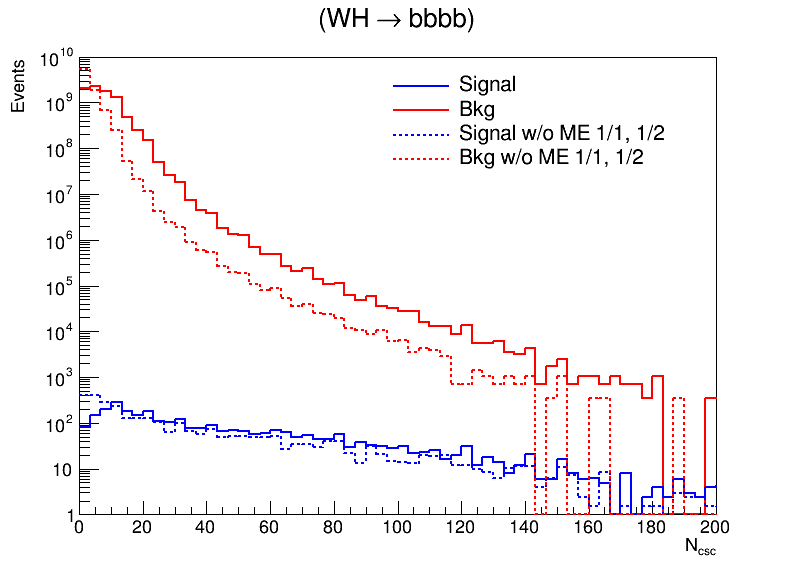

In [206]:
# Creates a 1D histogram of the number of CSC hits for the m50ct1m signal MC, QCD MC, and ZeroBias data 
# with no hit removal

c_1 = rt.TCanvas('c','c', 800, 600)

h['m55ct10m_wh_bbbb_inc'] = create_TH1D(nCsc['m55ct10m_wh_bbbb'], axis_title=['m55ct10m_wh_bbbb', 'Events'], name='m55ct10m_wh_bbbb', binning=[150,0,500], weights = weight_m55ct10m)
h['m55ct10m_wh_bbbb_inc'].SetLineColor(4)

h['m55ct10m_wh_bbbb_no112'] = create_TH1D(nCsc_removal['m55ct10m_wh_bbbb']['ME_112'], axis_title=['m55ct10m_wh_bbbb_no112', 'Events'], name='m55ct10m_wh_bbbb_no112', binning=[150,0,500], weights = weight_m55ct10m)
h['m55ct10m_wh_bbbb_no112'].SetLineColor(4)
h['m55ct10m_wh_bbbb_no112'].SetLineStyle(2)

h['nCsc_wjets'] = create_TH1D(nCsc['WJetsToLNu'], axis_title=['nCsc_wjets', 'Events'], name='nCsc_wjets', binning=[150,0,500], weights = weight_WJetsToLNu)
h['nCsc_wjets'].SetLineColor(2)

h['nCsc_wjets_no112'] = create_TH1D(nCsc_removal['WJetsToLNu']['ME_112'], axis_title=['nCsc_wjets_no112', 'Events'], name='nCsc_wjets_no112', binning=[150,0,500], weights = weight_WJetsToLNu)
h['nCsc_wjets_no112'].SetLineColor(2)
h['nCsc_wjets_no112'].SetLineStyle(2)


c_1.SetLogy()

# h['m55ct10m_wh_bbbb'].Scale(1.0/h['m55ct10m_wh_bbbb'].Integral())
# h['nCsc_wjets'].Scale(1.0/h['nCsc_wjets'].Integral())


h['m55ct10m_wh_bbbb_inc'].SetLineWidth(2)
h['m55ct10m_wh_bbbb_no112'].SetLineWidth(2)


h['nCsc_wjets'].SetLineWidth(2)
h['nCsc_wjets_no112'].SetLineWidth(2)

h['nCsc_wjets'].GetYaxis().SetRangeUser(1,10**10)
h['nCsc_wjets'].GetXaxis().SetRangeUser(0,200)


h['nCsc_wjets'].SetStats(0)
h['nCsc_wjets'].SetTitle("(WH #rightarrow bbbb)")
h['nCsc_wjets'].SetXTitle("N_{csc}")


h['nCsc_wjets'].Draw('histo')
h['m55ct10m_wh_bbbb_no112'].Draw('histo+same')
h['m55ct10m_wh_bbbb_inc'].Draw('histo+same')
h['nCsc_wjets_no112'].Draw('histo+same')

legend = rt.TLegend(0.48,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
# legend.SetFillStyle(0);
# legend.AddEntry( h['nCsc_m50ct1m'], "mX=50 GeV, c#tau=1m (MC)" , "L");
legend.AddEntry( h['m55ct10m_wh_bbbb_inc'], "Signal" , "L");
legend.AddEntry( h['nCsc_wjets'], "Bkg" , "L");
legend.AddEntry( h['m55ct10m_wh_bbbb_no112'], "Signal w/o ME 1/1, 1/2" , "L");
legend.AddEntry( h['nCsc_wjets_no112'], "Bkg w/o ME 1/1, 1/2" , "L");


legend.Draw();

c_1.Draw()

# c.SaveAs("ncsc_inclusive_mc_zeroBias.pdf")
# c.SaveAs("ncsc_inclusive_mc_zeroBias.C")

## Strategy II: Matching Clusters to pfJets

In [207]:
data_trees_complete = ['m55ct10m_wh_bbbb', 'WJetsToLNu']

### Algorithm

In [208]:
# Basic Implementation: loop through csc hits, and for each csc hit loop through jets, and get rid of this particular csc hit if its close to any jet
# Calculate deltaR between hit and jet, if greater than 0.4, accept hit, else reject

# print(len(csc_z['m55ct10m_wh_bbbb'][0]))
# print(len(jetEta['m55ct10m_wh_bbbb'][0]))

# print(len(csc_z['WJetsToLNu'][2]))
# print(len(jetEta['WJetsToLNu'][2]))

nCsc_jetMatch  = {}
nCsc_rechit_jetMatch = {}

for sample in data_trees_complete:
    nCsc_jetMatch[sample] = []
    nCsc_rechit_jetMatch[sample] = []
    for event in range(len(csc_eta[sample])):
        unmatched_hits = 0
        good_hits = 0
        hit_eta_list = csc_eta[sample][event]
        hit_phi_list = csc_phi[sample][event]
        hit_flag_list = nRechits_flag[sample][event]
        
        for hit in range(len(hit_eta_list)):
            hit_eta = hit_eta_list[hit]
            hit_phi = hit_phi_list[hit]
            hit_flag = hit_flag_list[hit]
            
            is_near_jet = False
            for pf_jet in range(len(jetEta[sample][event])):
                pfJet_eta = jetEta[sample][event][pf_jet]
                pfJet_phi = jetPhi[sample][event][pf_jet]
            
                dEta_jet = np.absolute(hit_eta - pfJet_eta)
                dPhi_jet = np.absolute(hit_phi - pfJet_phi)
                
                if dPhi_jet > np.pi:
                    dPhi_jet -= np.pi*2
                    
                elif dPhi_jet <= -np.pi:
                    dPhi_jet += np.pi*2
                    
                assert(dPhi_jet < np.pi and dPhi_jet > -np.pi)

                dR_jet = np.sqrt(dEta_jet**2 + dPhi_jet**2)
                if dR_jet <= 0.4:
                    is_near_jet = True
                    
            if is_near_jet == False:
                unmatched_hits += 1
                if hit_flag >= 3:
                    good_hits += 1
                
        nCsc_jetMatch[sample].append(unmatched_hits)
        nCsc_rechit_jetMatch[sample].append(good_hits)
        
        
        if (event % 10000) == 0:
            print(str(event) + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
            
    print(sample + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

0: 2019-08-20 15:55:02.236087-07:00
m55ct10m_wh_bbbb: 2019-08-20 15:55:08.303898-07:00
0: 2019-08-20 15:55:08.304205-07:00
10000: 2019-08-20 15:55:13.796645-07:00
20000: 2019-08-20 15:55:19.300876-07:00
30000: 2019-08-20 15:55:24.781777-07:00
40000: 2019-08-20 15:55:30.152280-07:00
50000: 2019-08-20 15:55:35.546099-07:00
60000: 2019-08-20 15:55:40.977402-07:00
70000: 2019-08-20 15:55:46.647274-07:00
80000: 2019-08-20 15:55:52.074831-07:00
90000: 2019-08-20 15:55:57.638376-07:00
100000: 2019-08-20 15:56:02.976441-07:00
110000: 2019-08-20 15:56:08.414088-07:00
120000: 2019-08-20 15:56:13.865183-07:00
130000: 2019-08-20 15:56:19.305099-07:00
140000: 2019-08-20 15:56:24.741675-07:00
150000: 2019-08-20 15:56:30.190074-07:00
160000: 2019-08-20 15:56:35.593897-07:00
170000: 2019-08-20 15:56:41.030703-07:00
180000: 2019-08-20 15:56:46.482683-07:00
190000: 2019-08-20 15:56:51.846860-07:00
200000: 2019-08-20 15:56:57.260999-07:00
210000: 2019-08-20 15:57:02.804802-07:00
220000: 2019-08-20 15:57:

1960000: 2019-08-20 16:12:57.341282-07:00
1970000: 2019-08-20 16:13:02.747532-07:00
1980000: 2019-08-20 16:13:08.265030-07:00
1990000: 2019-08-20 16:13:15.177554-07:00
2000000: 2019-08-20 16:13:20.851281-07:00
2010000: 2019-08-20 16:13:26.523294-07:00
2020000: 2019-08-20 16:13:32.768311-07:00
2030000: 2019-08-20 16:13:39.385611-07:00
2040000: 2019-08-20 16:13:45.312682-07:00
2050000: 2019-08-20 16:13:50.756905-07:00
2060000: 2019-08-20 16:13:57.016970-07:00
2070000: 2019-08-20 16:14:04.077576-07:00
2080000: 2019-08-20 16:14:09.598941-07:00
2090000: 2019-08-20 16:14:15.294259-07:00
2100000: 2019-08-20 16:14:22.168177-07:00
2110000: 2019-08-20 16:14:29.343282-07:00
2120000: 2019-08-20 16:14:36.479490-07:00
2130000: 2019-08-20 16:14:43.654598-07:00
2140000: 2019-08-20 16:14:49.990428-07:00
2150000: 2019-08-20 16:14:56.878061-07:00
2160000: 2019-08-20 16:15:03.946271-07:00
2170000: 2019-08-20 16:15:10.791950-07:00
2180000: 2019-08-20 16:15:17.898678-07:00
2190000: 2019-08-20 16:15:24.14623

3920000: 2019-08-20 16:31:20.687118-07:00
3930000: 2019-08-20 16:31:26.236159-07:00
3940000: 2019-08-20 16:31:31.674228-07:00
3950000: 2019-08-20 16:31:37.092698-07:00
3960000: 2019-08-20 16:31:42.620464-07:00
3970000: 2019-08-20 16:31:48.077716-07:00
3980000: 2019-08-20 16:31:53.445754-07:00
3990000: 2019-08-20 16:31:59.005310-07:00
4000000: 2019-08-20 16:32:04.394482-07:00
4010000: 2019-08-20 16:32:09.811671-07:00
4020000: 2019-08-20 16:32:15.662323-07:00
4030000: 2019-08-20 16:32:21.086918-07:00
4040000: 2019-08-20 16:32:26.647412-07:00
4050000: 2019-08-20 16:32:32.012042-07:00
4060000: 2019-08-20 16:32:37.456973-07:00
4070000: 2019-08-20 16:32:42.880453-07:00
4080000: 2019-08-20 16:32:48.233893-07:00
4090000: 2019-08-20 16:32:53.745249-07:00
4100000: 2019-08-20 16:32:59.112209-07:00
4110000: 2019-08-20 16:33:04.479095-07:00
4120000: 2019-08-20 16:33:10.042876-07:00
4130000: 2019-08-20 16:33:15.420106-07:00
4140000: 2019-08-20 16:33:20.846475-07:00
4150000: 2019-08-20 16:33:26.35390

5880000: 2019-08-20 16:49:06.447985-07:00
5890000: 2019-08-20 16:49:11.878971-07:00
5900000: 2019-08-20 16:49:17.280647-07:00
5910000: 2019-08-20 16:49:22.685352-07:00
5920000: 2019-08-20 16:49:28.074100-07:00
5930000: 2019-08-20 16:49:33.431959-07:00
5940000: 2019-08-20 16:49:38.903014-07:00
5950000: 2019-08-20 16:49:44.460487-07:00
5960000: 2019-08-20 16:49:49.976295-07:00
5970000: 2019-08-20 16:49:55.389421-07:00
5980000: 2019-08-20 16:50:00.921332-07:00
5990000: 2019-08-20 16:50:06.457968-07:00
6000000: 2019-08-20 16:50:11.896045-07:00
6010000: 2019-08-20 16:50:17.282833-07:00
6020000: 2019-08-20 16:50:22.769115-07:00
6030000: 2019-08-20 16:50:28.186977-07:00
6040000: 2019-08-20 16:50:33.553143-07:00
6050000: 2019-08-20 16:50:38.960608-07:00
6060000: 2019-08-20 16:50:44.296607-07:00
6070000: 2019-08-20 16:50:49.890125-07:00
6080000: 2019-08-20 16:50:55.406359-07:00
6090000: 2019-08-20 16:51:00.937141-07:00
6100000: 2019-08-20 16:51:06.415134-07:00
6110000: 2019-08-20 16:51:11.73192

7840000: 2019-08-20 17:07:38.456056-07:00
7850000: 2019-08-20 17:07:43.851886-07:00
7860000: 2019-08-20 17:07:49.358040-07:00
7870000: 2019-08-20 17:07:54.864193-07:00
7880000: 2019-08-20 17:08:00.379757-07:00
7890000: 2019-08-20 17:08:06.236216-07:00
7900000: 2019-08-20 17:08:12.874991-07:00
7910000: 2019-08-20 17:08:19.503167-07:00
7920000: 2019-08-20 17:08:25.044403-07:00
7930000: 2019-08-20 17:08:30.438189-07:00
7940000: 2019-08-20 17:08:37.349230-07:00
7950000: 2019-08-20 17:08:43.860482-07:00
7960000: 2019-08-20 17:08:49.279670-07:00
7970000: 2019-08-20 17:08:54.690967-07:00
7980000: 2019-08-20 17:09:01.209301-07:00
7990000: 2019-08-20 17:09:06.632503-07:00
8000000: 2019-08-20 17:09:12.079357-07:00
8010000: 2019-08-20 17:09:18.625348-07:00
8020000: 2019-08-20 17:09:24.019589-07:00
8030000: 2019-08-20 17:09:29.764760-07:00
8040000: 2019-08-20 17:09:35.241200-07:00
8050000: 2019-08-20 17:09:41.032647-07:00
8060000: 2019-08-20 17:09:47.076864-07:00
8070000: 2019-08-20 17:09:54.02626

9800000: 2019-08-20 17:26:09.275050-07:00
9810000: 2019-08-20 17:26:15.244534-07:00
9820000: 2019-08-20 17:26:20.781548-07:00
9830000: 2019-08-20 17:26:26.270872-07:00
9840000: 2019-08-20 17:26:32.066279-07:00
9850000: 2019-08-20 17:26:38.211104-07:00
9860000: 2019-08-20 17:26:45.329074-07:00
9870000: 2019-08-20 17:26:50.823541-07:00
9880000: 2019-08-20 17:26:56.285621-07:00
9890000: 2019-08-20 17:27:01.636789-07:00
9900000: 2019-08-20 17:27:07.168121-07:00
9910000: 2019-08-20 17:27:12.626908-07:00
9920000: 2019-08-20 17:27:18.098824-07:00
9930000: 2019-08-20 17:27:23.612636-07:00
9940000: 2019-08-20 17:27:30.057219-07:00
9950000: 2019-08-20 17:27:35.368221-07:00
9960000: 2019-08-20 17:27:41.215120-07:00
9970000: 2019-08-20 17:27:46.750983-07:00
9980000: 2019-08-20 17:27:52.238204-07:00
9990000: 2019-08-20 17:27:58.136582-07:00
10000000: 2019-08-20 17:28:05.154922-07:00
10010000: 2019-08-20 17:28:11.827139-07:00
10020000: 2019-08-20 17:28:19.119659-07:00
10030000: 2019-08-20 17:28:25.0

11710000: 2019-08-20 17:45:02.052363-07:00
11720000: 2019-08-20 17:45:07.629729-07:00
11730000: 2019-08-20 17:45:14.069860-07:00
11740000: 2019-08-20 17:45:20.051036-07:00
11750000: 2019-08-20 17:45:25.632627-07:00
11760000: 2019-08-20 17:45:31.460494-07:00
11770000: 2019-08-20 17:45:36.751696-07:00
11780000: 2019-08-20 17:45:42.907065-07:00
11790000: 2019-08-20 17:45:49.321970-07:00
11800000: 2019-08-20 17:45:55.973566-07:00
11810000: 2019-08-20 17:46:02.362166-07:00
11820000: 2019-08-20 17:46:08.904000-07:00
11830000: 2019-08-20 17:46:15.242350-07:00
11840000: 2019-08-20 17:46:21.531177-07:00
11850000: 2019-08-20 17:46:27.075818-07:00
11860000: 2019-08-20 17:46:32.575376-07:00
11870000: 2019-08-20 17:46:39.226477-07:00
11880000: 2019-08-20 17:46:45.096572-07:00
11890000: 2019-08-20 17:46:50.583724-07:00
11900000: 2019-08-20 17:46:56.360857-07:00
11910000: 2019-08-20 17:47:01.874019-07:00
11920000: 2019-08-20 17:47:07.615301-07:00
11930000: 2019-08-20 17:47:14.321159-07:00
11940000: 2

13620000: 2019-08-20 18:03:11.143697-07:00
13630000: 2019-08-20 18:03:16.760704-07:00
13640000: 2019-08-20 18:03:22.894334-07:00
13650000: 2019-08-20 18:03:28.487529-07:00
13660000: 2019-08-20 18:03:34.866789-07:00
13670000: 2019-08-20 18:03:40.602003-07:00
13680000: 2019-08-20 18:03:46.928258-07:00
13690000: 2019-08-20 18:03:52.421475-07:00
13700000: 2019-08-20 18:03:58.551597-07:00
13710000: 2019-08-20 18:04:04.287625-07:00
13720000: 2019-08-20 18:04:10.154260-07:00
13730000: 2019-08-20 18:04:15.646250-07:00
13740000: 2019-08-20 18:04:20.923534-07:00
13750000: 2019-08-20 18:04:26.728523-07:00
13760000: 2019-08-20 18:04:32.294586-07:00
13770000: 2019-08-20 18:04:38.267723-07:00
13780000: 2019-08-20 18:04:43.833285-07:00
13790000: 2019-08-20 18:04:49.654480-07:00
13800000: 2019-08-20 18:04:55.140440-07:00
13810000: 2019-08-20 18:05:00.535930-07:00
13820000: 2019-08-20 18:05:06.767285-07:00
13830000: 2019-08-20 18:05:12.536539-07:00
13840000: 2019-08-20 18:05:18.255708-07:00
13850000: 2

15530000: 2019-08-20 18:20:56.720576-07:00
15540000: 2019-08-20 18:21:01.994417-07:00
15550000: 2019-08-20 18:21:07.516716-07:00
15560000: 2019-08-20 18:21:12.939106-07:00
15570000: 2019-08-20 18:21:18.323362-07:00
15580000: 2019-08-20 18:21:23.642661-07:00
15590000: 2019-08-20 18:21:29.137184-07:00
15600000: 2019-08-20 18:21:34.616058-07:00
15610000: 2019-08-20 18:21:39.969998-07:00
15620000: 2019-08-20 18:21:45.373572-07:00
15630000: 2019-08-20 18:21:50.789745-07:00
15640000: 2019-08-20 18:21:56.156665-07:00
15650000: 2019-08-20 18:22:01.646017-07:00
15660000: 2019-08-20 18:22:06.994870-07:00
15670000: 2019-08-20 18:22:12.400048-07:00
15680000: 2019-08-20 18:22:17.666997-07:00
15690000: 2019-08-20 18:22:23.106103-07:00
15700000: 2019-08-20 18:22:28.524908-07:00
15710000: 2019-08-20 18:22:33.980986-07:00
15720000: 2019-08-20 18:22:39.269977-07:00
15730000: 2019-08-20 18:22:44.722052-07:00
15740000: 2019-08-20 18:22:50.154604-07:00
15750000: 2019-08-20 18:22:56.359917-07:00
15760000: 2

17440000: 2019-08-20 18:38:23.846696-07:00
17450000: 2019-08-20 18:38:29.312892-07:00
17460000: 2019-08-20 18:38:34.738686-07:00
17470000: 2019-08-20 18:38:40.154687-07:00
17480000: 2019-08-20 18:38:45.529050-07:00
17490000: 2019-08-20 18:38:50.968544-07:00
17500000: 2019-08-20 18:38:56.326145-07:00
17510000: 2019-08-20 18:39:01.761239-07:00
17520000: 2019-08-20 18:39:07.277525-07:00
17530000: 2019-08-20 18:39:12.590025-07:00
17540000: 2019-08-20 18:39:17.905305-07:00
17550000: 2019-08-20 18:39:23.271557-07:00
17560000: 2019-08-20 18:39:28.770192-07:00
17570000: 2019-08-20 18:39:34.017790-07:00
17580000: 2019-08-20 18:39:39.498910-07:00
17590000: 2019-08-20 18:39:44.895417-07:00
17600000: 2019-08-20 18:39:50.265391-07:00
17610000: 2019-08-20 18:39:55.713860-07:00
17620000: 2019-08-20 18:40:01.129191-07:00
17630000: 2019-08-20 18:40:06.575191-07:00
17640000: 2019-08-20 18:40:11.991465-07:00
17650000: 2019-08-20 18:40:17.836076-07:00
17660000: 2019-08-20 18:40:23.714650-07:00
17670000: 2

19350000: 2019-08-20 18:55:48.601494-07:00
19360000: 2019-08-20 18:55:53.995118-07:00
19370000: 2019-08-20 18:55:59.481425-07:00
19380000: 2019-08-20 18:56:04.916793-07:00
19390000: 2019-08-20 18:56:10.352532-07:00
19400000: 2019-08-20 18:56:15.743870-07:00
19410000: 2019-08-20 18:56:21.156433-07:00
19420000: 2019-08-20 18:56:26.598587-07:00
19430000: 2019-08-20 18:56:32.042129-07:00
19440000: 2019-08-20 18:56:37.490665-07:00
19450000: 2019-08-20 18:56:42.849889-07:00
19460000: 2019-08-20 18:56:48.244304-07:00
19470000: 2019-08-20 18:56:53.722049-07:00
19480000: 2019-08-20 18:56:59.160052-07:00
19490000: 2019-08-20 18:57:04.492900-07:00
19500000: 2019-08-20 18:57:09.867231-07:00
19510000: 2019-08-20 18:57:15.336858-07:00
19520000: 2019-08-20 18:57:20.629182-07:00
19530000: 2019-08-20 18:57:26.059168-07:00
19540000: 2019-08-20 18:57:31.469586-07:00
19550000: 2019-08-20 18:57:36.920852-07:00
19560000: 2019-08-20 18:57:42.339378-07:00
19570000: 2019-08-20 18:57:47.795655-07:00
19580000: 2

21260000: 2019-08-20 19:13:06.470069-07:00
21270000: 2019-08-20 19:13:11.961072-07:00
21280000: 2019-08-20 19:13:17.317844-07:00
21290000: 2019-08-20 19:13:22.768204-07:00
21300000: 2019-08-20 19:13:28.256144-07:00
21310000: 2019-08-20 19:13:33.768669-07:00
21320000: 2019-08-20 19:13:39.218225-07:00
21330000: 2019-08-20 19:13:44.612960-07:00
21340000: 2019-08-20 19:13:50.058799-07:00
21350000: 2019-08-20 19:13:55.606067-07:00
21360000: 2019-08-20 19:14:01.017568-07:00
21370000: 2019-08-20 19:14:06.411455-07:00
21380000: 2019-08-20 19:14:11.970711-07:00
21390000: 2019-08-20 19:14:17.581206-07:00
21400000: 2019-08-20 19:14:23.121909-07:00
21410000: 2019-08-20 19:14:28.570139-07:00
21420000: 2019-08-20 19:14:33.849303-07:00
21430000: 2019-08-20 19:14:39.368004-07:00
21440000: 2019-08-20 19:14:44.964528-07:00
21450000: 2019-08-20 19:14:50.364870-07:00
21460000: 2019-08-20 19:14:55.811067-07:00
21470000: 2019-08-20 19:15:01.148835-07:00
21480000: 2019-08-20 19:15:06.506850-07:00
21490000: 2

23170000: 2019-08-20 19:30:37.286133-07:00
23180000: 2019-08-20 19:30:43.055639-07:00
23190000: 2019-08-20 19:30:49.321483-07:00
23200000: 2019-08-20 19:30:54.773386-07:00
23210000: 2019-08-20 19:31:00.259356-07:00
23220000: 2019-08-20 19:31:06.959635-07:00
23230000: 2019-08-20 19:31:12.387786-07:00
23240000: 2019-08-20 19:31:18.097921-07:00
23250000: 2019-08-20 19:31:25.041501-07:00
23260000: 2019-08-20 19:31:30.506727-07:00
23270000: 2019-08-20 19:31:36.084654-07:00
23280000: 2019-08-20 19:31:41.745418-07:00
23290000: 2019-08-20 19:31:47.140458-07:00
23300000: 2019-08-20 19:31:52.485987-07:00
23310000: 2019-08-20 19:31:58.978396-07:00
23320000: 2019-08-20 19:32:05.427229-07:00
23330000: 2019-08-20 19:32:11.322284-07:00
23340000: 2019-08-20 19:32:17.010743-07:00
23350000: 2019-08-20 19:32:23.252708-07:00
23360000: 2019-08-20 19:32:28.687197-07:00
23370000: 2019-08-20 19:32:34.345018-07:00
23380000: 2019-08-20 19:32:40.832856-07:00
23390000: 2019-08-20 19:32:47.237078-07:00
23400000: 2

### Comparison Histogram between Baseline and Strategy II

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_match


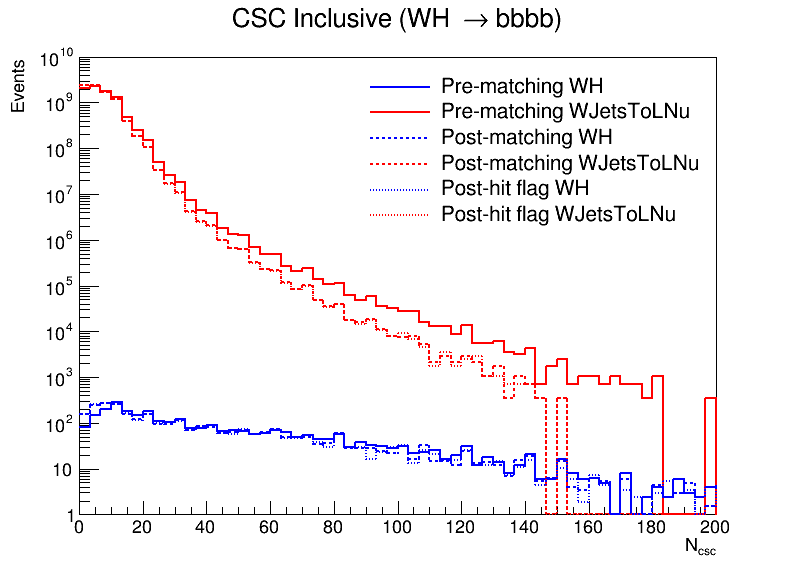

In [209]:
# Creates a 1D histogram of the number of CSC hits for the m50ct1m signal MC, QCD MC, and ZeroBias data 
# with no hit removal

c_match = rt.TCanvas('c_match','c_match', 800, 600)
# h = {}
# h['nCsc_m50ct1m'] = create_TH1D(nCsc['m50ct1m'], axis_title=['nCsc_m50ct1m', 'Events'], name='nCsc_m50ct1m', binning=[150,0,500])
# h['nCsc_m50ct1m'].SetLineColor(4)

h['n_match_m55ct10m_wh_bbbb'] = create_TH1D(nCsc_jetMatch['m55ct10m_wh_bbbb'], axis_title=['n_match_m55ct10m_wh_bbbb', 'Events'], name='n_match_m55ct10m_wh_bbbb', binning=[150,0,500], weights = weight_m55ct10m)
h['n_match_m55ct10m_wh_bbbb'].SetLineColor(4)
h['n_match_m55ct10m_wh_bbbb'].SetLineStyle(2)

h['n_match_wjets'] = create_TH1D(nCsc_jetMatch['WJetsToLNu'], axis_title=['n_match_wjets', 'Events'], name='n_match_wjets', binning=[150,0,500], weights=weight_WJetsToLNu)
h['n_match_wjets'].SetLineColor(2)
h['n_match_wjets'].SetLineStyle(2)

h['n_noMatch_m55ct10m_wh_bbbb'] = create_TH1D(nCsc['m55ct10m_wh_bbbb'], axis_title=['n_noMatch_m55ct10m_wh_bbbb', 'Events'], name='n_noMatch_m55ct10m_wh_bbbb', binning=[150,0,500], weights = weight_m55ct10m)
h['n_noMatch_m55ct10m_wh_bbbb'].SetLineColor(4)

h['n_noMatch_wjets'] = create_TH1D(nCsc['WJetsToLNu'], axis_title=['n_noMatch_wjets', 'Events'], name='n_noMatch_wjets', binning=[150,0,500], weights=weight_WJetsToLNu)
h['n_noMatch_wjets'].SetLineColor(2)

h['n_good_m55ct10m_wh_bbbb'] = create_TH1D(nCsc_rechit_jetMatch['m55ct10m_wh_bbbb'], axis_title=['n_good_m55ct10m_wh_bbbb', 'Events'], name='n_good_m55ct10m_wh_bbbb', binning=[150,0,500], weights = weight_m55ct10m)
h['n_good_m55ct10m_wh_bbbb'].SetLineColor(4)
h['n_good_m55ct10m_wh_bbbb'].SetLineStyle(3)

h['n_good_wjets'] = create_TH1D(nCsc_rechit_jetMatch['WJetsToLNu'], axis_title=['n_good_wjets', 'Events'], name='n_good_wjets', binning=[150,0,500], weights=weight_WJetsToLNu)
h['n_good_wjets'].SetLineColor(2)
h['n_good_wjets'].SetLineStyle(3)


# h['nCsc_zeroBias'] = create_TH1D(nCsc['zeroBias'], axis_title=['nCsc_zeroBias', 'Events'], name='nCsc_zeroBias', binning=[150,0,500])
# h['nCsc_zeroBias'].SetLineColor(2)
# h['nCsc_zeroBias'].SetLineStyle(1)

c_match.SetLogy()

# h['n_match_m55ct10m_wh_bbbb'].Scale(1.0/h['n_match_m55ct10m_wh_bbbb'].Integral())
# h['n_match_wjets'].Scale(1.0/h['n_match_wjets'].Integral())

# h['nCsc_wjets'].Scale(1.0/h['nCsc_wjets'].Integral())
# h['nCsc_zeroBias'].Scale(1.0/h['nCsc_zeroBias'].Integral())


h['n_noMatch_wjets'].SetLineWidth(2)
h['n_match_m55ct10m_wh_bbbb'].SetLineWidth(2)

h['n_match_wjets'].SetLineWidth(2)
h['n_noMatch_m55ct10m_wh_bbbb'].SetLineWidth(2)

h['n_good_wjets'].SetLineWidth(2)
h['n_good_m55ct10m_wh_bbbb'].SetLineWidth(2)

h['n_match_wjets'].GetXaxis().SetRangeUser(0,200)
h['n_match_wjets'].GetYaxis().SetRangeUser(1,10**10)

# h['n_match_wjets'].GetXaxis().SetRangeUser(0,200)
# h['nCsc_zeroBias'].GetXaxis().SetRangeUser(0,200)


h['n_match_wjets'].SetStats(0)
h['n_match_wjets'].SetTitle("CSC Inclusive (WH #rightarrow bbbb)")
h['n_match_wjets'].SetXTitle("N_{csc}")


h['n_match_wjets'].Draw('histo')
# h['nCsc_m50ct1m'].Draw('histo+same')
h['n_match_m55ct10m_wh_bbbb'].Draw('histo+same')
h['n_noMatch_wjets'].Draw('histo+same')
h['n_noMatch_m55ct10m_wh_bbbb'].Draw('histo+same')
h['n_good_wjets'].Draw('histo+same')
h['n_good_m55ct10m_wh_bbbb'].Draw('histo+same')


legend = rt.TLegend(0.45,0.60,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
# legend.SetFillStyle(0);
# legend.AddEntry( h['nCsc_m50ct1m'], "mX=50 GeV, c#tau=1m (MC)" , "L");
legend.AddEntry( h['n_noMatch_m55ct10m_wh_bbbb'], "Pre-matching WH" , "L");
legend.AddEntry( h['n_noMatch_wjets'], "Pre-matching WJetsToLNu" , "L");
legend.AddEntry( h['n_match_m55ct10m_wh_bbbb'], "Post-matching WH" , "L");
legend.AddEntry( h['n_match_wjets'], "Post-matching WJetsToLNu" , "L");
legend.AddEntry( h['n_good_m55ct10m_wh_bbbb'], "Post-hit flag WH" , "L");
legend.AddEntry( h['n_good_wjets'], "Post-hit flag WJetsToLNu" , "L");

# legend.AddEntry( h['nCsc_zeroBias'], "Zero Bias" , "L");

legend.Draw();

c_match.Draw()

# c.SaveAs("ncsc_inclusive_mc_zeroBias.pdf")
# c.SaveAs("ncsc_inclusive_mc_zeroBias.C")

### Event Display Test Area

In [210]:
print(np.array(nCsc_jetMatch['WJetsToLNu'])[(np.where(np.array(nCsc_jetMatch['WJetsToLNu'])>120)[0])])
print(np.array(nCsc['WJetsToLNu'])[(np.where(np.array(nCsc_jetMatch['WJetsToLNu'])>120)[0])])
print(np.array(lumiNum['WJetsToLNu'])[(np.where(np.array(nCsc_jetMatch['WJetsToLNu'])>120)[0])])
print(np.array(eventNum['WJetsToLNu'])[(np.where(np.array(nCsc_jetMatch['WJetsToLNu'])>120)[0])])

print(np.array(nCsc['WJetsToLNu'])[(np.where(np.array(nCsc['WJetsToLNu'])>120)[0])])
print(np.array(lumiNum['WJetsToLNu'])[(np.where(np.array(nCsc['WJetsToLNu'])>120)[0])])
print(np.array(eventNum['WJetsToLNu'])[(np.where(np.array(nCsc['WJetsToLNu'])>120)[0])])

[124 131 126 124 144 134 124 132 128 133 139 128 121 137 152 198 137 124
 124 142 121 121 133 122 130 143 128]
[124 131 126 124 144 134 124 132 128 133 139 132 125 142 152 198 137 124
 124 143 121 121 133 122 130 143 128]
[107881 215036 207167  33611 196757  49064 114103 175256 117407 180484
 156423 248097 238282  82251  60745 133876 134728 252408  78604 145978
  79199 125768 160710 163874 230597  47597 217472]
[26536651 52893848 50959418  8273802 48397385 12072622 28072749 43113642
 28880305 44396119 38480211 61023417 58608647 20233269 14948316 32929965
 33140339 62088086 19341271 35909632 19479569 30936452 39530410 40311665
 56719295 11710186 53495440]
[124 134 123 122 122 131 126 167 134 137 150 130 121 124 126 129 122 172
 124 144 227 134 124 158 132 148 128 151 123 122 122 131 134 122 163 129
 136 133 140 136 182 139 128 128 168 178 128 139 149 132 162 125 123 149
 130 133 129 122 148 142 121 124 126 135 127 154 132 142 122 152 126 121
 141 164 122 198 128 121 138 126 137 156 157 

In [211]:
print(len(nCsc_station['WJetsToLNu']['ME_11']))
print(len(nCsc['WJetsToLNu']))

23829396
23829396


In [212]:
print(len(lumiNum['WJetsToLNu'][(np.where(np.array(nCsc['WJetsToLNu'])>120)[0])]))
print(len(lumiNum['WJetsToLNu'][(np.where(np.array(nCsc_jetMatch['WJetsToLNu'])>120)[0])]))
print(lumiNum['WJetsToLNu'][(np.where(np.array(nCsc_jetMatch['WJetsToLNu'])>120)[0])])
print(eventNum['WJetsToLNu'][(np.where(np.array(nCsc_jetMatch['WJetsToLNu'])>120)[0])])
print(nCsc['WJetsToLNu'][(np.where(np.array(nCsc_jetMatch['WJetsToLNu'])>120)[0])])
print(np.array(nCsc_jetMatch['WJetsToLNu'])[(np.where(np.array(nCsc_jetMatch['WJetsToLNu'])>120)[0])])
print(np.array(nCsc_rechit_jetMatch['WJetsToLNu'])[(np.where(np.array(nCsc_jetMatch['WJetsToLNu'])>120)[0])])

149
27
[107881 215036 207167  33611 196757  49064 114103 175256 117407 180484
 156423 248097 238282  82251  60745 133876 134728 252408  78604 145978
  79199 125768 160710 163874 230597  47597 217472]
[26536651 52893848 50959418  8273802 48397385 12072622 28072749 43113642
 28880305 44396119 38480211 61023417 58608647 20233269 14948316 32929965
 33140339 62088086 19341271 35909632 19479569 30936452 39530410 40311665
 56719295 11710186 53495440]
[124 131 126 124 144 134 124 132 128 133 139 132 125 142 152 198 137 124
 124 143 121 121 133 122 130 143 128]
[124 131 126 124 144 134 124 132 128 133 139 128 121 137 152 198 137 124
 124 142 121 121 133 122 130 143 128]
[124 124 126 124 144 134 124 124 128 133 135 128 121 137 152 198 137 124
 124 140 121 119 133 122 130 142 128]


## Strategy III: Fast Jet Clustering

### Initialize Unweighted (p<sub>T</sub>, mass)

In [213]:
fake_pt_csc = {}
fake_mass_csc = {}

print('Start: ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

for species in data_trees.keys():
    event_empty = np.copy(csc_z[species])*(-999)
    fake_pt_csc[species] = event_empty
    fake_mass_csc[species] = event_empty
    
    print(species + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-08-20 19:39:40.977252-07:00
m55ct10m_wh_bbbb_minus: 2019-08-20 19:39:40.993291-07:00
m55ct10m_wh_bbbb_plus: 2019-08-20 19:39:40.996911-07:00
WJetsToLNu: 2019-08-20 19:40:45.206263-07:00
ggH: 2019-08-20 19:40:45.340009-07:00
zeroBias: 2019-08-20 19:40:54.918203-07:00
qcd: 2019-08-20 19:40:55.074325-07:00


### Combination of Variables for WH Signal Sample

In [214]:
fake_pt_csc['m55ct10m_wh_bbbb'] = np.concatenate([fake_pt_csc['m55ct10m_wh_bbbb_minus'], fake_pt_csc['m55ct10m_wh_bbbb_plus']])
fake_mass_csc['m55ct10m_wh_bbbb'] = np.concatenate([fake_mass_csc['m55ct10m_wh_bbbb_minus'], fake_mass_csc['m55ct10m_wh_bbbb_plus']])

### Create Structured Data Arrays

In [216]:
data_trees_cluster = ['m55ct10m_wh_bbbb', 'WJetsToLNu', 'zeroBias', 'ggH', 'qcd']

In [218]:
cluster_dataset = {}

print('Start: ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

for species in data_trees_cluster:
    cluster_dataset[species] = np.dstack((fake_pt_csc[species], csc_eta[species], csc_phi[species], fake_mass_csc[species], csc_z[species]))

    print(species + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-08-20 19:43:59.240838-07:00
m55ct10m_wh_bbbb: 2019-08-20 19:43:59.241457-07:00
WJetsToLNu: 2019-08-20 19:45:09.218910-07:00
zeroBias: 2019-08-20 19:45:19.548437-07:00
ggH: 2019-08-20 19:45:19.691338-07:00
qcd: 2019-08-20 19:45:19.858840-07:00


### Algorithm Call: https://github.com/scikit-hep/pyjet

In [219]:
# Basic implementation: Save pseudojets as [eta, phi, ncsc], remake jet matching to loop over CSC hit clusters instead of CSC hits

In [ ]:
csc_clusters = {}
ncsc_cluster = {}

print('Start: ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

for species in data_trees_cluster:
    csc_clusters[species] = []
    ncsc_cluster[species] = []
    for hit_seq in range(len(csc_z[species])):
#         event_clusters = []
        test_data_0 = np.dstack(cluster_dataset[species][0][hit_seq])[0].astype(np.float64)
        test_data_0 = np.core.records.fromarrays(test_data_0.transpose(), names='pT, eta, phi, mass, z_pos', formats = 'f8, f8, f8, f8, f8')
        sequence_0 = cluster(test_data_0, R=0.4, p=0)
        jets = sequence_0.inclusive_jets()
#         event_clusters.append(jets)
#         csc_clusters[species].append(event_clusters)
        csc_clusters[species].append(jets)

        total_hits = 0
        for cluster_hits in range(len(jets)):
            if len(jets[cluster_hits].constituents_array()) > 3:
                total_hits += len(jets[cluster_hits].constituents_array())
        ncsc_cluster[species].append(total_hits)
    
    
        if (hit_seq % 10000) == 0:
            print(str(hit_seq) + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
    
    print(species + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-08-20 19:56:36.240755-07:00
0: 2019-08-20 19:56:36.242259-07:00
m55ct10m_wh_bbbb: 2019-08-20 19:56:37.662523-07:00
0: 2019-08-20 19:56:37.662963-07:00
10000: 2019-08-20 19:56:39.962919-07:00
20000: 2019-08-20 19:56:42.269721-07:00
30000: 2019-08-20 19:56:44.556921-07:00
40000: 2019-08-20 19:56:46.837519-07:00
50000: 2019-08-20 19:56:49.123710-07:00
60000: 2019-08-20 19:56:51.418586-07:00
70000: 2019-08-20 19:56:53.716380-07:00
80000: 2019-08-20 19:56:56.001152-07:00
90000: 2019-08-20 19:56:58.292170-07:00
100000: 2019-08-20 19:57:00.570209-07:00
110000: 2019-08-20 19:57:04.415999-07:00
120000: 2019-08-20 19:57:06.714518-07:00
130000: 2019-08-20 19:57:09.003026-07:00
140000: 2019-08-20 19:57:11.296601-07:00
150000: 2019-08-20 19:57:13.575300-07:00
160000: 2019-08-20 19:57:15.860804-07:00
170000: 2019-08-20 19:57:18.146397-07:00
180000: 2019-08-20 19:57:20.441416-07:00
190000: 2019-08-20 19:57:22.719369-07:00
200000: 2019-08-20 19:57:25.028816-07:00
210000: 2019-08-20 19:57:2

1950000: 2019-08-20 20:04:24.762500-07:00
1960000: 2019-08-20 20:04:27.123379-07:00
1970000: 2019-08-20 20:04:29.450663-07:00
1980000: 2019-08-20 20:04:31.775574-07:00
1990000: 2019-08-20 20:04:34.107182-07:00
2000000: 2019-08-20 20:04:36.438799-07:00
2010000: 2019-08-20 20:04:38.783372-07:00
2020000: 2019-08-20 20:04:41.122188-07:00
2030000: 2019-08-20 20:04:43.453125-07:00
2040000: 2019-08-20 20:04:45.790191-07:00
2050000: 2019-08-20 20:04:48.126466-07:00
2060000: 2019-08-20 20:04:50.481434-07:00
2070000: 2019-08-20 20:04:52.821421-07:00
2080000: 2019-08-20 20:04:55.166798-07:00
2090000: 2019-08-20 20:05:00.295433-07:00
2100000: 2019-08-20 20:05:02.639189-07:00
2110000: 2019-08-20 20:05:04.989039-07:00
2120000: 2019-08-20 20:05:07.330212-07:00
2130000: 2019-08-20 20:05:09.664475-07:00
2140000: 2019-08-20 20:05:12.011611-07:00
2150000: 2019-08-20 20:05:14.350503-07:00
2160000: 2019-08-20 20:05:16.695782-07:00
2170000: 2019-08-20 20:05:19.041666-07:00
2180000: 2019-08-20 20:05:21.38293

3910000: 2019-08-20 20:12:13.967745-07:00
3920000: 2019-08-20 20:12:16.308536-07:00
3930000: 2019-08-20 20:12:18.656720-07:00
3940000: 2019-08-20 20:12:20.992794-07:00
3950000: 2019-08-20 20:12:23.328324-07:00
3960000: 2019-08-20 20:12:25.667462-07:00
3970000: 2019-08-20 20:12:28.296278-07:00
3980000: 2019-08-20 20:12:30.667026-07:00
3990000: 2019-08-20 20:12:33.006447-07:00
4000000: 2019-08-20 20:12:35.341085-07:00
4010000: 2019-08-20 20:12:37.670168-07:00
4020000: 2019-08-20 20:12:40.296871-07:00
4030000: 2019-08-20 20:12:42.644246-07:00
4040000: 2019-08-20 20:12:44.987697-07:00
4050000: 2019-08-20 20:12:47.318803-07:00
4060000: 2019-08-20 20:12:49.656381-07:00
4070000: 2019-08-20 20:12:51.988075-07:00
4080000: 2019-08-20 20:12:54.321169-07:00
4090000: 2019-08-20 20:12:56.666286-07:00
4100000: 2019-08-20 20:12:59.005252-07:00
4110000: 2019-08-20 20:13:01.380169-07:00
4120000: 2019-08-20 20:13:03.740637-07:00
4130000: 2019-08-20 20:13:06.086244-07:00
4140000: 2019-08-20 20:13:08.43208

5870000: 2019-08-20 20:19:57.616335-07:00
5880000: 2019-08-20 20:19:59.953510-07:00
5890000: 2019-08-20 20:20:02.290130-07:00
5900000: 2019-08-20 20:20:04.610368-07:00
5910000: 2019-08-20 20:20:06.937796-07:00
5920000: 2019-08-20 20:20:09.255489-07:00
5930000: 2019-08-20 20:20:11.572108-07:00
5940000: 2019-08-20 20:20:19.019040-07:00
5950000: 2019-08-20 20:20:21.345267-07:00
5960000: 2019-08-20 20:20:23.667671-07:00
5970000: 2019-08-20 20:20:25.997965-07:00
5980000: 2019-08-20 20:20:28.328224-07:00
5990000: 2019-08-20 20:20:30.656902-07:00
6000000: 2019-08-20 20:20:32.991375-07:00
6010000: 2019-08-20 20:20:35.322165-07:00
6020000: 2019-08-20 20:20:37.658517-07:00
6030000: 2019-08-20 20:20:39.980987-07:00
6040000: 2019-08-20 20:20:42.309239-07:00
6050000: 2019-08-20 20:20:44.631696-07:00
6060000: 2019-08-20 20:20:46.956927-07:00
6070000: 2019-08-20 20:20:49.288653-07:00
6080000: 2019-08-20 20:20:51.625083-07:00
6090000: 2019-08-20 20:20:53.952195-07:00
6100000: 2019-08-20 20:20:56.28162

7830000: 2019-08-20 20:27:46.591178-07:00
7840000: 2019-08-20 20:27:48.924323-07:00
7850000: 2019-08-20 20:27:51.274578-07:00
7860000: 2019-08-20 20:27:53.602911-07:00
7870000: 2019-08-20 20:27:55.941540-07:00
7880000: 2019-08-20 20:27:58.290614-07:00
7890000: 2019-08-20 20:28:00.632652-07:00
7900000: 2019-08-20 20:28:02.973429-07:00
7910000: 2019-08-20 20:28:05.309304-07:00
7920000: 2019-08-20 20:28:07.638432-07:00
7930000: 2019-08-20 20:28:09.971206-07:00
7940000: 2019-08-20 20:28:12.320796-07:00
7950000: 2019-08-20 20:28:14.656939-07:00
7960000: 2019-08-20 20:28:16.993525-07:00
7970000: 2019-08-20 20:28:19.323455-07:00
7980000: 2019-08-20 20:28:21.660979-07:00
7990000: 2019-08-20 20:28:23.996453-07:00
8000000: 2019-08-20 20:28:26.345288-07:00
8010000: 2019-08-20 20:28:28.691979-07:00
8020000: 2019-08-20 20:28:31.042300-07:00
8030000: 2019-08-20 20:28:33.374444-07:00
8040000: 2019-08-20 20:28:35.700889-07:00
8050000: 2019-08-20 20:28:38.044295-07:00
8060000: 2019-08-20 20:28:40.37741

9790000: 2019-08-20 20:35:33.915722-07:00
9800000: 2019-08-20 20:35:36.254476-07:00
9810000: 2019-08-20 20:35:38.597311-07:00
9820000: 2019-08-20 20:35:40.942915-07:00
9830000: 2019-08-20 20:35:43.280703-07:00
9840000: 2019-08-20 20:35:45.622131-07:00
9850000: 2019-08-20 20:35:47.955835-07:00
9860000: 2019-08-20 20:35:50.293810-07:00
9870000: 2019-08-20 20:35:52.632627-07:00
9880000: 2019-08-20 20:35:54.974336-07:00
9890000: 2019-08-20 20:35:57.304009-07:00
9900000: 2019-08-20 20:35:59.653137-07:00
9910000: 2019-08-20 20:36:01.996799-07:00
9920000: 2019-08-20 20:36:04.344232-07:00
9930000: 2019-08-20 20:36:06.697611-07:00
9940000: 2019-08-20 20:36:09.035181-07:00
9950000: 2019-08-20 20:36:11.385472-07:00
9960000: 2019-08-20 20:36:13.736653-07:00
9970000: 2019-08-20 20:36:16.066126-07:00
9980000: 2019-08-20 20:36:18.404943-07:00
9990000: 2019-08-20 20:36:20.750365-07:00
10000000: 2019-08-20 20:36:23.085454-07:00
10010000: 2019-08-20 20:36:25.428804-07:00
10020000: 2019-08-20 20:36:27.77

11710000: 2019-08-20 20:43:04.809136-07:00
11720000: 2019-08-20 20:43:07.171196-07:00
11730000: 2019-08-20 20:43:09.519514-07:00
11740000: 2019-08-20 20:43:11.861373-07:00
11750000: 2019-08-20 20:43:14.201343-07:00
11760000: 2019-08-20 20:43:16.548240-07:00
11770000: 2019-08-20 20:43:18.882537-07:00
11780000: 2019-08-20 20:43:21.228672-07:00
11790000: 2019-08-20 20:43:23.576271-07:00
11800000: 2019-08-20 20:43:25.917853-07:00
11810000: 2019-08-20 20:43:28.254238-07:00
11820000: 2019-08-20 20:43:30.580685-07:00
11830000: 2019-08-20 20:43:32.912876-07:00
11840000: 2019-08-20 20:43:35.237417-07:00
11850000: 2019-08-20 20:43:37.568337-07:00
11860000: 2019-08-20 20:43:39.908836-07:00
11870000: 2019-08-20 20:43:42.250742-07:00
11880000: 2019-08-20 20:43:44.596497-07:00
11890000: 2019-08-20 20:43:46.934752-07:00
11900000: 2019-08-20 20:43:49.272547-07:00
11910000: 2019-08-20 20:43:51.597410-07:00
11920000: 2019-08-20 20:43:53.932963-07:00
11930000: 2019-08-20 20:43:56.275195-07:00
11940000: 2

13620000: 2019-08-20 20:50:42.063111-07:00
13630000: 2019-08-20 20:50:44.409060-07:00
13640000: 2019-08-20 20:50:46.757411-07:00
13650000: 2019-08-20 20:50:49.107649-07:00
13660000: 2019-08-20 20:50:51.460918-07:00
13670000: 2019-08-20 20:50:53.802262-07:00
13680000: 2019-08-20 20:50:56.152380-07:00
13690000: 2019-08-20 20:50:58.499132-07:00
13700000: 2019-08-20 20:51:00.842561-07:00
13710000: 2019-08-20 20:51:03.181827-07:00
13720000: 2019-08-20 20:51:05.526440-07:00
13730000: 2019-08-20 20:51:07.870062-07:00
13740000: 2019-08-20 20:51:10.215147-07:00
13750000: 2019-08-20 20:51:12.551401-07:00
13760000: 2019-08-20 20:51:14.892078-07:00
13770000: 2019-08-20 20:51:17.228089-07:00
13780000: 2019-08-20 20:51:19.564968-07:00
13790000: 2019-08-20 20:51:21.900288-07:00
13800000: 2019-08-20 20:51:24.240608-07:00
13810000: 2019-08-20 20:51:26.575397-07:00
13820000: 2019-08-20 20:51:28.917847-07:00
13830000: 2019-08-20 20:51:31.273520-07:00
13840000: 2019-08-20 20:51:33.618253-07:00
13850000: 2

15530000: 2019-08-20 20:58:20.672612-07:00
15540000: 2019-08-20 20:58:23.003034-07:00
15550000: 2019-08-20 20:58:25.351142-07:00
15560000: 2019-08-20 20:58:27.696002-07:00
15570000: 2019-08-20 20:58:30.045500-07:00
15580000: 2019-08-20 20:58:32.373370-07:00
15590000: 2019-08-20 20:58:34.719574-07:00
15600000: 2019-08-20 20:58:37.061578-07:00
15610000: 2019-08-20 20:58:39.407961-07:00
15620000: 2019-08-20 20:58:41.745256-07:00
15630000: 2019-08-20 20:58:44.094680-07:00
15640000: 2019-08-20 20:58:46.431499-07:00
15650000: 2019-08-20 20:58:48.779305-07:00
15660000: 2019-08-20 20:58:51.120790-07:00
15670000: 2019-08-20 20:58:53.463634-07:00
15680000: 2019-08-20 20:58:55.796465-07:00
15690000: 2019-08-20 20:58:58.139916-07:00
15700000: 2019-08-20 20:59:00.482202-07:00
15710000: 2019-08-20 20:59:02.830129-07:00
15720000: 2019-08-20 20:59:05.174474-07:00
15730000: 2019-08-20 20:59:07.516368-07:00
15740000: 2019-08-20 20:59:09.869387-07:00
15750000: 2019-08-20 20:59:12.210297-07:00
15760000: 2

17440000: 2019-08-20 21:07:00.957001-07:00
17450000: 2019-08-20 21:07:04.628158-07:00
17460000: 2019-08-20 21:07:09.965035-07:00
17470000: 2019-08-20 21:07:25.785064-07:00
17480000: 2019-08-20 21:07:35.200165-07:00
17490000: 2019-08-20 21:07:47.256240-07:00
17500000: 2019-08-20 21:07:56.698376-07:00
17510000: 2019-08-20 21:08:04.163019-07:00
17520000: 2019-08-20 21:08:15.259656-07:00
17530000: 2019-08-20 21:08:24.042711-07:00
17540000: 2019-08-20 21:08:37.446306-07:00
17550000: 2019-08-20 21:08:48.078765-07:00
17560000: 2019-08-20 21:08:53.436564-07:00
17570000: 2019-08-20 21:08:55.905230-07:00
17580000: 2019-08-20 21:08:58.445918-07:00
17590000: 2019-08-20 21:09:12.634581-07:00
17600000: 2019-08-20 21:09:18.725156-07:00
17610000: 2019-08-20 21:09:30.939631-07:00
17620000: 2019-08-20 21:09:37.424445-07:00
17630000: 2019-08-20 21:09:39.964215-07:00
17640000: 2019-08-20 21:09:47.835304-07:00
17650000: 2019-08-20 21:09:56.240757-07:00
17660000: 2019-08-20 21:10:14.628354-07:00
17670000: 2

### Comparison Histogram between Baseline and Strategy III

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


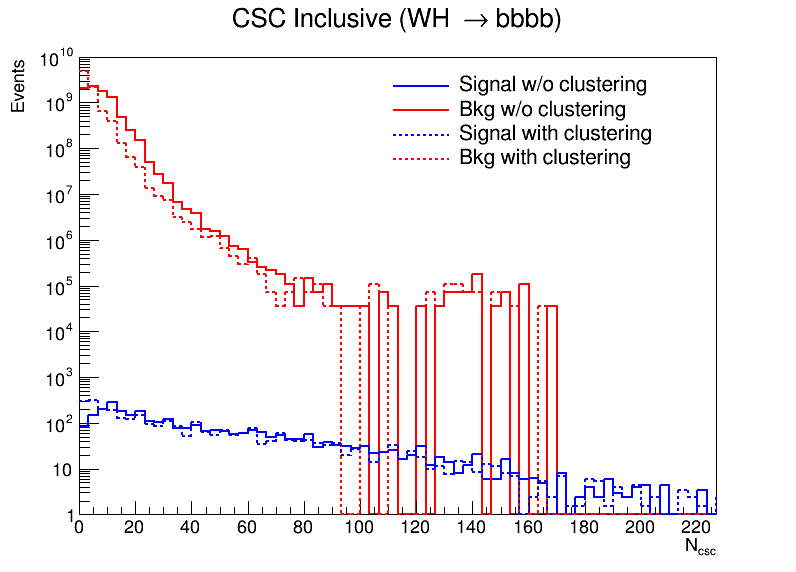

In [97]:
# Creates a 1D histogram of the number of CSC hits for the m50ct1m signal MC, QCD MC, and ZeroBias data 
# with no hit removal

c = rt.TCanvas('c','c', 800, 600)
h = {}
# h['nCsc_m50ct1m'] = create_TH1D(nCsc['m50ct1m'], axis_title=['nCsc_m50ct1m', 'Events'], name='nCsc_m50ct1m', binning=[150,0,500])
# h['nCsc_m50ct1m'].SetLineColor(4)

h['m55ct10m_wh_bbbb'] = create_TH1D(nCsc['m55ct10m_wh_bbbb'], axis_title=['m55ct10m_wh_bbbb', 'Events'], name='m55ct10m_wh_bbbb', binning=[150,0,500], weights = weight_m55ct10m)
h['m55ct10m_wh_bbbb'].SetLineColor(4)

h['m55ct10m_wh_bbbb_cluster'] = create_TH1D(ncsc_cluster['m55ct10m_wh_bbbb'], axis_title=['m55ct10m_wh_bbbb_cluster', 'Events'], name='m55ct10m_wh_bbbb_cluster', binning=[150,0,500], weights = weight_m55ct10m)
h['m55ct10m_wh_bbbb_cluster'].SetLineColor(4)
h['m55ct10m_wh_bbbb_cluster'].SetLineStyle(2)

h['nCsc_wjets'] = create_TH1D(nCsc['WJetsToLNu'], axis_title=['nCsc_wjets', 'Events'], name='nCsc_wjets', binning=[150,0,500], weights = weight_WJetsToLNu)
h['nCsc_wjets'].SetLineColor(2)

h['nCsc_wjets_cluster'] = create_TH1D(ncsc_cluster['WJetsToLNu'], axis_title=['nCsc_wjets_cluster', 'Events'], name='nCsc_wjets_cluster', binning=[150,0,500], weights = weight_WJetsToLNu)
h['nCsc_wjets_cluster'].SetLineColor(2)
h['nCsc_wjets_cluster'].SetLineStyle(2)

c.SetLogy()

h['m55ct10m_wh_bbbb'].SetLineWidth(2)
h['m55ct10m_wh_bbbb_cluster'].SetLineWidth(2)

h['nCsc_wjets'].SetLineWidth(2)
h['nCsc_wjets_cluster'].SetLineWidth(2)

# h['nCsc_m50ct1m'].GetXaxis().SetRangeUser(0,200)
h['nCsc_wjets'].GetYaxis().SetRangeUser(1,10**10)

h['nCsc_wjets'].GetXaxis().SetRangeUser(0,225)
# h['nCsc_zeroBias'].GetXaxis().SetRangeUser(0,200)


h['nCsc_wjets'].SetStats(0)
h['nCsc_wjets'].SetTitle("CSC Inclusive (WH #rightarrow bbbb)")
h['nCsc_wjets'].SetXTitle("N_{csc}")


h['nCsc_wjets'].Draw('histo')
# h['nCsc_m50ct1m'].Draw('histo+same')
h['m55ct10m_wh_bbbb'].Draw('histo+same')
h['nCsc_wjets_cluster'].Draw('histo+same')
h['m55ct10m_wh_bbbb_cluster'].Draw('histo+same')

# h['nCsc_zeroBias'].Draw('histo+same')

legend = rt.TLegend(0.48,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
# legend.SetFillStyle(0);
# legend.AddEntry( h['nCsc_m50ct1m'], "mX=50 GeV, c#tau=1m (MC)" , "L");
legend.AddEntry( h['m55ct10m_wh_bbbb'], "Signal w/o clustering" , "L");
legend.AddEntry( h['nCsc_wjets'], "Bkg w/o clustering" , "L");
legend.AddEntry( h['m55ct10m_wh_bbbb_cluster'], "Signal with clustering" , "L");
legend.AddEntry( h['nCsc_wjets_cluster'], "Bkg with clustering" , "L");
# legend.AddEntry( h['nCsc_zeroBias'], "Zero Bias" , "L");

legend.Draw();

c.Draw()

# c.SaveAs("ncsc_inclusive_mc_zeroBias.pdf")
# c.SaveAs("ncsc_inclusive_mc_zeroBias.C")

## Clustering Display: Implemented via k-means

### Algorithm: https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

In [100]:
# k-means clustering algorithm
# For more information, check out https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

MAX_ITERATIONS = 100
# Function: Should Stop
# -------------
# Returns True or False if k-means is done. K-means terminates either
# because it has run a maximum number of iterations OR the centroids
# stop changing.
def shouldStop(oldCentroids, centroids, iterations):
    if iterations > MAX_ITERATIONS: return True
    return np.array_equal(oldCentroids,centroids) and iterations > 0


# Function: Get Labels
# -------------
# Returns a label for each piece of data in the dataset. 
def getLabels(dataSet, centroids, i):
    #print 1
    #for i in dataSet:
    dist = cdist( dataSet, centroids, metric='euclidean' )
    
    #print dist
    if i < 1:
        dist[dist>1.0] = 999
    elif i < 2:
        dist[dist>0.8] = 999
    else:
        dist[dist>0.4] = 999
        
    #print dist
    #print np.argmin(dist, axis=1)
    return np.argmin(dist, axis=1)
    #print dataSet
    # For each element in the dataset, chose the closest centroid. 
    # Make that centroid the element's label.

# Function: Get Centroids
# -------------
# Returns k centroids, each of dimension n.
def getCentroids_kmeans(dataSet, centroids, labels, k):
    #print centroids
    newcentroid = np.empty((0,2))
    new_centroid_constituents = []
    for i in range(k):
        sel = labels[:] == i
        #print i, dataSet[sel], np.count_nonzero(dataSet[sel])/2
        if np.count_nonzero(dataSet[sel]) > 0:
            #print np.average(dataSet[sel], axis=0)
            #newcentroid.append(np.average(dataSet[sel], axis=0))
            selected = [np.average(dataSet[sel], axis=0)]
            for val in selected:
                newcentroid = np.append(newcentroid,[val], axis=0)
            #newcentroid = np.append(newcentroid,np.average(dataSet[sel], axis=0), axis=0)
            new_centroid_constituents.append(np.count_nonzero(dataSet[sel])/2)
        else:
            newcentroid = np.append(newcentroid,[centroids[i]],axis=0)
            new_centroid_constituents.append(0)
    
    return newcentroid,new_centroid_constituents
    # Each centroid is the geometric mean of the points that
    # have that centroid's label. Important: If a centroid is empty (no points have
    # that centroid's label) you should randomly re-initialize it.
    
# Function: Get Centroids
# -------------
# Returns k random centroids, each of dimension n.
def getRandomCentroids():
    # Each centroid is the geometric mean of the points that
    # have that centroid's label. Important: If a centroid is empty (no points have
    # that centroid's label) you should randomly re-initialize it.
    even_list = np.linspace(-4.0, 4.0, num=5)
    centers  = np.empty((0,2))
    for i in even_list:
        for j in even_list:
            #print i,j
            new_arr = np.array([i,j])
            centers = np.append(centers,[new_arr],axis=0)
    #print centers
    return centers
    #return np.mgrid[-4:4.1:2, -4:4.1:2].reshape(2,-1).T
    #return np.random.rand(k,numFeatures)

# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
def kmeans(dataSet, k):
    # Initialize centroids randomly
    numFeatures = dataSet.ndim
    centroids = getRandomCentroids()
    centroid_constituents = np.repeat(-999, 25)
    # Initialize book keeping vars.
    iterations = 0
    oldCentroids = np.empty((25,2))
    oldCentroids[:] = centroids
    #np.random.rand(1,2)
    #print centroids
    # Run the main k-means algorithm
    while not shouldStop(oldCentroids, centroids, iterations):
        # Save old centroids for convergence test. Book keeping.
        oldCentroids[:] = centroids
        #print oldCentroids
        #print 'iter', iterations
        
        # Assign labels to each datapoint based on centroids
        labels = getLabels(dataSet, centroids, iterations)
        # Assign centroids based on datapoint labels
        
        centroids,centroid_constituents = getCentroids_kmeans(dataSet, oldCentroids, labels, k)
        #print centroids
        iterations += 1
        
    # We can get the labels too by calling getLabels(dataSet, centroids)
    return centroids,centroid_constituents

####################################################################################################

# k-medians Algorithm
# -------------
# k-medians is equivalent algorithm to k-means except it calculates the median instead of the average

# Function: Get Centroids
# -------------
# Returns k centroids, each of dimension n.
def getCentroids_kmedians(dataSet, centroids, labels, k):
    #print centroids
    newcentroid = np.empty((0,2))
    new_centroid_constituents = []
    for i in range(k):
        sel = labels[:] == i
        #print i, dataSet[sel], np.count_nonzero(dataSet[sel])/2
        if np.count_nonzero(dataSet[sel]) > 0:
            #print np.average(dataSet[sel], axis=0)
            #newcentroid.append(np.average(dataSet[sel], axis=0))
            selected = [np.median(dataSet[sel], axis=0)]
            for val in selected:
                newcentroid = np.append(newcentroid,[val], axis=0)
            #newcentroid = np.append(newcentroid,np.average(dataSet[sel], axis=0), axis=0)
            new_centroid_constituents.append(np.count_nonzero(dataSet[sel])/2)
        else:
            newcentroid = np.append(newcentroid,[centroids[i]],axis=0)
            new_centroid_constituents.append(0)
    
    return newcentroid,new_centroid_constituents
    # Each centroid is the geometric median of the points that
    # have that centroid's label. Important: If a centroid is empty (no points have
    # that centroid's label) you should randomly re-initialize it.

# Function: K Medians
# -------------
# K-medians is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
def kmedians(dataSet, k):
    # Initialize centroids randomly
    numFeatures = dataSet.ndim
    centroids = getRandomCentroids()
    centroid_constituents = np.repeat(-999, 25)
    # Initialize book keeping vars.
    iterations = 0
    oldCentroids = np.empty((25,2))
    oldCentroids[:] = centroids
    #np.random.rand(1,2)
    #print centroids
    # Run the main k-means algorithm
    while not shouldStop(oldCentroids, centroids, iterations):
        # Save old centroids for convergence test. Book keeping.
        oldCentroids[:] = centroids
        #print oldCentroids
        #print 'iter', iterations
        
        # Assign labels to each datapoint based on centroids
        labels = getLabels(dataSet, centroids, iterations)
        # Assign centroids based on datapoint labels
        
        centroids,centroid_constituents = getCentroids_kmeans(dataSet, oldCentroids, labels, k)
        #print centroids
        iterations += 1
        
    # We can get the labels too by calling getLabels(dataSet, centroids)
    return centroids,centroid_constituents

### $\eta$ $\times$ $\phi$ Clustering Display

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_cluster
Warning in <TROOT::Append>: Replacing existing TH1: eta_phi_0 (Potential memory leak).


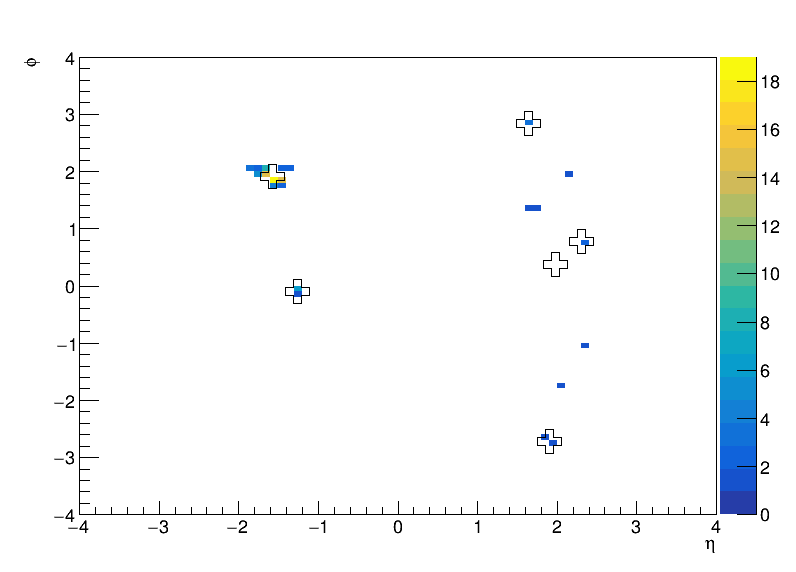

In [163]:
evt_idx = 0

c_cluster = rt.TCanvas('c_cluster','c_cluster', 800, 600)
h['eta_phi_0'] = create_TH2D(np.vstack((csc_eta['m55ct10m_wh_bbbb'][evt_idx],csc_phi['m55ct10m_wh_bbbb'][evt_idx])).T, name='eta_phi_0', title='', binning=[80, -4, 4, 80, -4, 4], weights=None, axis_title = ['#eta','#phi', ''])

## Scrapped due to np.logical_and discovery
# Resulting implementation of eventNum
#h['eta_phi_0'] = create_TH2D(np.vstack((csc_eta_dis[event4][0],csc_phi_dis[event4][0])).T, name='eta_phi_0', title='', binning=[80, -4, 4, 80, -4, 4], weights=None, axis_title = ['#eta','#phi', ''])


c_cluster.SetLogy(0)
h['eta_phi_0'].SetStats(0)
c_cluster.cd()
#h['eta_phi_0'].SetStats(0)
h['eta_phi_0'].Draw("colz")


#test_dataset = np.vstack((csc_eta_prompt[evt_idx],csc_phi_prompt[evt_idx])).T

test_dataset = np.vstack((csc_eta['m55ct10m_wh_bbbb'][evt_idx],csc_phi['m55ct10m_wh_bbbb'][evt_idx])).T
#print(test_dataset)
#print test_dataset.ndim
#print len(csc_eta_prompt[evt_idx])
centroids_t,centroid_constituents_t = kmeans(test_dataset,25)
# print(centroids_t)

ll = 0
xx = []
yy = []
nn = 0
for nc in centroid_constituents_t:
    if nc > 0:
        nn += 1
        xx.append(centroids_t[ll,0])
        yy.append(centroids_t[ll,1])
    ll += 1


tg = rt.TGraph(nn)
for ii in range(nn):
    tg.SetPoint(ii,xx[ii],yy[ii])
#     print(xx[ii],yy[ii])


tg.SetMarkerSize(3)
tg.SetMarkerStyle(28)
tg.Draw("P0+same")


c_cluster.Draw()

## Comparative ROC Curves for all Strategies

### ROC Curve Calculations using N<sub>CSC</sub>

In [133]:
# ROC Curve for ggH/QCD/ZeroBias Samples: nCsc 

eff_ncsc = {}
rejection_power = {}
ncsc_var_x = np.array([])

for data_type in data_trees.keys():
    eff_ncsc[data_type] = {}
    
    eff_ncsc[data_type]['cluster'] = {}
    eff_ncsc[data_type]['cluster']['csc_inclusive'] = np.array([])
    eff_ncsc[data_type]['cluster']['csc_noME11'] = np.array([])
    eff_ncsc[data_type]['cluster']['csc_noME112'] = np.array([])
    eff_ncsc[data_type]['cluster']['csc_noME1123'] = np.array([])
    
    eff_ncsc[data_type]['noCluster'] = {}
    eff_ncsc[data_type]['noCluster']['csc_inclusive'] = np.array([])
    eff_ncsc[data_type]['noCluster']['csc_noME11'] = np.array([])
    eff_ncsc[data_type]['noCluster']['csc_noME112'] = np.array([])
    eff_ncsc[data_type]['noCluster']['csc_noME1123'] = np.array([])
    
    eff_ncsc[data_type]['matching'] = {}
    eff_ncsc[data_type]['matching']['csc_inclusive'] = np.array([])
    
    for hit_thresh in range(0, 200):
        ncsc_var_x = np.append(ncsc_var_x, hit_thresh)
#         # Clustering ROCs
#         eff_ncsc[data_type]['cluster']['csc_inclusive'] = np.append(eff_ncsc[data_type]['cluster']['csc_inclusive'], np.count_nonzero(np.array(ncsc_cluster[data_type]['csc_inclusive'])>hit_thresh)/len(ncsc_cluster[data_type]['csc_inclusive']))
#         eff_ncsc[data_type]['cluster']['csc_noME11'] = np.append(eff_ncsc[data_type]['cluster']['csc_noME11'], np.count_nonzero(np.array(ncsc_cluster[data_type]['csc_noME11'])>hit_thresh)/len(ncsc_cluster[data_type]['csc_noME11']))
#         eff_ncsc[data_type]['cluster']['csc_noME112'] = np.append(eff_ncsc[data_type]['cluster']['csc_noME112'], np.count_nonzero(np.array(ncsc_cluster[data_type]['csc_noME112'])>hit_thresh)/len(ncsc_cluster[data_type]['csc_noME112']))
#         eff_ncsc[data_type]['cluster']['csc_noME1123'] = np.append(eff_ncsc[data_type]['cluster']['csc_noME1123'], np.count_nonzero(np.array(ncsc_cluster[data_type]['csc_noME1123'])>hit_thresh)/len(ncsc_cluster[data_type]['csc_noME1123']))

       # No-Clustering ROCs
        eff_ncsc[data_type]['noCluster']['csc_inclusive'] = np.append(eff_ncsc[data_type]['noCluster']['csc_inclusive'], np.count_nonzero(np.array(nCsc[data_type])>hit_thresh)/len(nCsc[data_type]))
        eff_ncsc[data_type]['noCluster']['csc_noME11'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME11'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_11'])>hit_thresh)/len(nCsc_removal[data_type]['ME_11']))
        eff_ncsc[data_type]['noCluster']['csc_noME112'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME112'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_112'])>hit_thresh)/len(nCsc_removal[data_type]['ME_112']))
#         eff_ncsc[data_type]['noCluster']['csc_noME1123'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME1123'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_1123'])>hit_thresh)/len(nCsc_removal[data_type]['ME_1123']))
    
        # Matching ROCs
#         eff_ncsc[data_type]['matching']['csc_inclusive'] = np.append(eff_ncsc[data_type]['matching']['csc_inclusive'], np.count_nonzero(np.array(nCsc_jetMatch[data_type])>hit_thresh)/len(nCsc_jetMatch[data_type]))
        
        print(str(hit_thresh) + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
        
    # Rejection power calculation
    rejection_power[data_type] = {}
    rejection_power[data_type]['cluster'] = {}
    rejection_power[data_type]['noCluster'] = {}
    rejection_power[data_type]['matching'] = {}
    
#     # Clustering
#     rejection_power[data_type]['cluster']['csc_inclusive'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['cluster']['csc_inclusive']))
#     rejection_power[data_type]['cluster']['csc_noME11'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['cluster']['csc_noME11']))
#     rejection_power[data_type]['cluster']['csc_noME112'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['cluster']['csc_noME112']))
#     rejection_power[data_type]['cluster']['csc_noME1123'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['cluster']['csc_noME1123']))
    # No clustering
    rejection_power[data_type]['noCluster']['csc_inclusive'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_inclusive']))
    rejection_power[data_type]['noCluster']['csc_noME11'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME11']))
    rejection_power[data_type]['noCluster']['csc_noME112'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME112']))
#     rejection_power[data_type]['noCluster']['csc_noME1123'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME1123']))
    # Matching
#     rejection_power[data_type]['matching']['csc_inclusive'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['matching']['csc_inclusive']))
    
    print(data_type + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

0: 2019-08-19 21:11:00.432456-07:00
1: 2019-08-19 21:11:00.432741-07:00
2: 2019-08-19 21:11:00.433029-07:00
3: 2019-08-19 21:11:00.433204-07:00
4: 2019-08-19 21:11:00.433453-07:00
5: 2019-08-19 21:11:00.433702-07:00
6: 2019-08-19 21:11:00.434402-07:00
7: 2019-08-19 21:11:00.434684-07:00
8: 2019-08-19 21:11:00.434922-07:00
9: 2019-08-19 21:11:00.435141-07:00
10: 2019-08-19 21:11:00.435358-07:00
11: 2019-08-19 21:11:00.435586-07:00
12: 2019-08-19 21:11:00.435804-07:00
13: 2019-08-19 21:11:00.436024-07:00
14: 2019-08-19 21:11:00.436239-07:00
15: 2019-08-19 21:11:00.436454-07:00
16: 2019-08-19 21:11:00.436677-07:00
17: 2019-08-19 21:11:00.436893-07:00
18: 2019-08-19 21:11:00.437107-07:00
19: 2019-08-19 21:11:00.437332-07:00
20: 2019-08-19 21:11:00.437547-07:00
21: 2019-08-19 21:11:00.437778-07:00
22: 2019-08-19 21:11:00.438006-07:00
23: 2019-08-19 21:11:00.438220-07:00
24: 2019-08-19 21:11:00.438431-07:00
25: 2019-08-19 21:11:00.438654-07:00
26: 2019-08-19 21:11:00.438870-07:00
27: 2019-08

106: 2019-08-19 21:11:00.635262-07:00
107: 2019-08-19 21:11:00.636403-07:00
108: 2019-08-19 21:11:00.637475-07:00
109: 2019-08-19 21:11:00.638544-07:00
110: 2019-08-19 21:11:00.639620-07:00
111: 2019-08-19 21:11:00.640691-07:00
112: 2019-08-19 21:11:00.641758-07:00
113: 2019-08-19 21:11:00.642831-07:00
114: 2019-08-19 21:11:00.643898-07:00
115: 2019-08-19 21:11:00.644965-07:00
116: 2019-08-19 21:11:00.646035-07:00
117: 2019-08-19 21:11:00.647104-07:00
118: 2019-08-19 21:11:00.648172-07:00
119: 2019-08-19 21:11:00.649242-07:00
120: 2019-08-19 21:11:00.650310-07:00
121: 2019-08-19 21:11:00.651378-07:00
122: 2019-08-19 21:11:00.652441-07:00
123: 2019-08-19 21:11:00.653508-07:00
124: 2019-08-19 21:11:00.654588-07:00
125: 2019-08-19 21:11:00.655661-07:00
126: 2019-08-19 21:11:00.656729-07:00
127: 2019-08-19 21:11:00.657799-07:00
128: 2019-08-19 21:11:00.658869-07:00
129: 2019-08-19 21:11:00.659939-07:00
130: 2019-08-19 21:11:00.661012-07:00
131: 2019-08-19 21:11:00.662087-07:00
132: 2019-08

1: 2019-08-19 21:11:00.845727-07:00
2: 2019-08-19 21:11:00.863316-07:00
3: 2019-08-19 21:11:00.880899-07:00
4: 2019-08-19 21:11:00.898455-07:00
5: 2019-08-19 21:11:00.916036-07:00
6: 2019-08-19 21:11:00.933610-07:00
7: 2019-08-19 21:11:00.951202-07:00
8: 2019-08-19 21:11:00.970452-07:00
9: 2019-08-19 21:11:00.993885-07:00
10: 2019-08-19 21:11:01.013257-07:00
11: 2019-08-19 21:11:01.030921-07:00
12: 2019-08-19 21:11:01.048739-07:00
13: 2019-08-19 21:11:01.066538-07:00
14: 2019-08-19 21:11:01.084124-07:00
15: 2019-08-19 21:11:01.101709-07:00
16: 2019-08-19 21:11:01.119296-07:00
17: 2019-08-19 21:11:01.136880-07:00
18: 2019-08-19 21:11:01.154436-07:00
19: 2019-08-19 21:11:01.171985-07:00
20: 2019-08-19 21:11:01.189517-07:00
21: 2019-08-19 21:11:01.207113-07:00
22: 2019-08-19 21:11:01.224683-07:00
23: 2019-08-19 21:11:01.242243-07:00
24: 2019-08-19 21:11:01.259893-07:00
25: 2019-08-19 21:11:01.277648-07:00
26: 2019-08-19 21:11:01.295493-07:00
27: 2019-08-19 21:11:01.313080-07:00
28: 2019-0

### Combination of Efficiencies/Rejection Powers for WH Signal Sample

In [136]:
eff_ncsc['m55ct10m_wh_bbbb'] = {}
for llave in eff_ncsc['m55ct10m_wh_bbbb_minus'].keys():
    eff_ncsc['m55ct10m_wh_bbbb'][llave] = {}
    for cle in eff_ncsc['m55ct10m_wh_bbbb_minus'][llave].keys():
        eff_ncsc['m55ct10m_wh_bbbb'][llave][cle] = np.concatenate([eff_ncsc['m55ct10m_wh_bbbb_minus'][llave][cle], eff_ncsc['m55ct10m_wh_bbbb_plus'][llave][cle]])

In [137]:
# Potential ROC Curves to make
# Out of the box: CSC inclusive, no clustering, no matching
# Simple cut: ME 1/2 + 1/2 hits removed, no clustering, no matching
# FastJet cut: ME 1/2 + 1/2 hits removed, FastJet clustering, no matching
# kmeans cut: ME 1/2 + 1/2 hits removed, kmeans clustering, no matching
# Matching cut: No station hits removed, no clustering, matching
# Final cut: No station hits removed, FastJet clustering, matching

### ROC Curve Plot

length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Warning in <TLegend::Paint>: Legend to large to be automatically placed. A default position is used


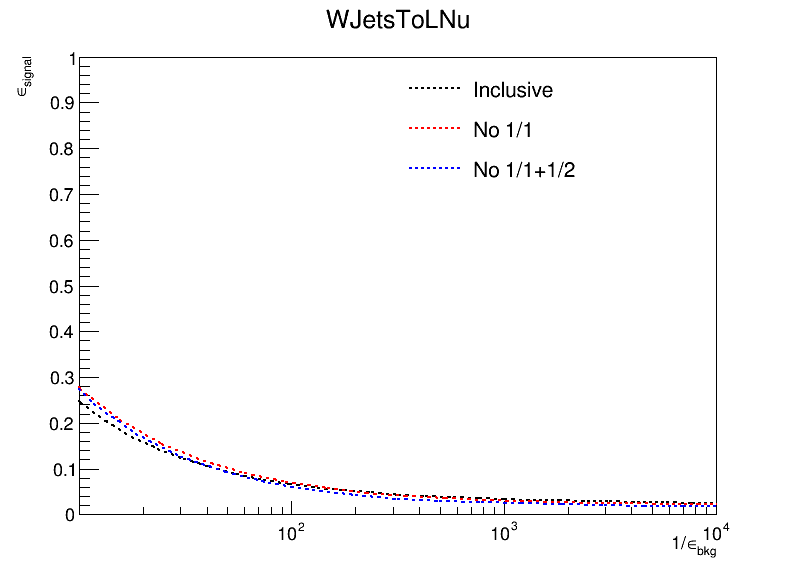

In [144]:
# Creates ROC curves for the signal efficiency of the m50ct1m signal sample against the ZeroBias samples
# using nCsc thresholds

c3 = rt.TCanvas('c3','c3', 800, 600)

h['roc_curve_noCluster'] = create_TGraph(rejection_power['zeroBias']['noCluster']['csc_inclusive'], eff_ncsc['ggH']['noCluster']['csc_inclusive'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_clean_noCluster'] = create_TGraph(rejection_power['zeroBias']['noCluster']['csc_noME11'], eff_ncsc['ggH']['noCluster']['csc_noME11'], axis_title=['#epsilon_{bkg}', '#epsilon_{signal}'])
# h['roc_curve_res_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME1123'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME1123'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_med_noCluster'] = create_TGraph(rejection_power['zeroBias']['noCluster']['csc_noME112'], eff_ncsc['ggH']['noCluster']['csc_noME112'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
# h['roc_curve_matching'] = create_TGraph(rejection_power['WJetsToLNu']['matching']['csc_inclusive'], eff_ncsc['m55ct10m_wh_bbbb']['matching']['csc_inclusive'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])


c3.SetLogx()

h['roc_curve_noCluster'].SetTitle('WJetsToLNu')


h['roc_curve_noCluster'].SetLineWidth(2)
h['roc_curve_clean_noCluster'].SetLineWidth(2)
# h['roc_curve_res_noCluster'].SetLineWidth(2)
h['roc_curve_med_noCluster'].SetLineWidth(2)
# h['roc_curve_matching'].SetLineWidth(2)

h['roc_curve_noCluster'].SetLineColor(1)
h['roc_curve_noCluster'].SetLineStyle(2)

# h['roc_curve_matching'].SetLineColor(6)
# h['roc_curve_matching'].SetLineStyle(1)

h['roc_curve_clean_noCluster'].SetLineColor(2)
h['roc_curve_clean_noCluster'].SetLineStyle(2)
                                          
# h['roc_curve_res_noCluster'].SetLineColor(3)
# h['roc_curve_res_noCluster'].SetLineStyle(2)

h['roc_curve_med_noCluster'].SetLineColor(4)
h['roc_curve_med_noCluster'].SetLineStyle(2)

h['roc_curve_noCluster'].GetXaxis().SetLimits(10, 10**4)
h['roc_curve_noCluster'].GetYaxis().SetRangeUser(0,1)

h['roc_curve_noCluster'].Draw()
h['roc_curve_clean_noCluster'].Draw('same')

# h['roc_curve_res_noCluster'].Draw('same')
h['roc_curve_med_noCluster'].Draw('same')
# h['roc_curve_matching'].Draw('same')

legend = rt.TLegend(0.70,0.70,0.7,0.7);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
legend.SetFillStyle(0);

legend.AddEntry( h['roc_curve_noCluster'], "Inclusive", 'l');
legend.AddEntry( h['roc_curve_clean_noCluster'], "No 1/1", 'l');
legend.AddEntry( h['roc_curve_med_noCluster'], "No 1/1+1/2", 'l');
# legend.AddEntry( h['roc_curve_res_noCluster'], "No 1/1+1/2+1/3", 'l');
# legend.AddEntry( h['roc_curve_matching'], "Matched Hits Removed", 'l');


legend.Draw();

c3.Draw()